In [1]:
"""
  Imports
"""
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, make_scorer, confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import patsy

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
"""
  Reading all the datasets, train_dataset, test_dataset
"""

train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")


In [3]:
corral=train_dataset.corr()

In [4]:
corral['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [5]:
"""
  Check all the datasets
"""
train_dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_dataset.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
target=train_dataset.Survived
train_dataset.drop('Survived',axis=1,inplace=True)
Result=test_dataset[['PassengerId']]

In [8]:
train_dataset.shape

(891, 11)

In [9]:
x=pd.concat([train_dataset,test_dataset],axis=0)

In [10]:
x.shape

(1309, 11)

In [11]:
def none_null(data):
    i=data.columns
    for n in i:
        if data[n].isnull().sum()!=0:
            print('the column is ', n)
            print('the null= ' ,data[n].isnull().sum())
            print(data[n].value_counts())          
none_null(x)

the column is  Age
the null=  263
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
25.00    34
28.00    32
36.00    31
26.00    30
29.00    30
27.00    30
19.00    29
23.00    26
32.00    24
20.00    23
35.00    23
31.00    23
45.00    21
33.00    21
17.00    20
39.00    20
16.00    19
42.00    18
40.00    18
34.00    16
50.00    15
47.00    14
48.00    14
38.00    14
2.00     12
         ..
28.50     3
12.00     3
0.83      3
34.50     2
71.00     2
45.50     2
70.00     2
14.50     2
30.50     2
0.92      2
36.50     2
23.50     1
67.00     1
60.50     1
38.50     1
0.17      1
55.50     1
0.33      1
20.50     1
24.50     1
66.00     1
0.42      1
70.50     1
11.50     1
26.50     1
76.00     1
22.50     1
74.00     1
80.00     1
0.67      1
Name: Age, Length: 98, dtype: int64
the column is  Fare
the null=  1
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
10.5000    35
7.7750     26
7.2292     24
7.9250     23
26.5500    22
8.6625     21
7.8542     

In [12]:

x['Cabin']=x['Cabin'].notnull().astype(int)

In [13]:
#there are three missing data in column Embarked so we are going to replace the mejority of the class as S
x["Embarked"].fillna("S", inplace = True) 

In [14]:
z=x.Pclass.unique()
w=x.groupby(['Pclass'])['Fare'].mean()

for i in z:
    x[x['Pclass']== i]
    x['Fare'].fillna(w[i], inplace = True)

In [15]:
#the data has many nulls in the age column which is a core for our prediction so we gonna fill it based on the mean of the class
z=x.Pclass.unique()
w=x.groupby(['Pclass'])['Age'].mean()

for i in z:
    x[x['Pclass']== i]
    x['Age'].fillna(w[i], inplace = True)

In [16]:
# Title
x['Title'] = x['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#rechness
x['reachness']= x.Fare/x.Age
x['family']=x['SibSp']+x['Parch']


In [17]:
# x.member.value_counts()

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null int32
Embarked       1309 non-null object
Title          1309 non-null object
reachness      1309 non-null float64
family         1309 non-null int64
dtypes: float64(3), int32(1), int64(5), object(5)
memory usage: 148.3+ KB


In [19]:
x.drop('PassengerId',axis=1 , inplace=True)
#drop string unnececerly columns
x.drop('Ticket',axis=1 , inplace=True)
x.drop('Name',axis=1 , inplace=True)


In [20]:
#if there is no print meaning x has no missing date
none_null(x)

In [21]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,reachness,family
0,3,male,22.0,1,0,7.2500,0,S,Mr,0.329545,1
1,1,female,38.0,1,0,71.2833,1,C,Mrs,1.875876,1
2,3,female,26.0,0,0,7.9250,0,S,Miss,0.304808,0
3,1,female,35.0,1,0,53.1000,1,S,Mrs,1.517143,1
4,3,male,35.0,0,0,8.0500,0,S,Mr,0.230000,0


In [22]:
# x.Title.value_counts()

In [23]:
X = pd.get_dummies(x, drop_first=True)

In [24]:
xtraing=X.iloc[:891,:]
xtest=X.iloc[891:,:]

In [25]:
xtraing.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,reachness,family,Sex_male,Embarked_Q,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,3,22.0,1,0,7.2500,0,0.329545,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,38.0,1,0,71.2833,1,1.875876,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,26.0,0,0,7.9250,0,0.304808,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,1,1.517143,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,35.0,0,0,8.0500,0,0.230000,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(xtraing )
# scaler.fit(xtest )

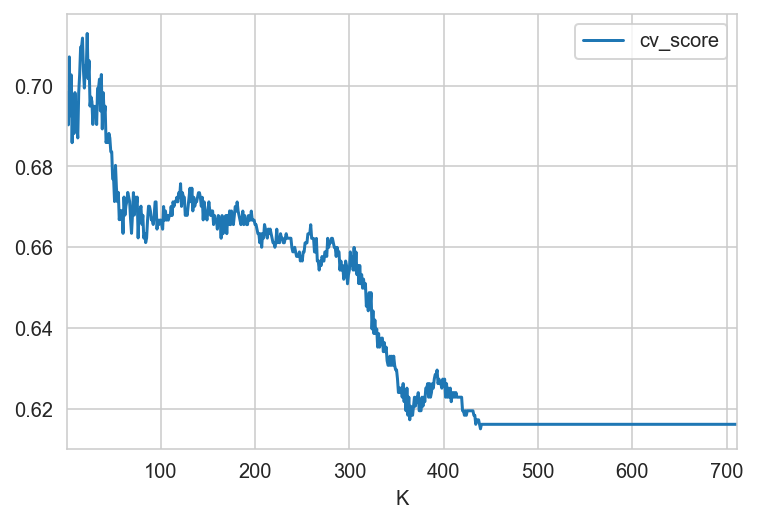

In [27]:
from sklearn.model_selection import cross_val_score
cv = 5
Ks_cv =[]
max_ = len(xtraing)//cv *(cv-1)
scores_cv = []
for k in range(1 , max_):
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    score_k = np.mean(cross_val_score(knn_cv , xtraing , target , cv = cv))
    Ks_cv.append(k)
    scores_cv.append(score_k)

#plotting k and test scores
df_score_cv = pd.DataFrame({'K' : Ks_cv , 'cv_score' :scores_cv })
df_score_cv.plot(x = 'K' , y = 'cv_score');

In [28]:
for i in range(len(scores_cv)):
    if scores_cv[i] == max(scores_cv):
        print('k:',Ks_cv[i])

k: 22


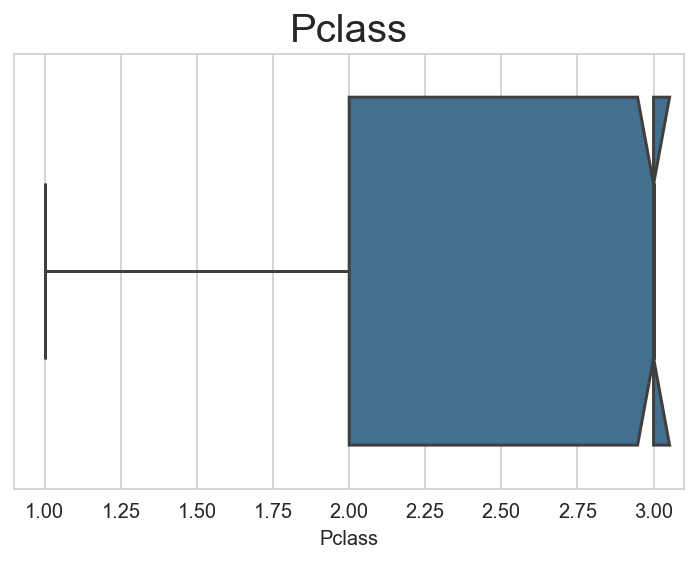

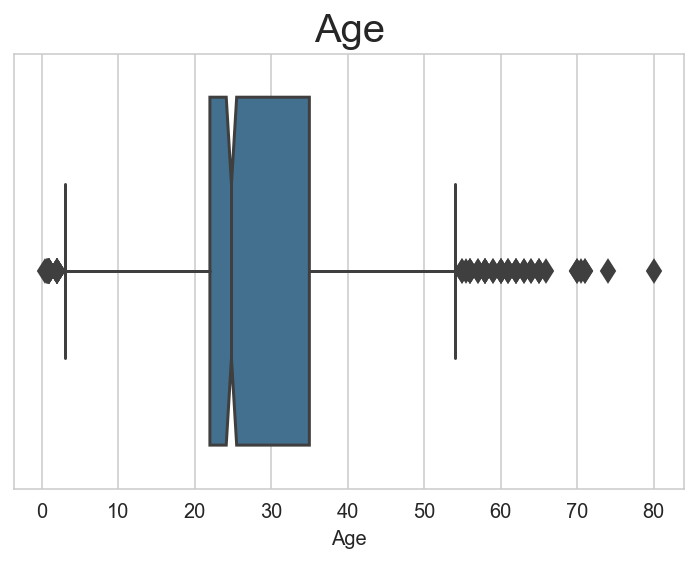

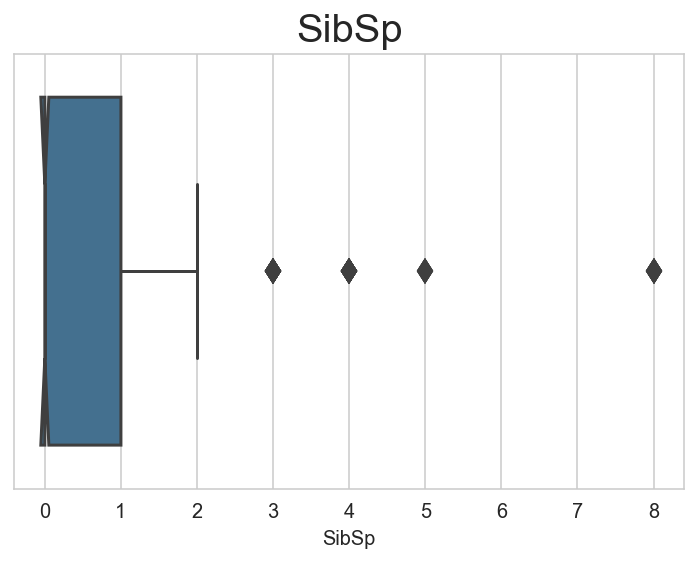

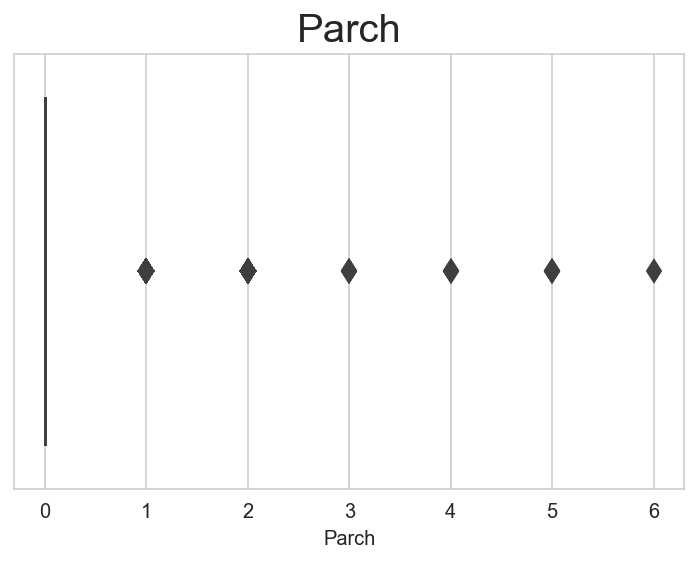

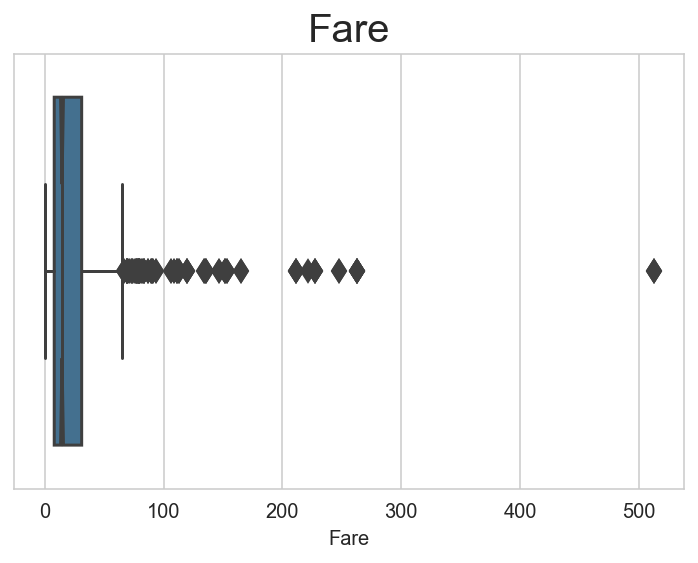

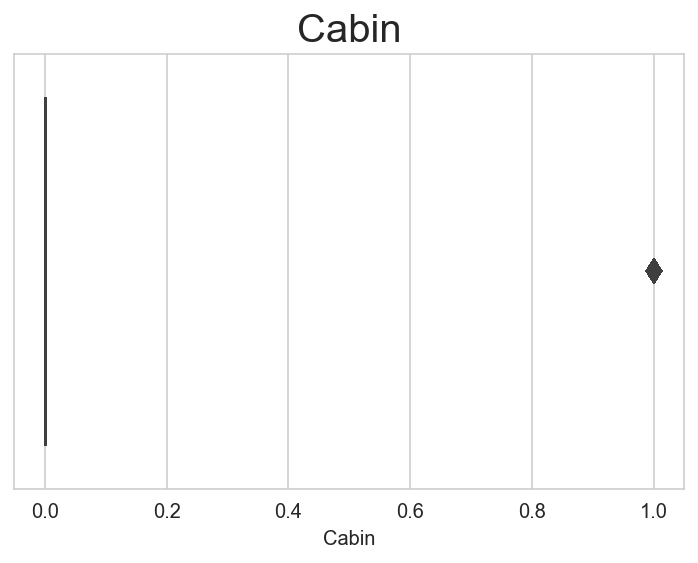

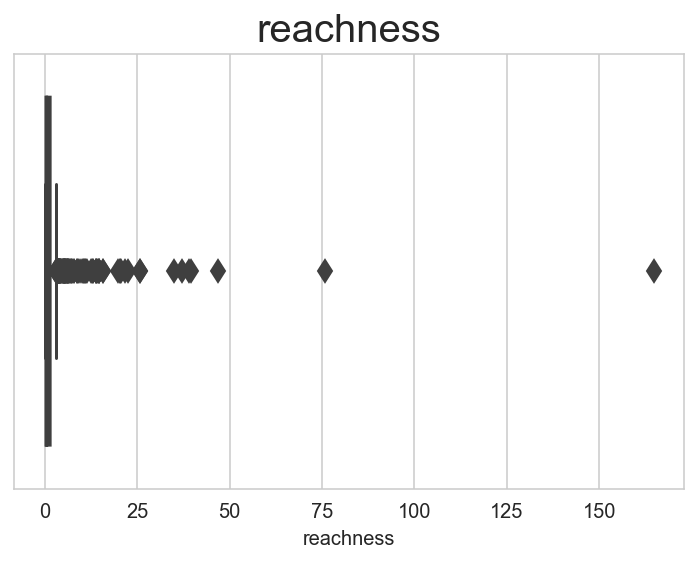

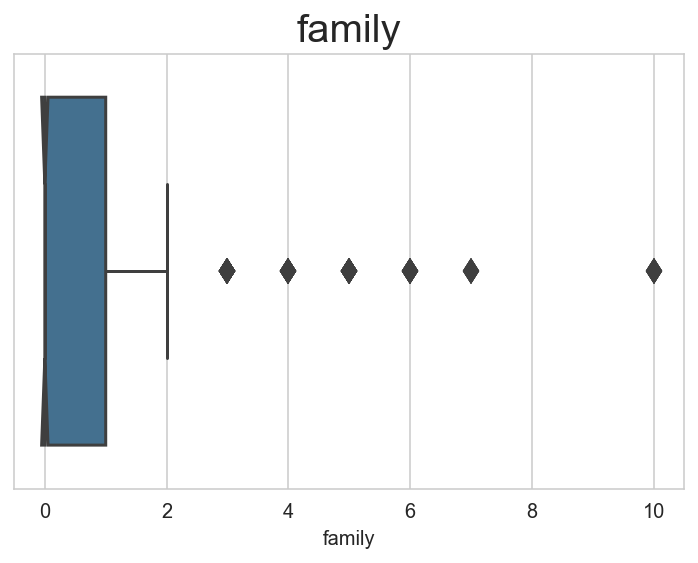

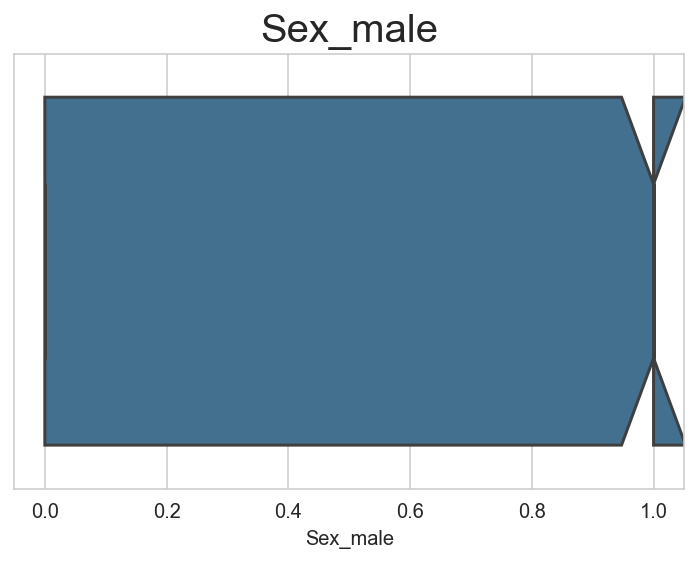

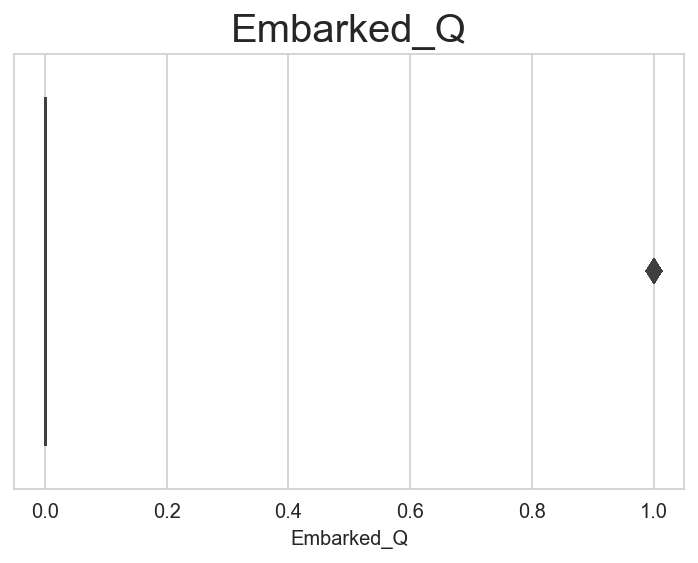

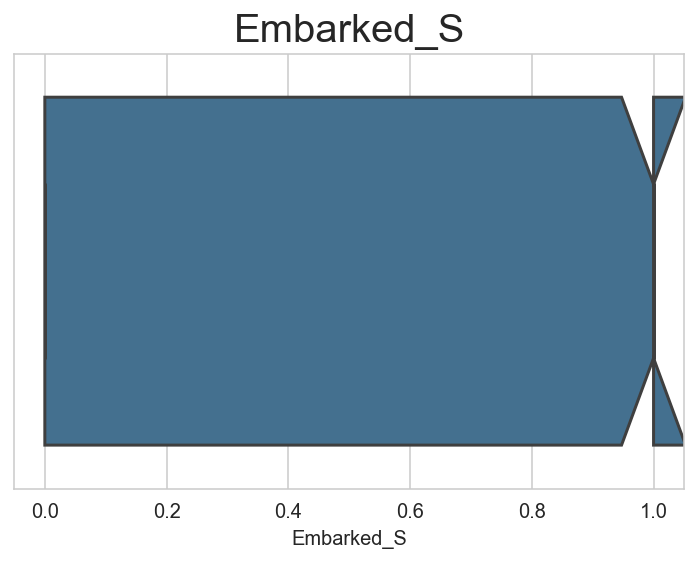

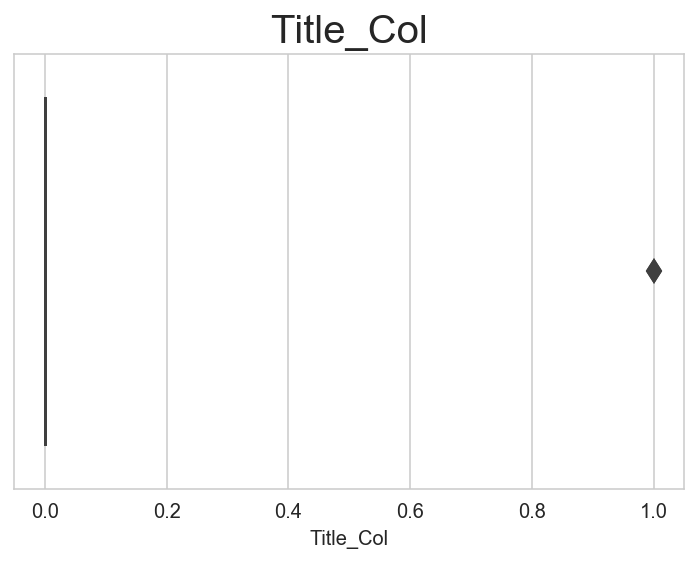

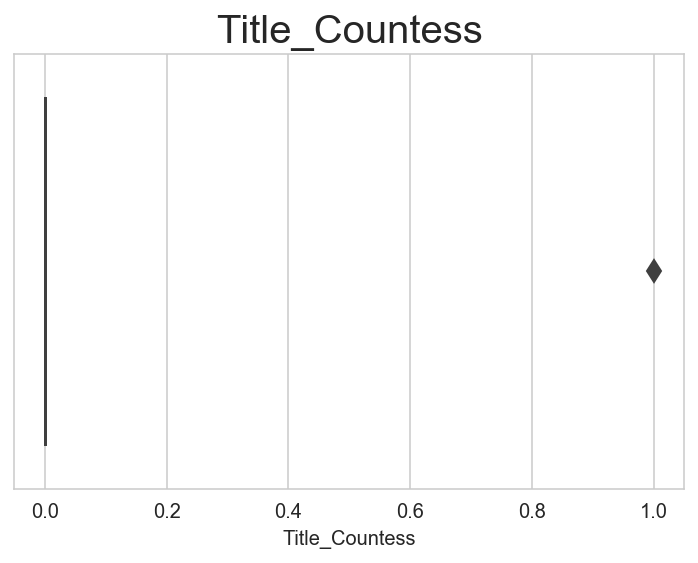

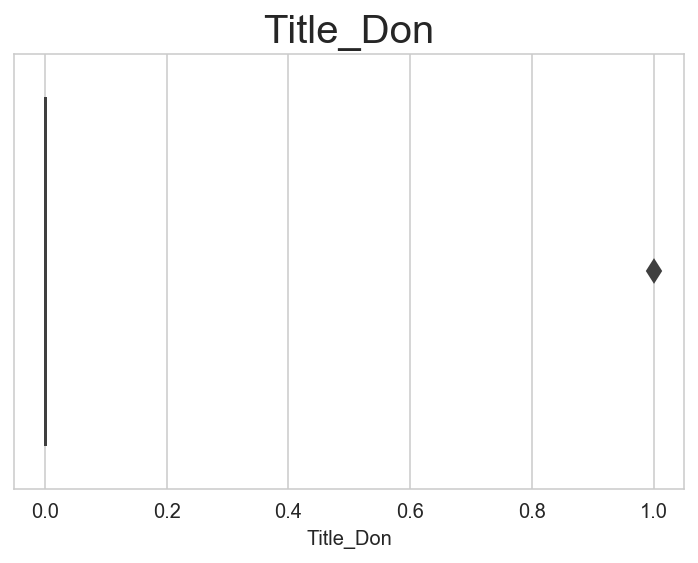

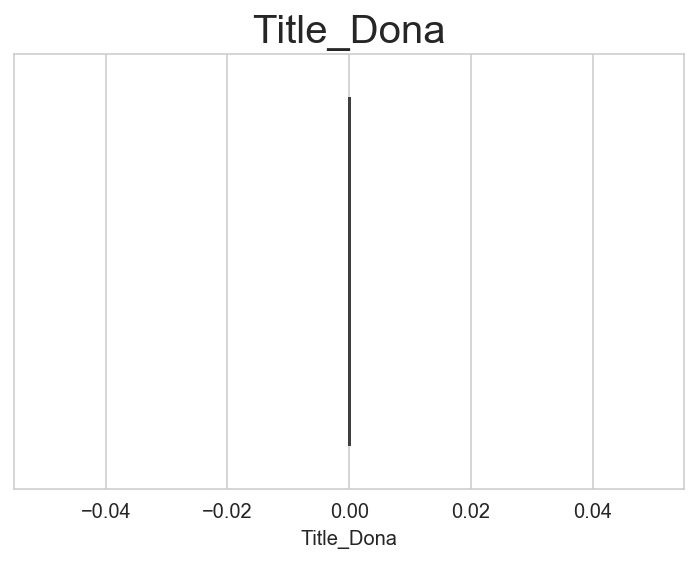

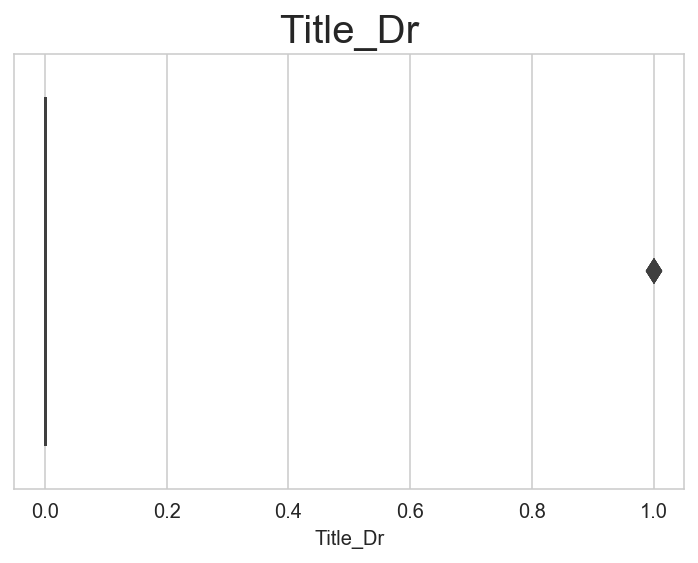

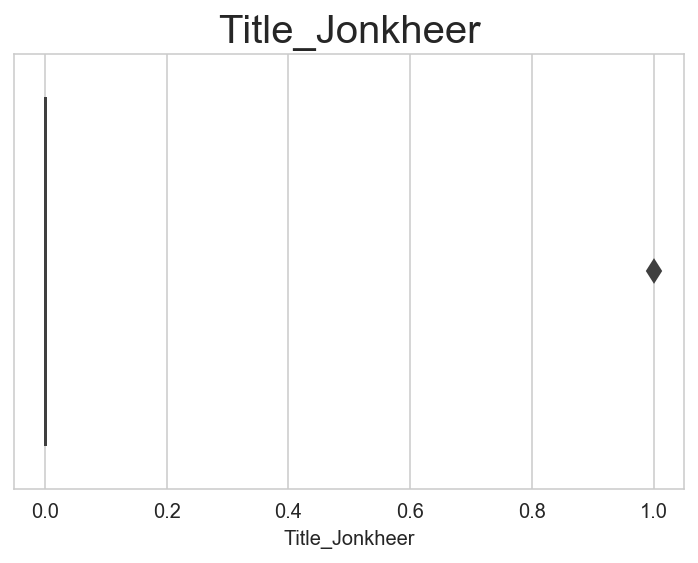

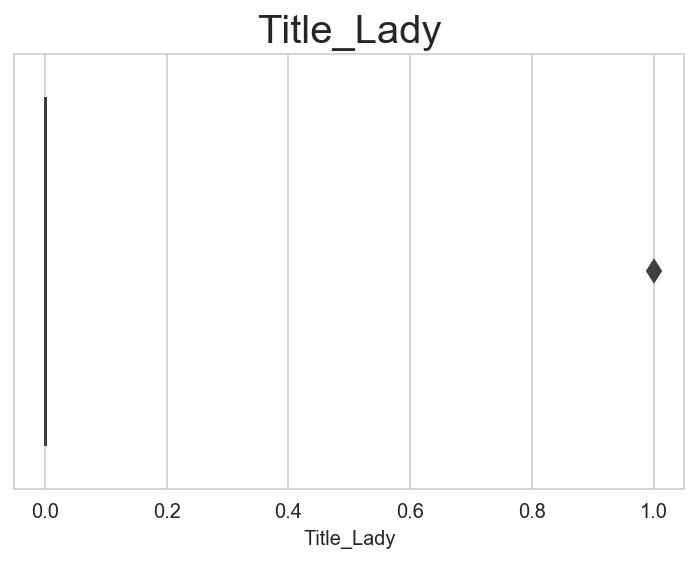

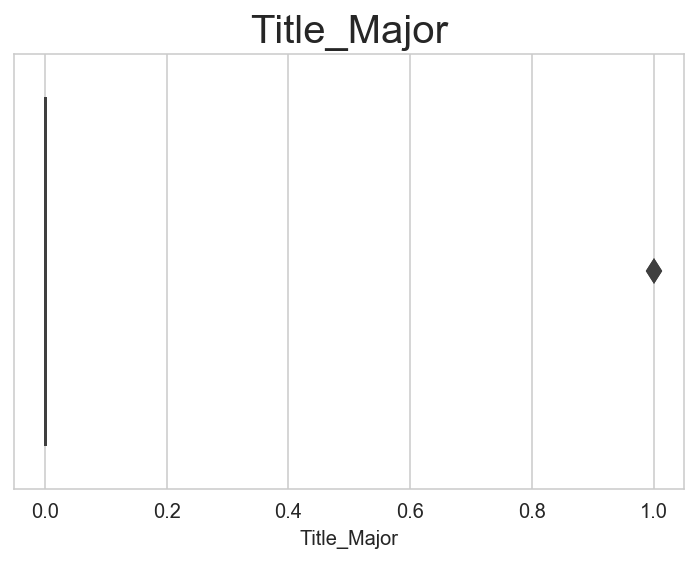

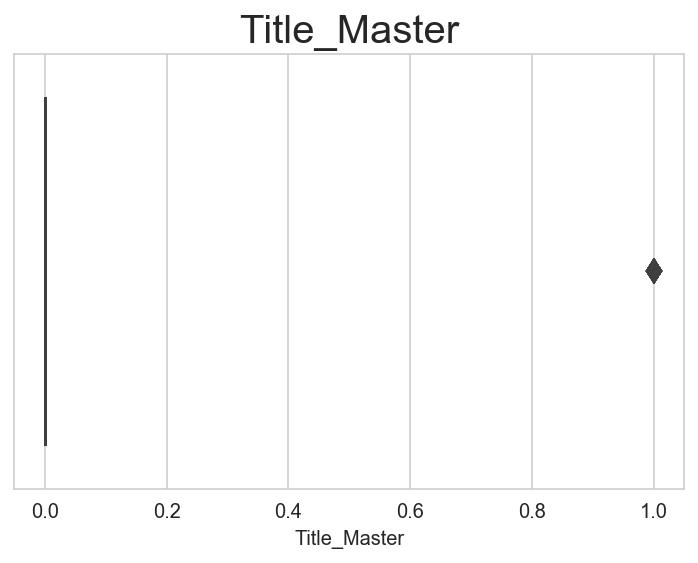

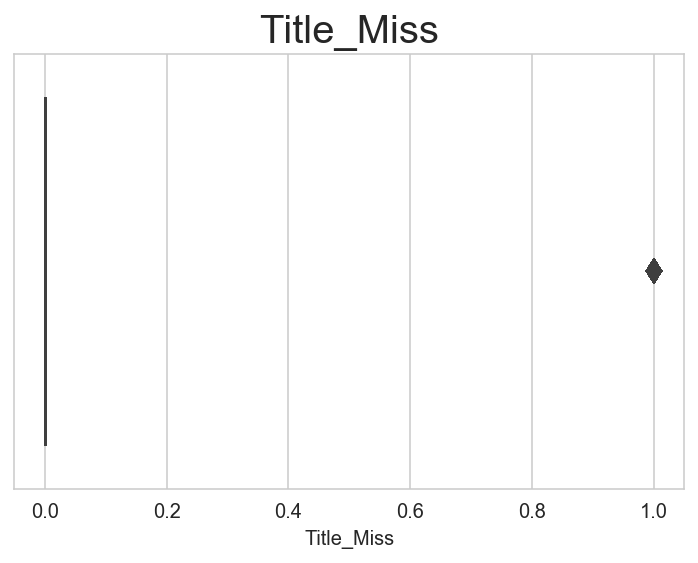

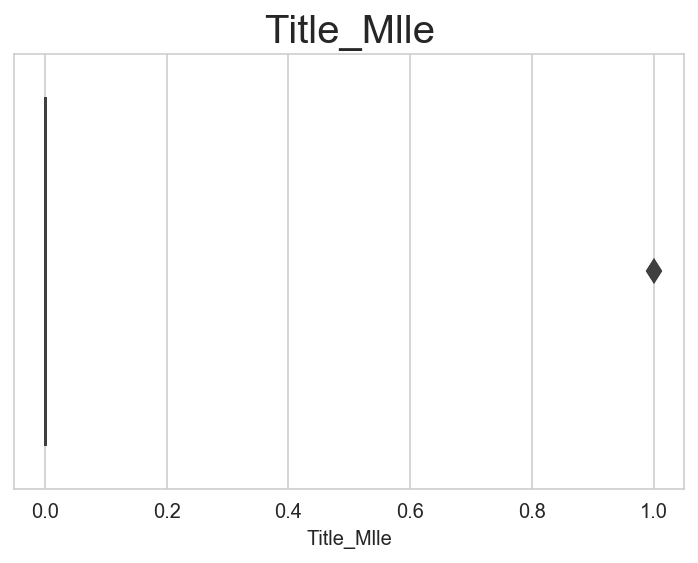

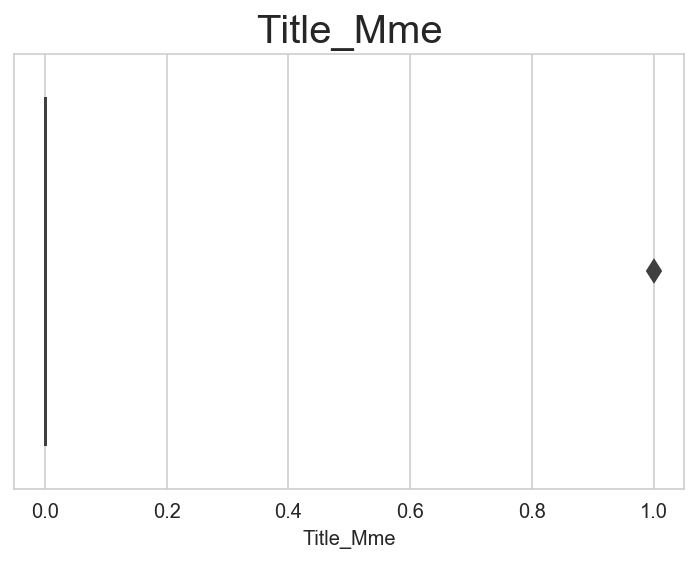

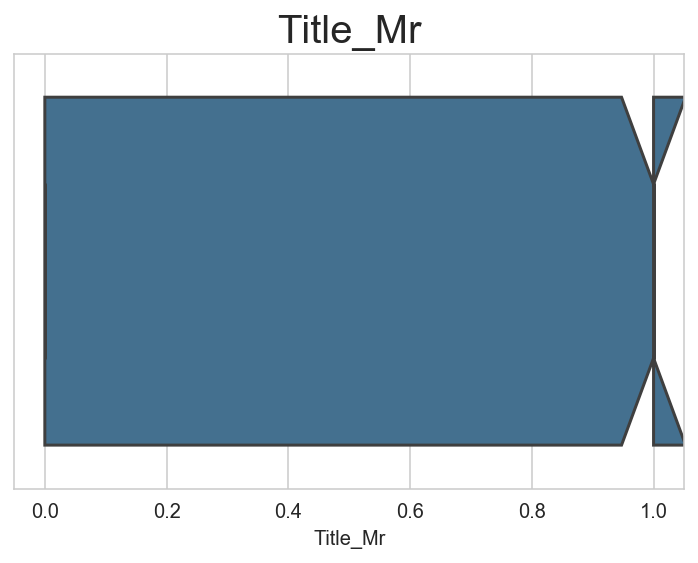

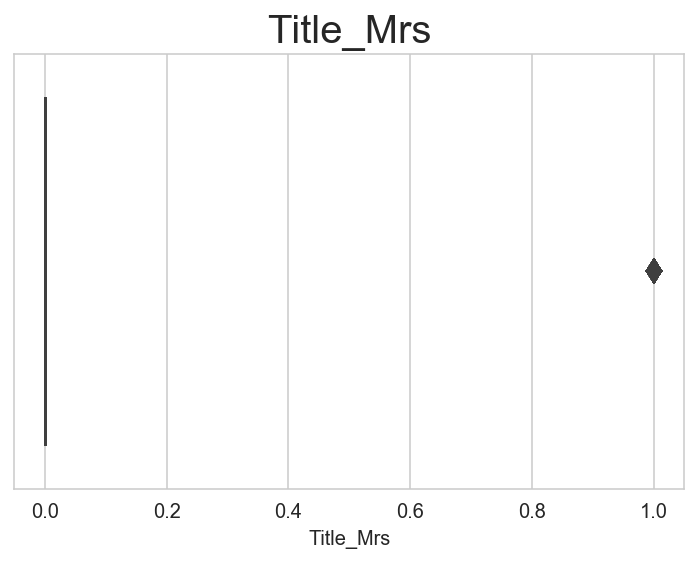

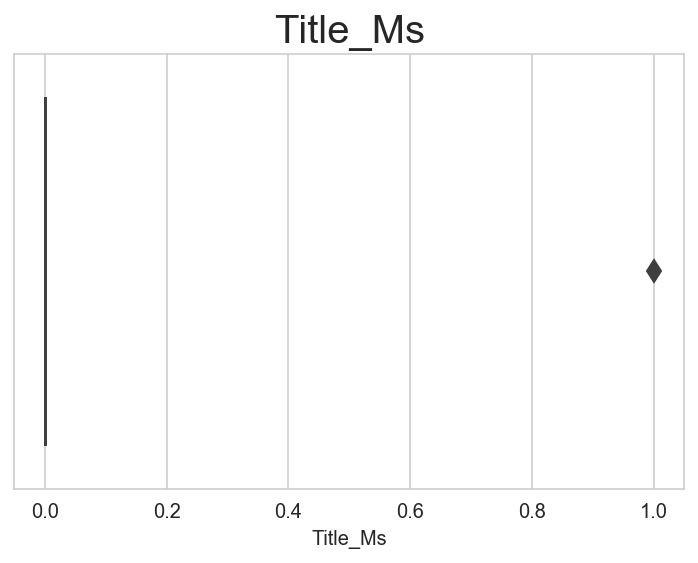

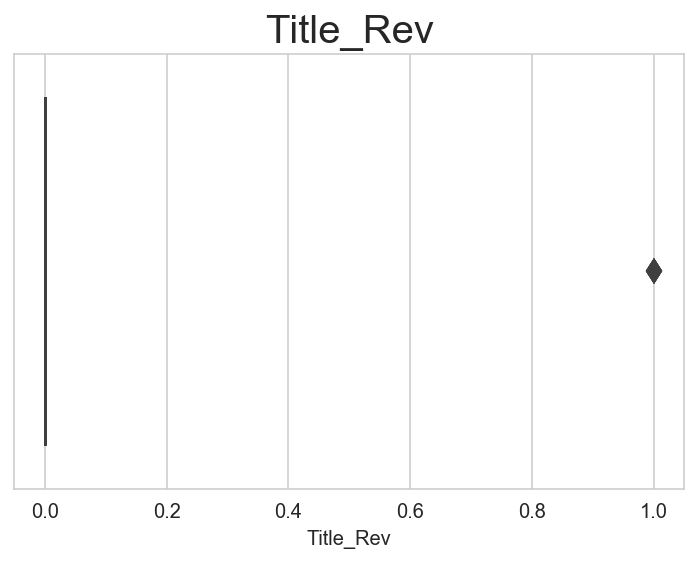

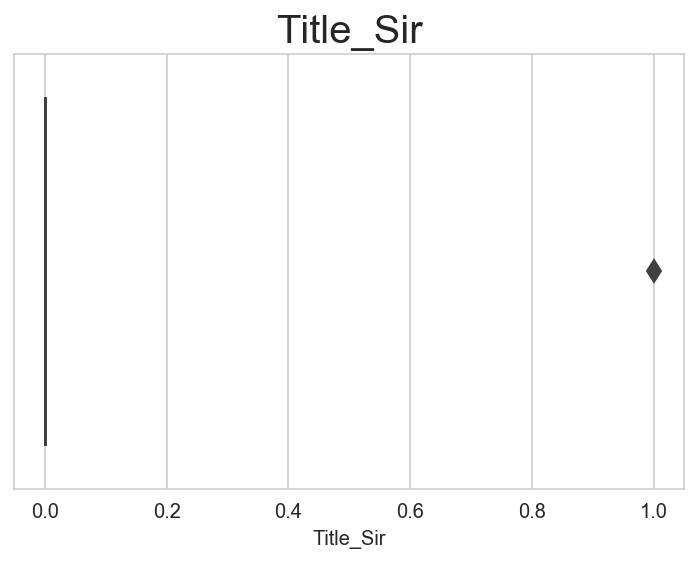

In [29]:
def box(data):
    for i in data.columns:
        try:
            fig = plt.figure(figsize=(6,4))
            ax = fig.gca()
            sns.boxplot(i, data=data, orient='h',fliersize=8, linewidth=1.5, notch=True,saturation=0.5, ax=ax)
            ax.set_title(i, fontsize=20)
            plt.show()
        except:
            pass

box(xtraing)

C:\Users\sony\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\sony\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\sony\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


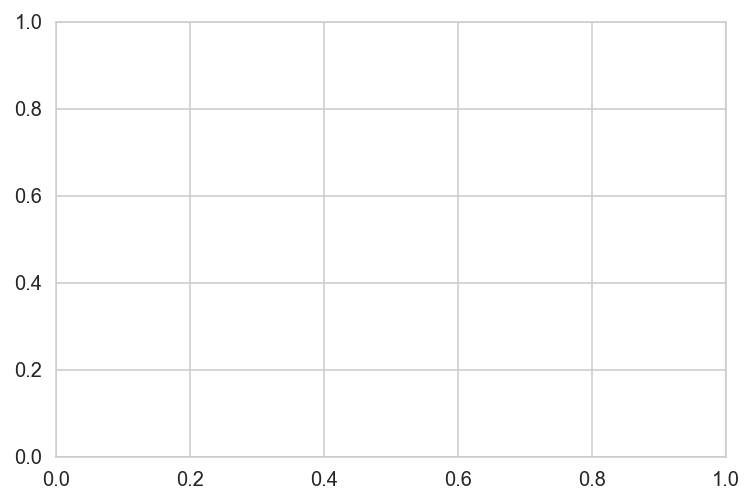

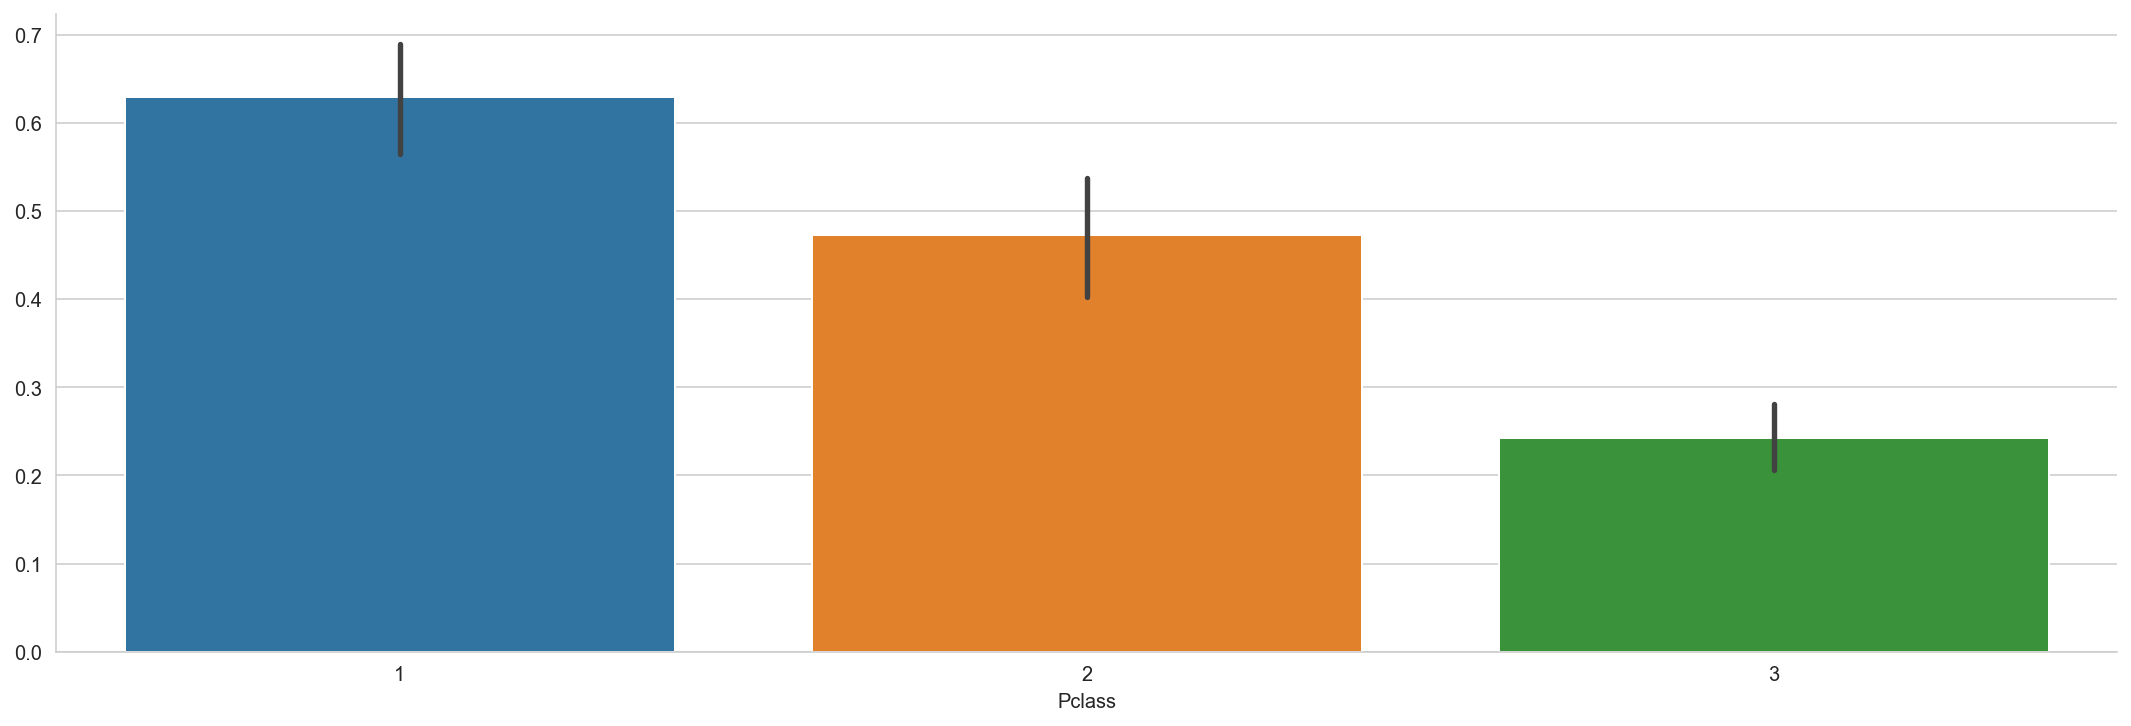

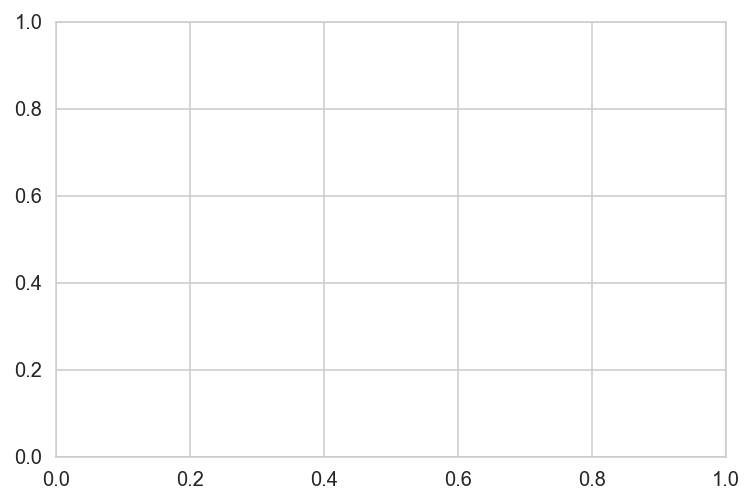

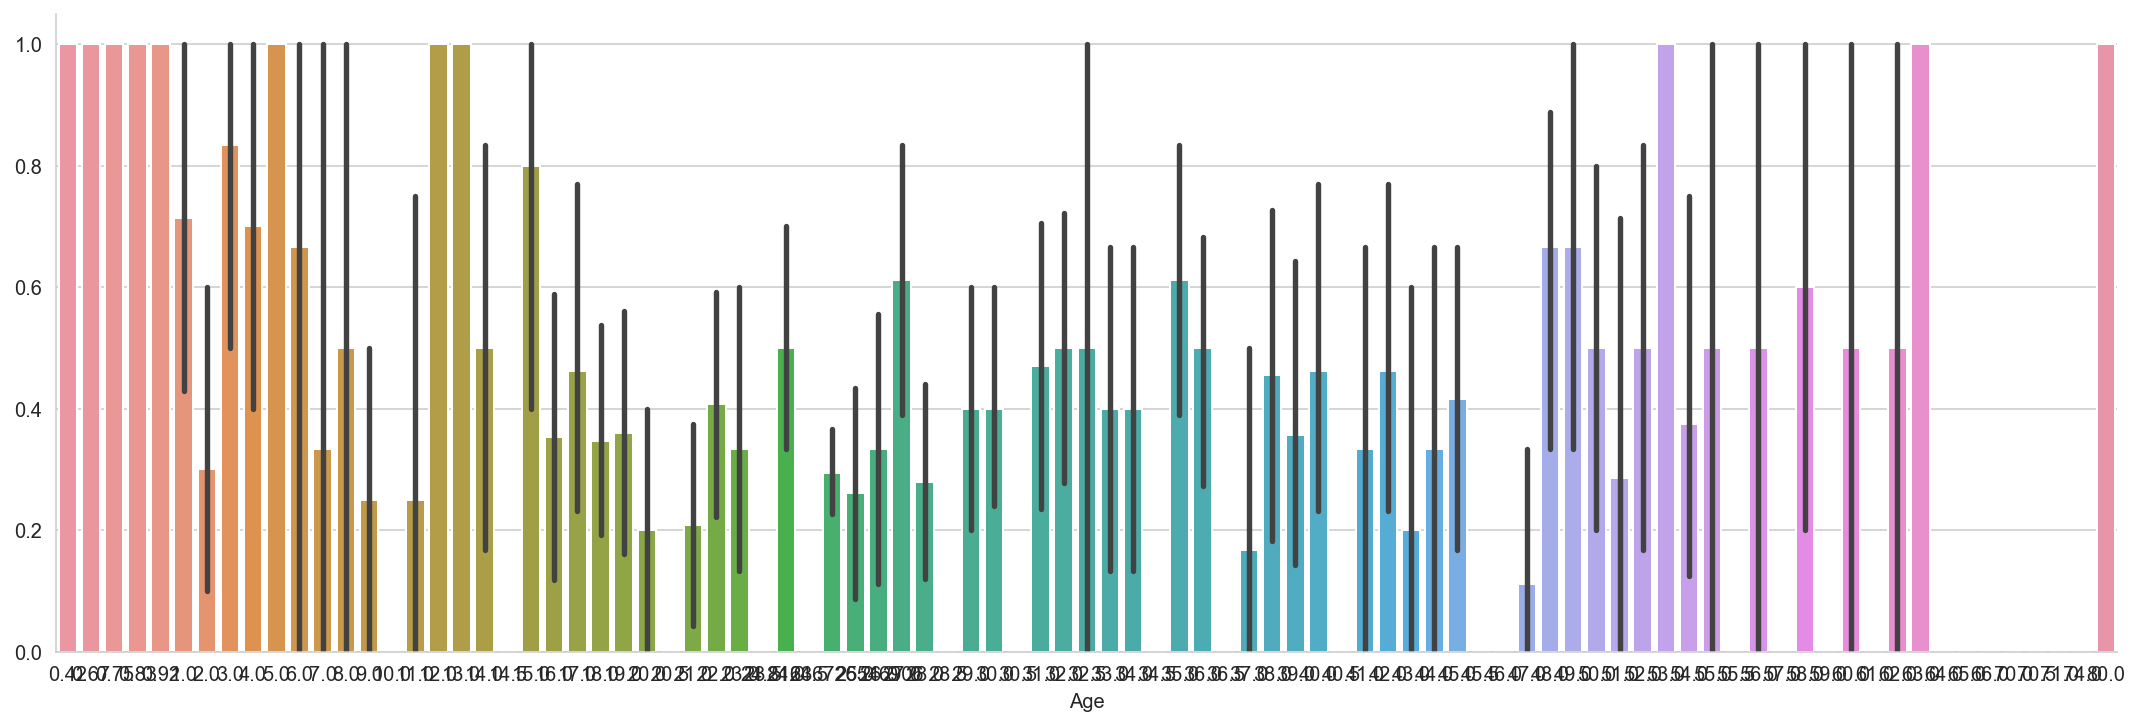

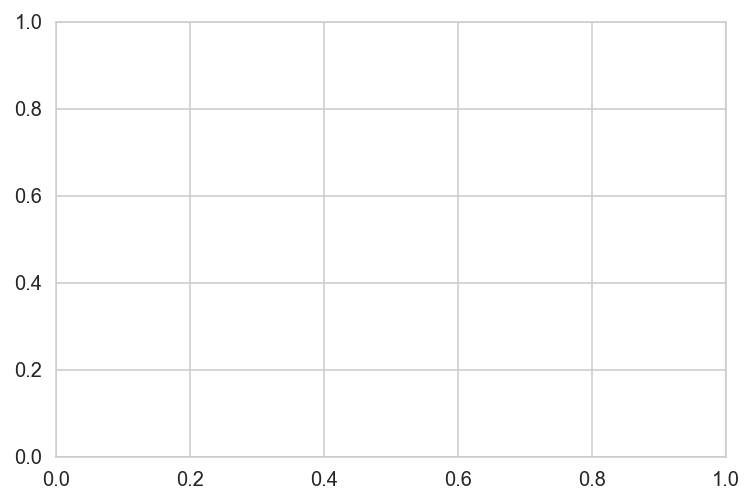

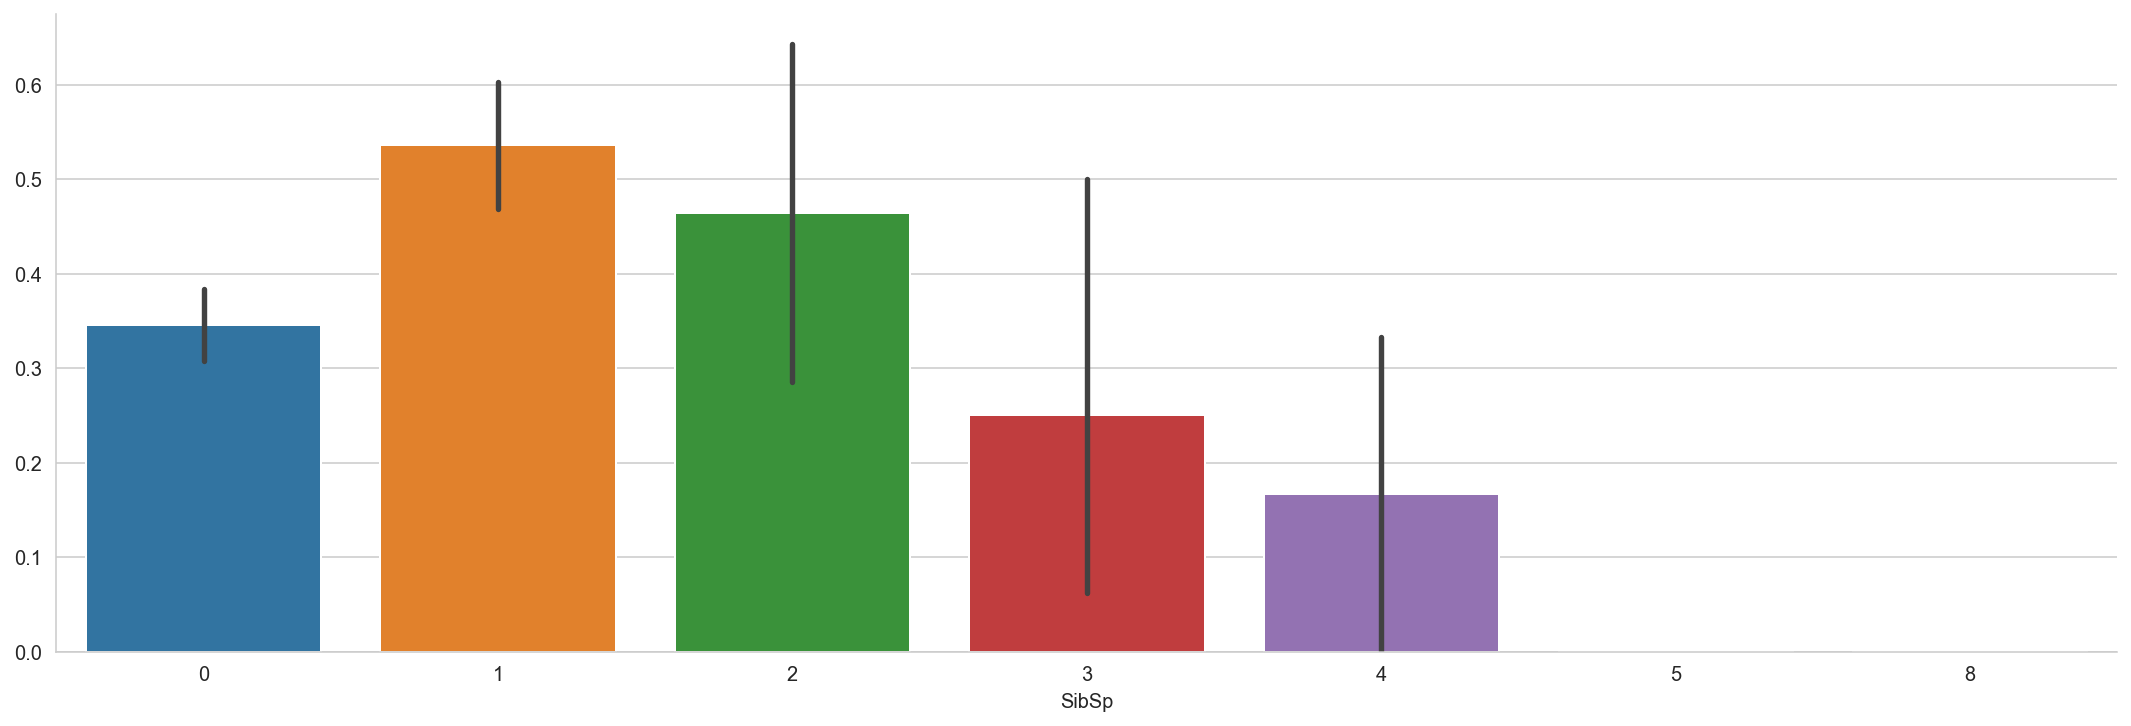

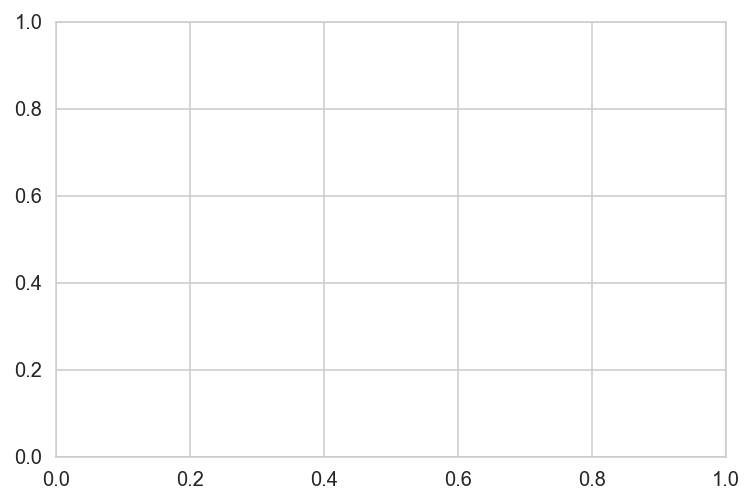

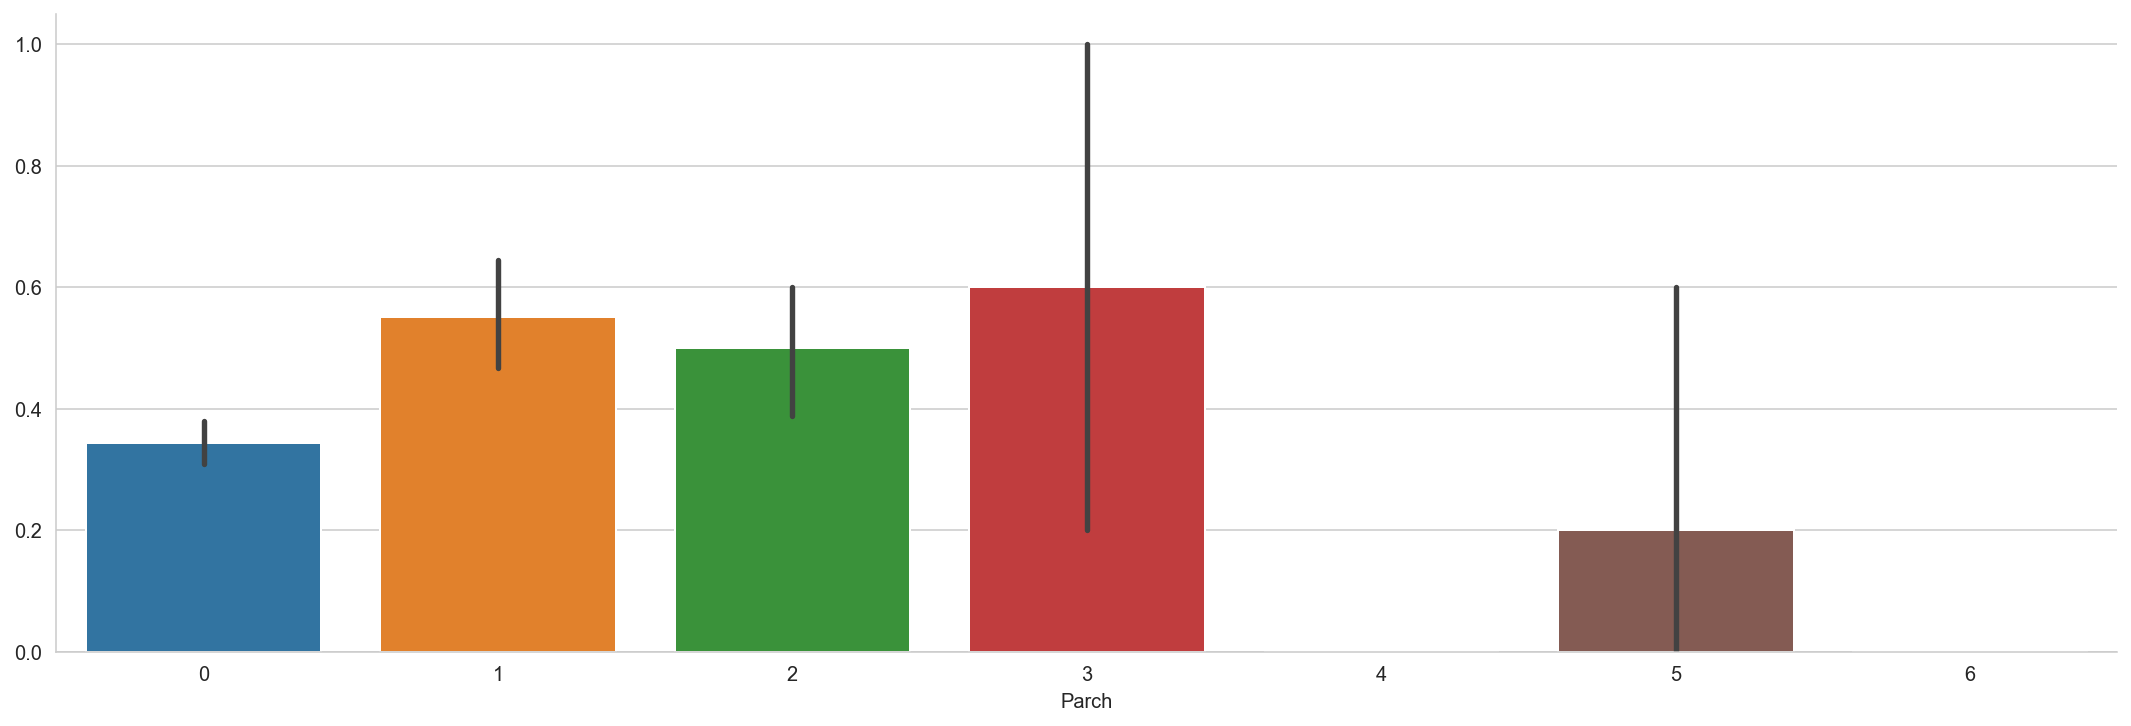

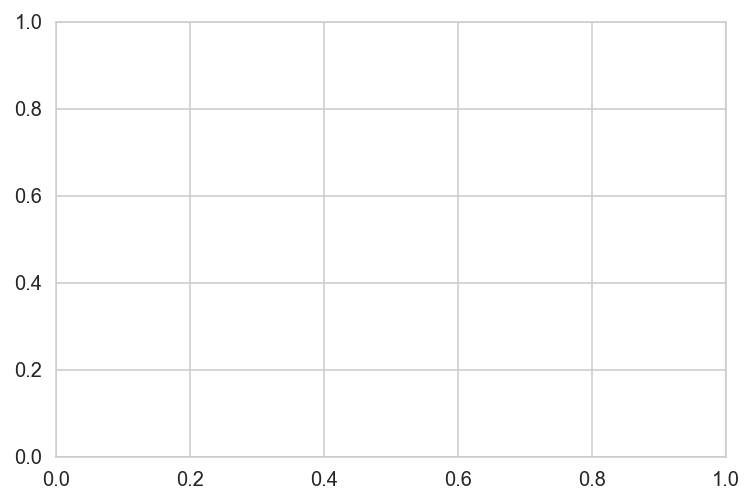

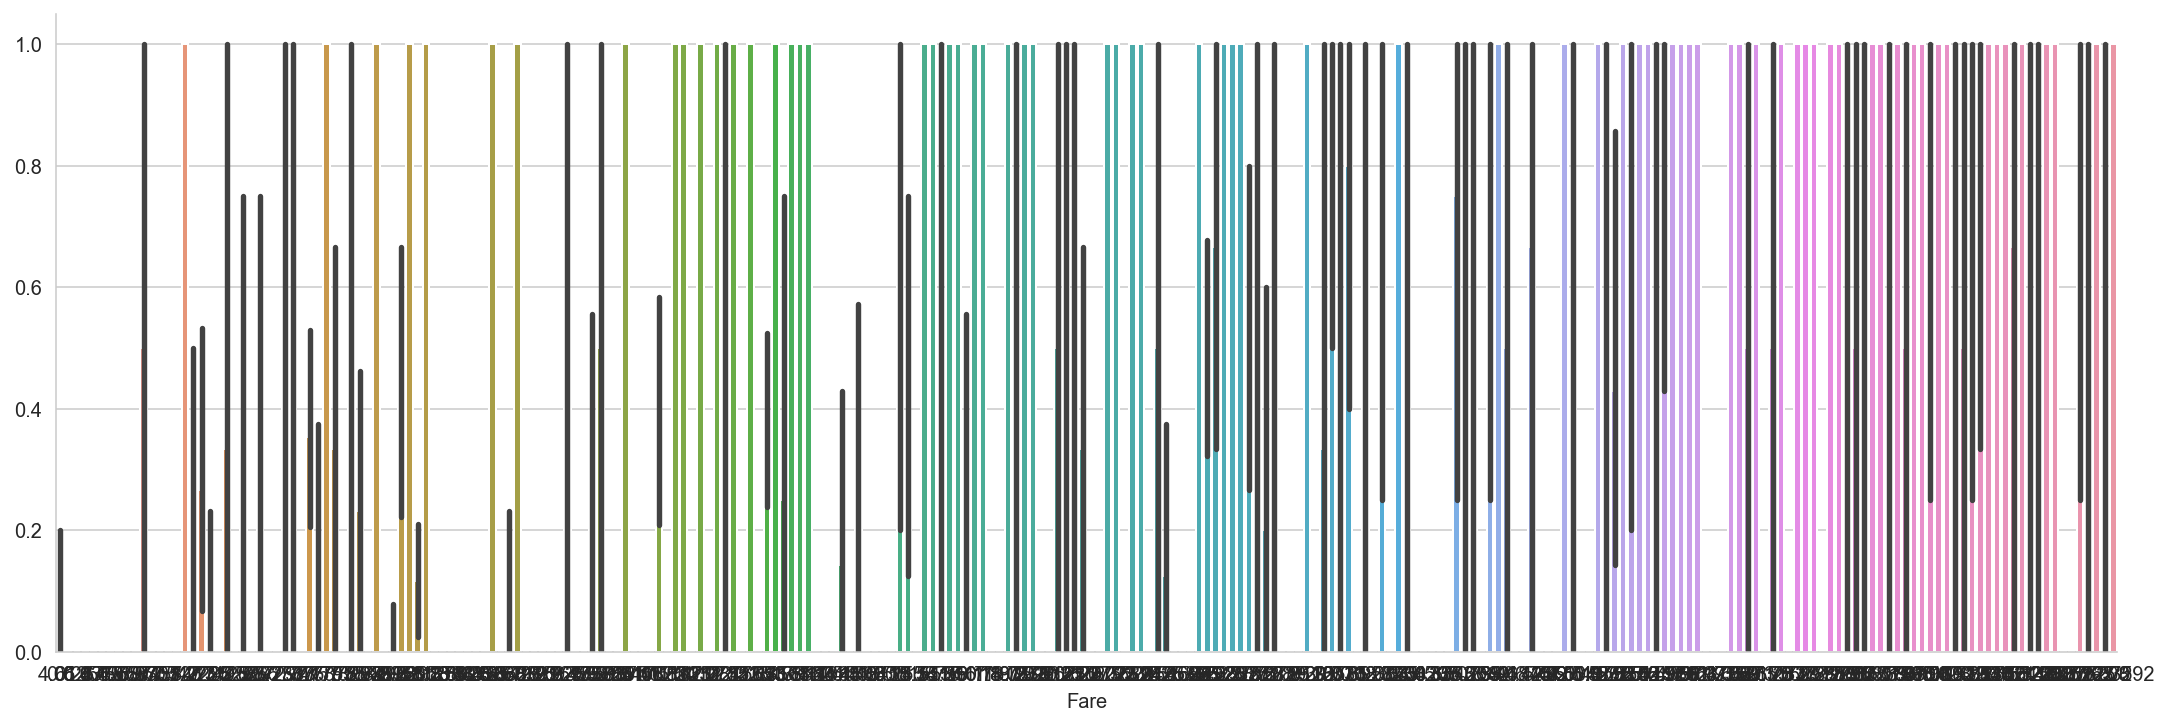

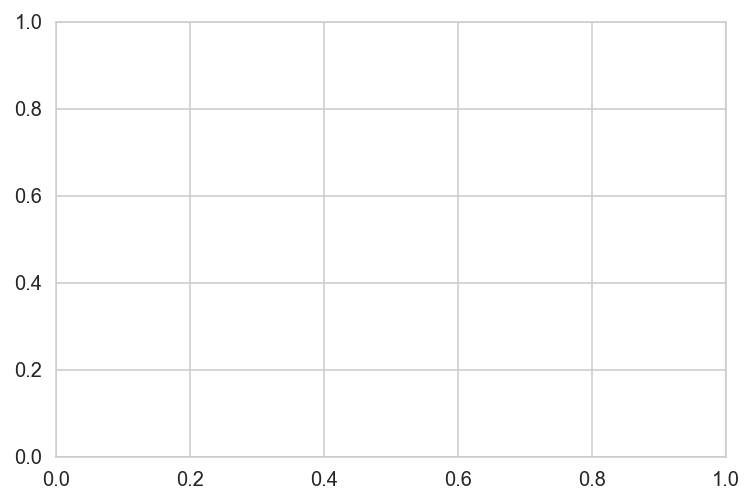

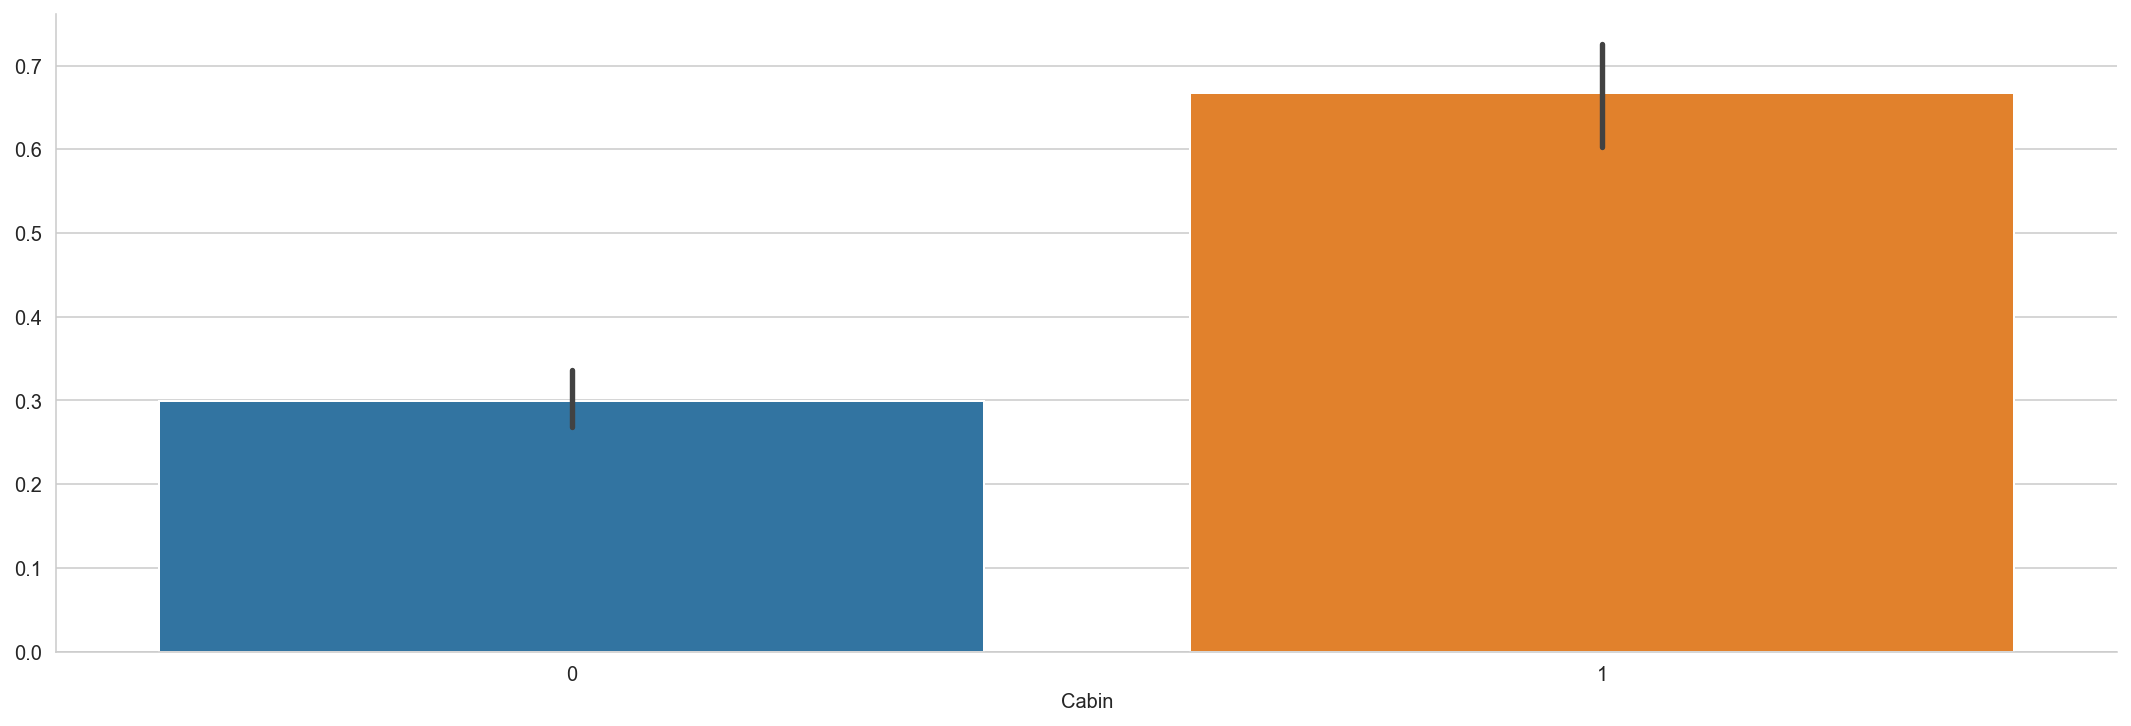

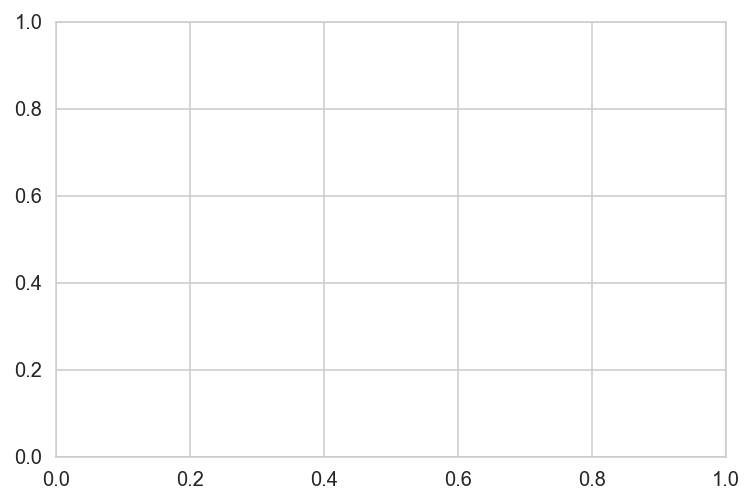

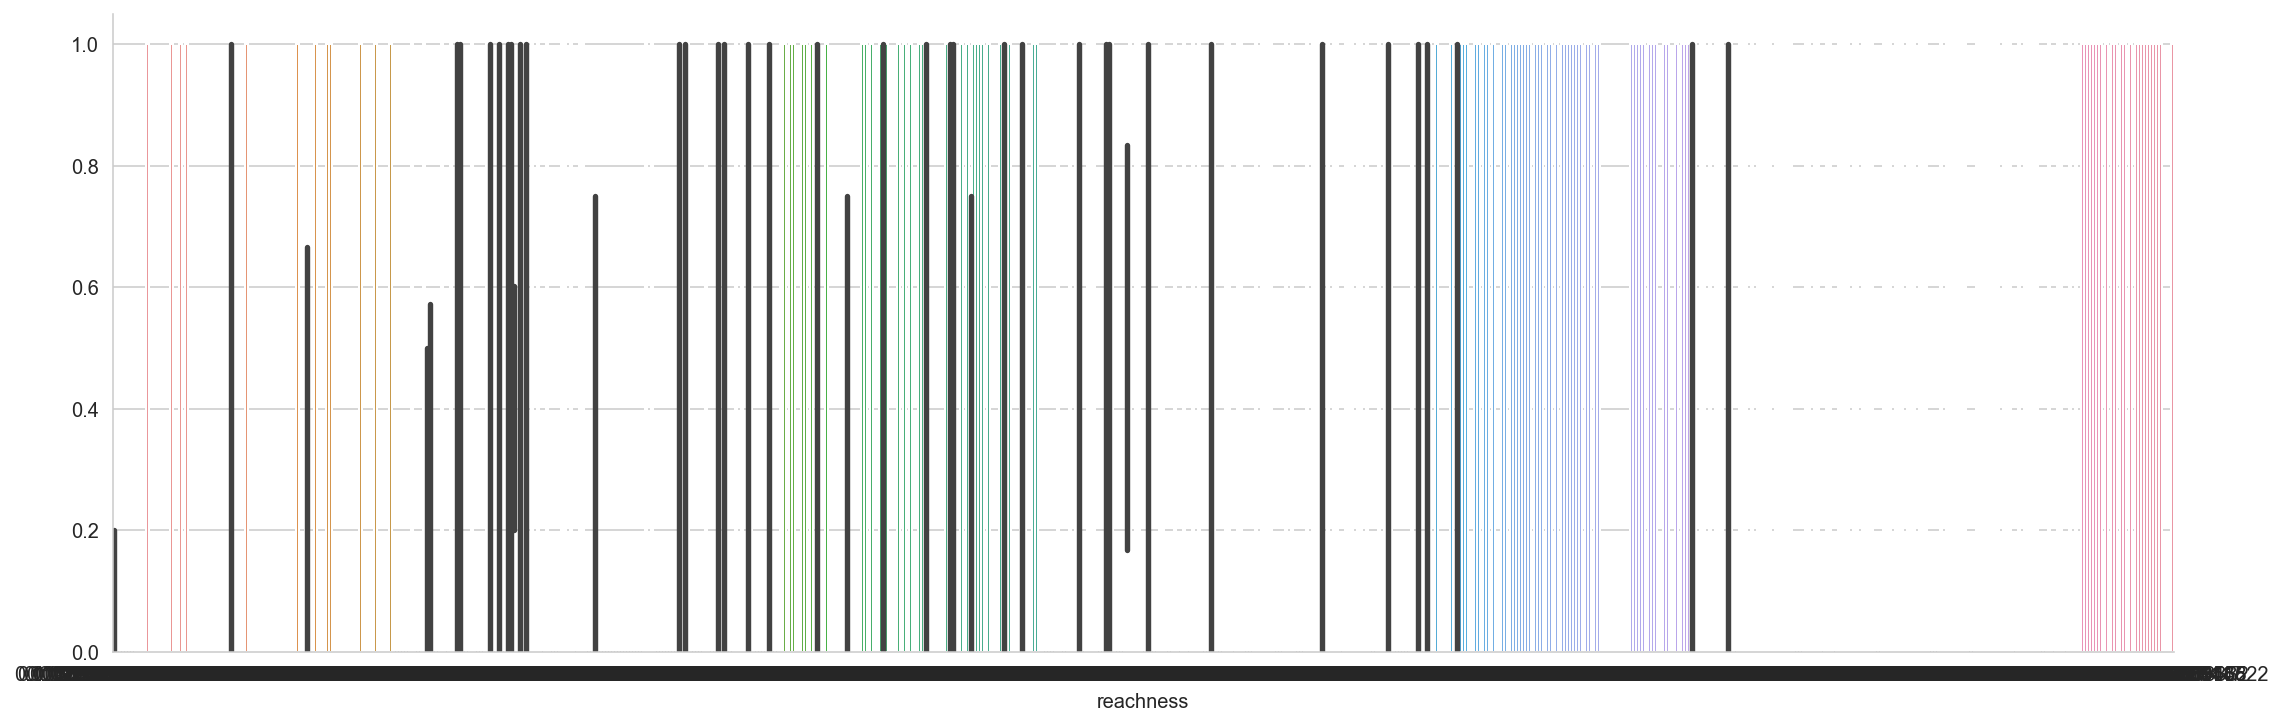

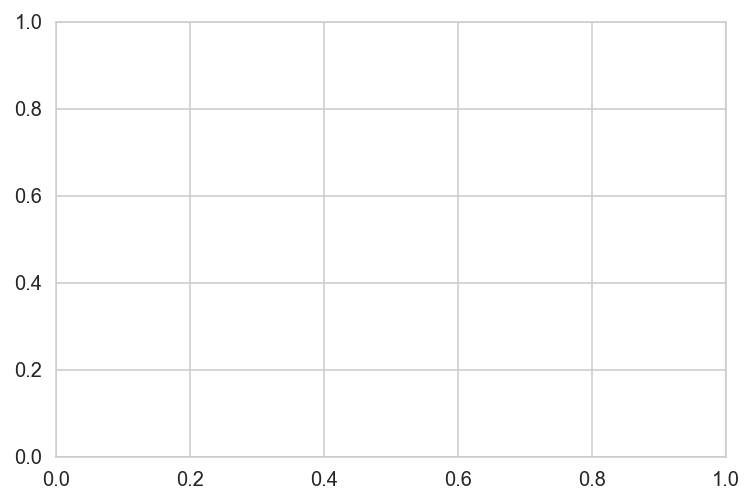

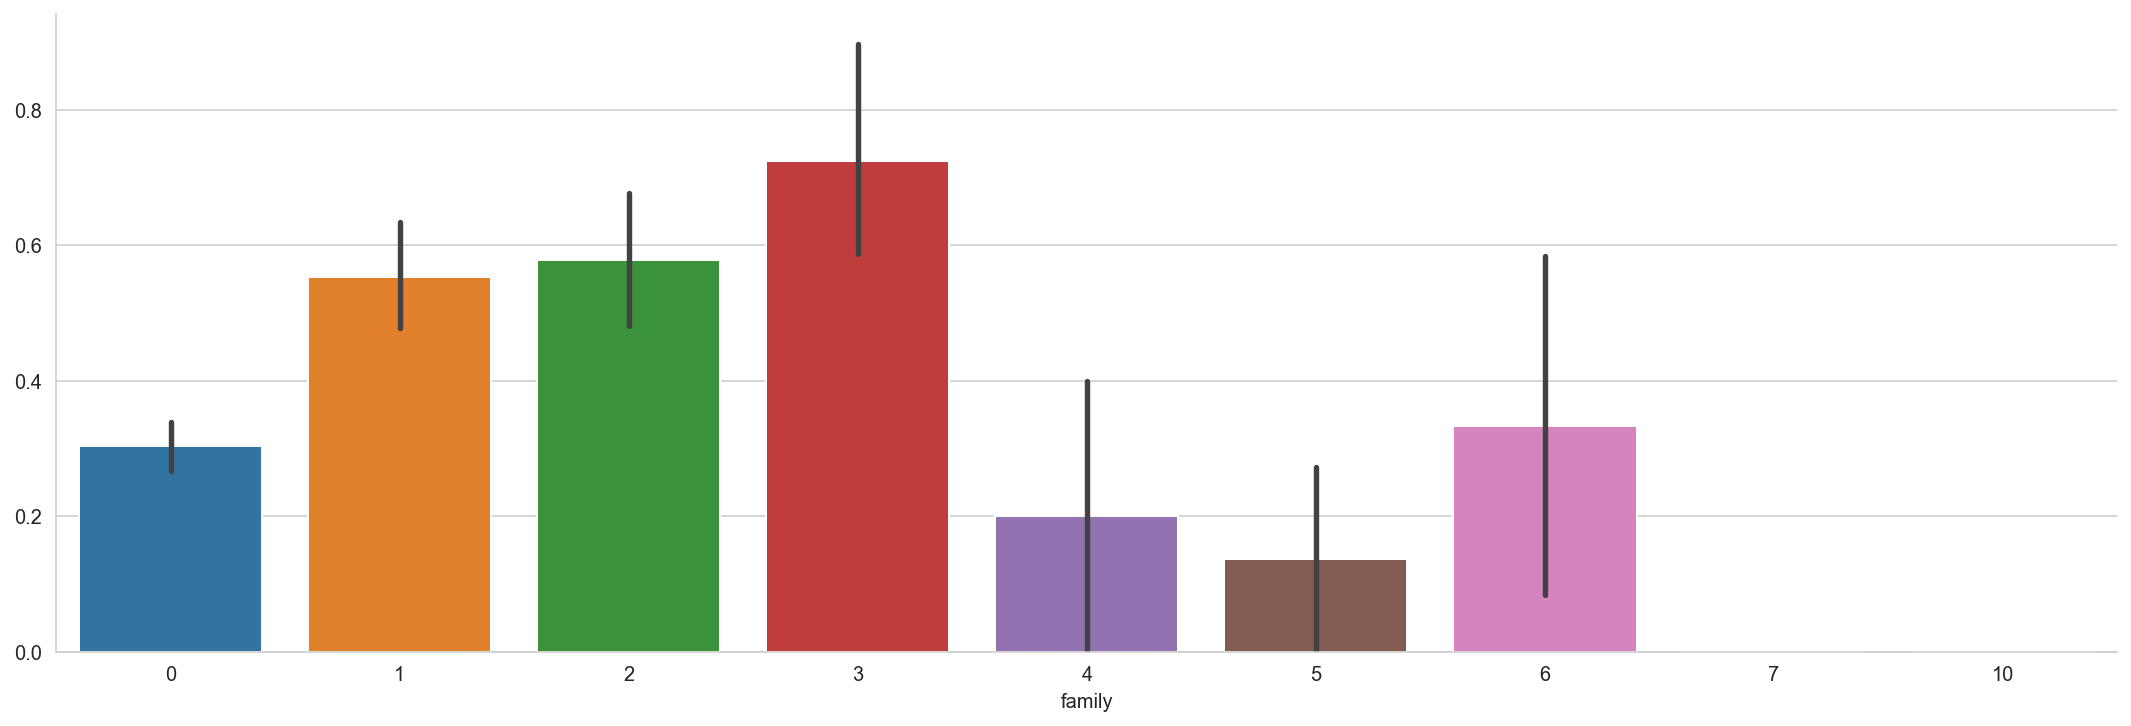

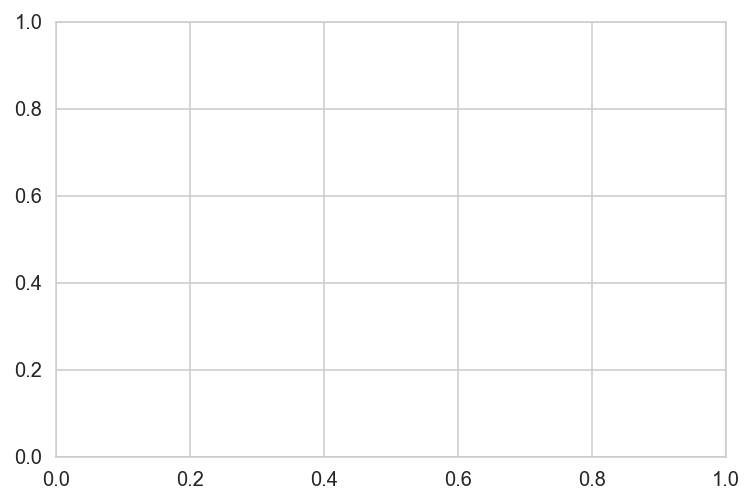

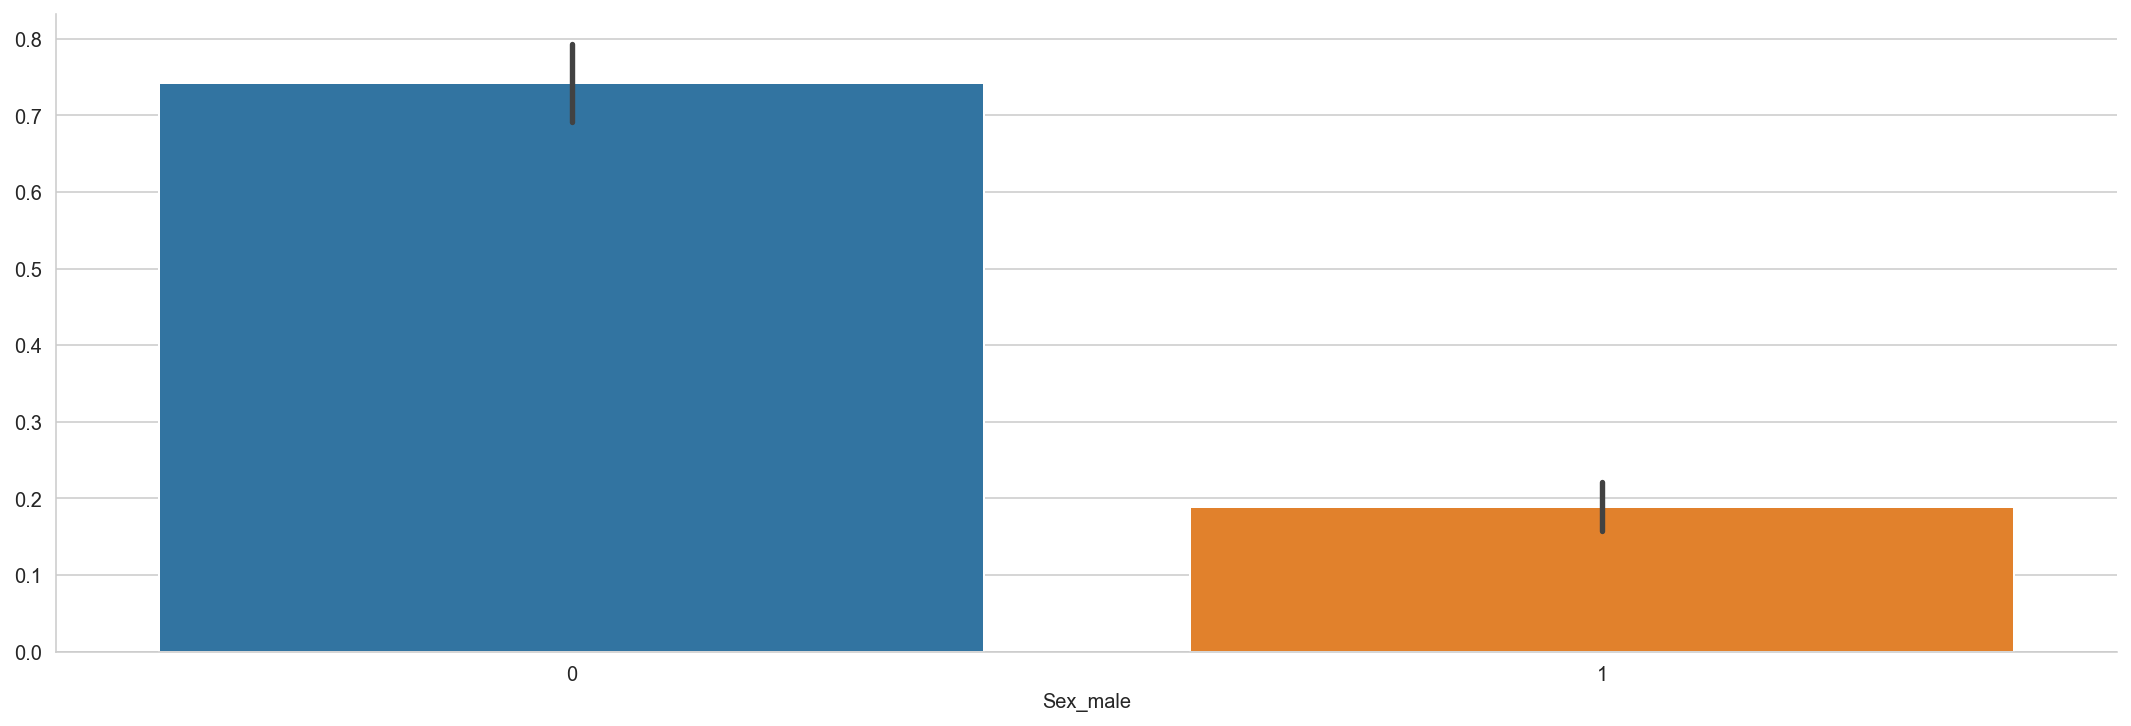

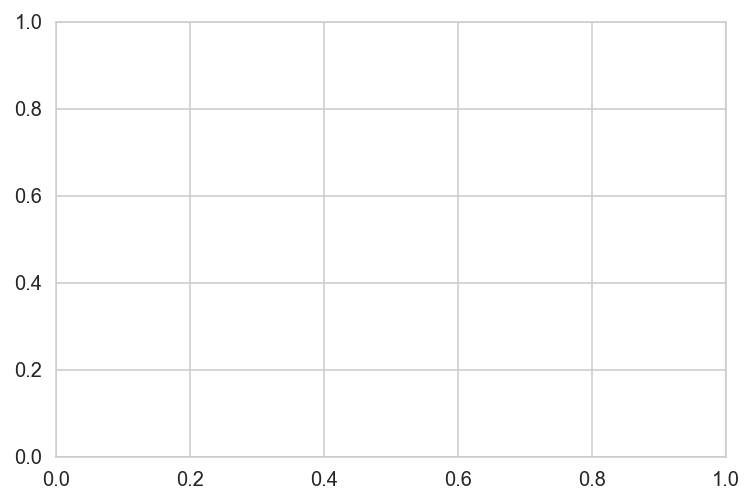

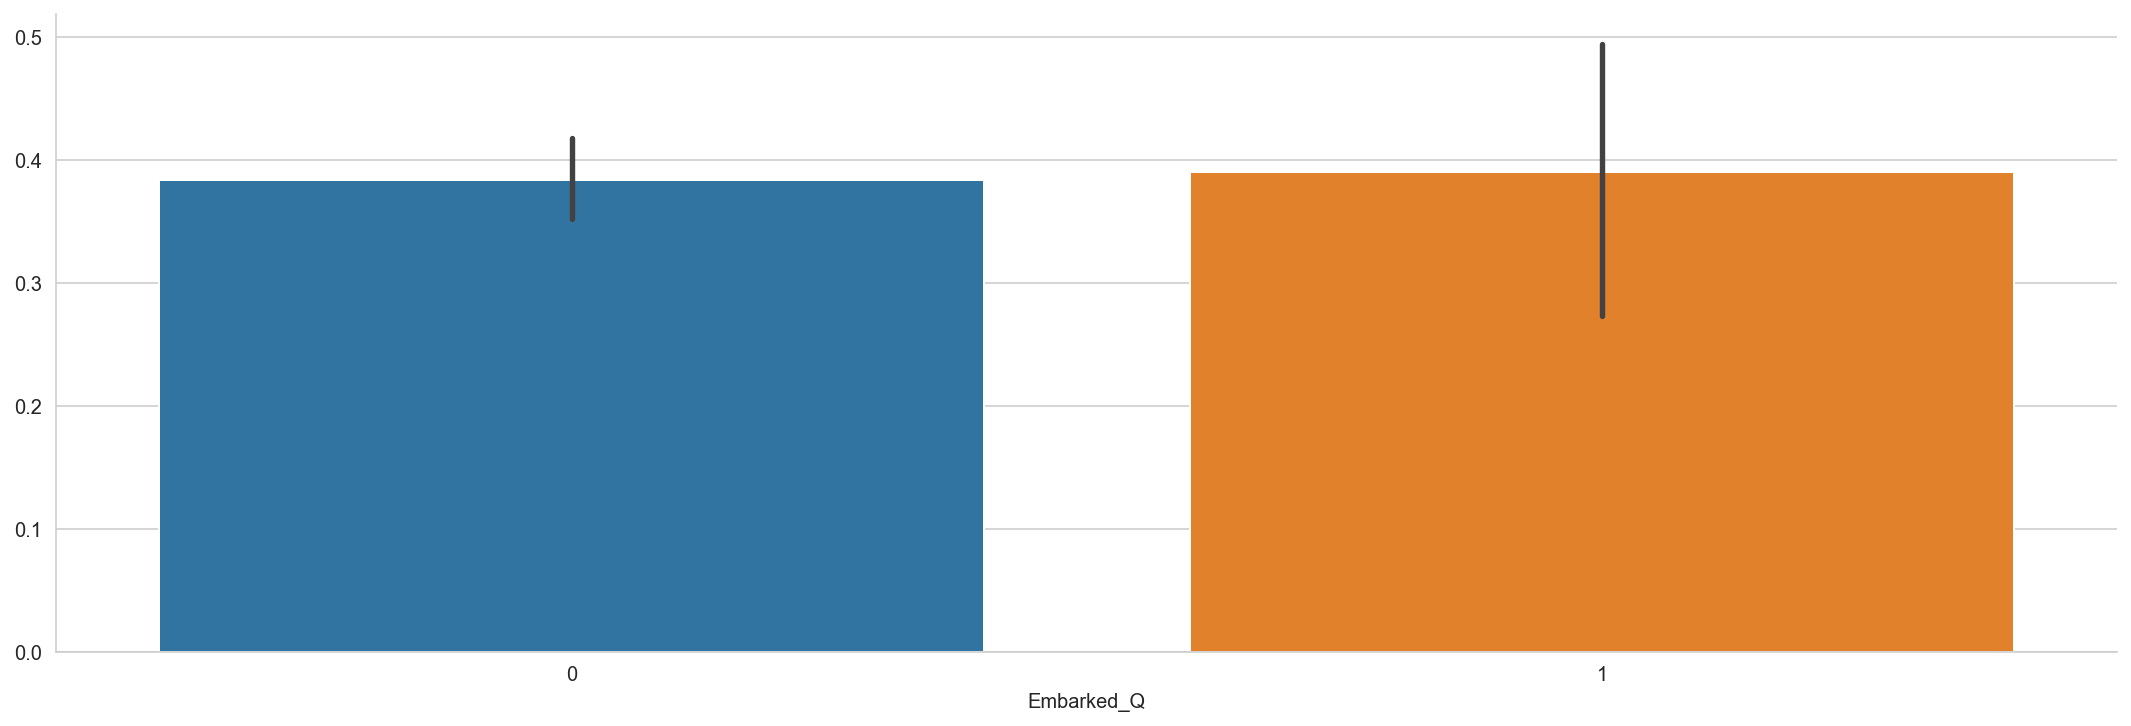

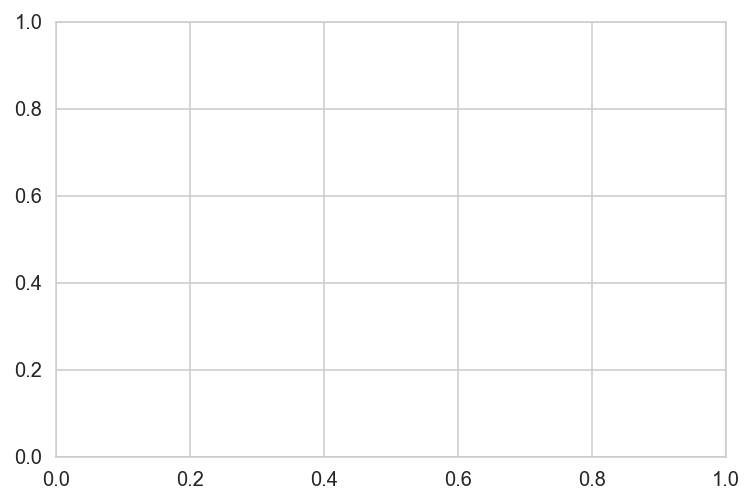

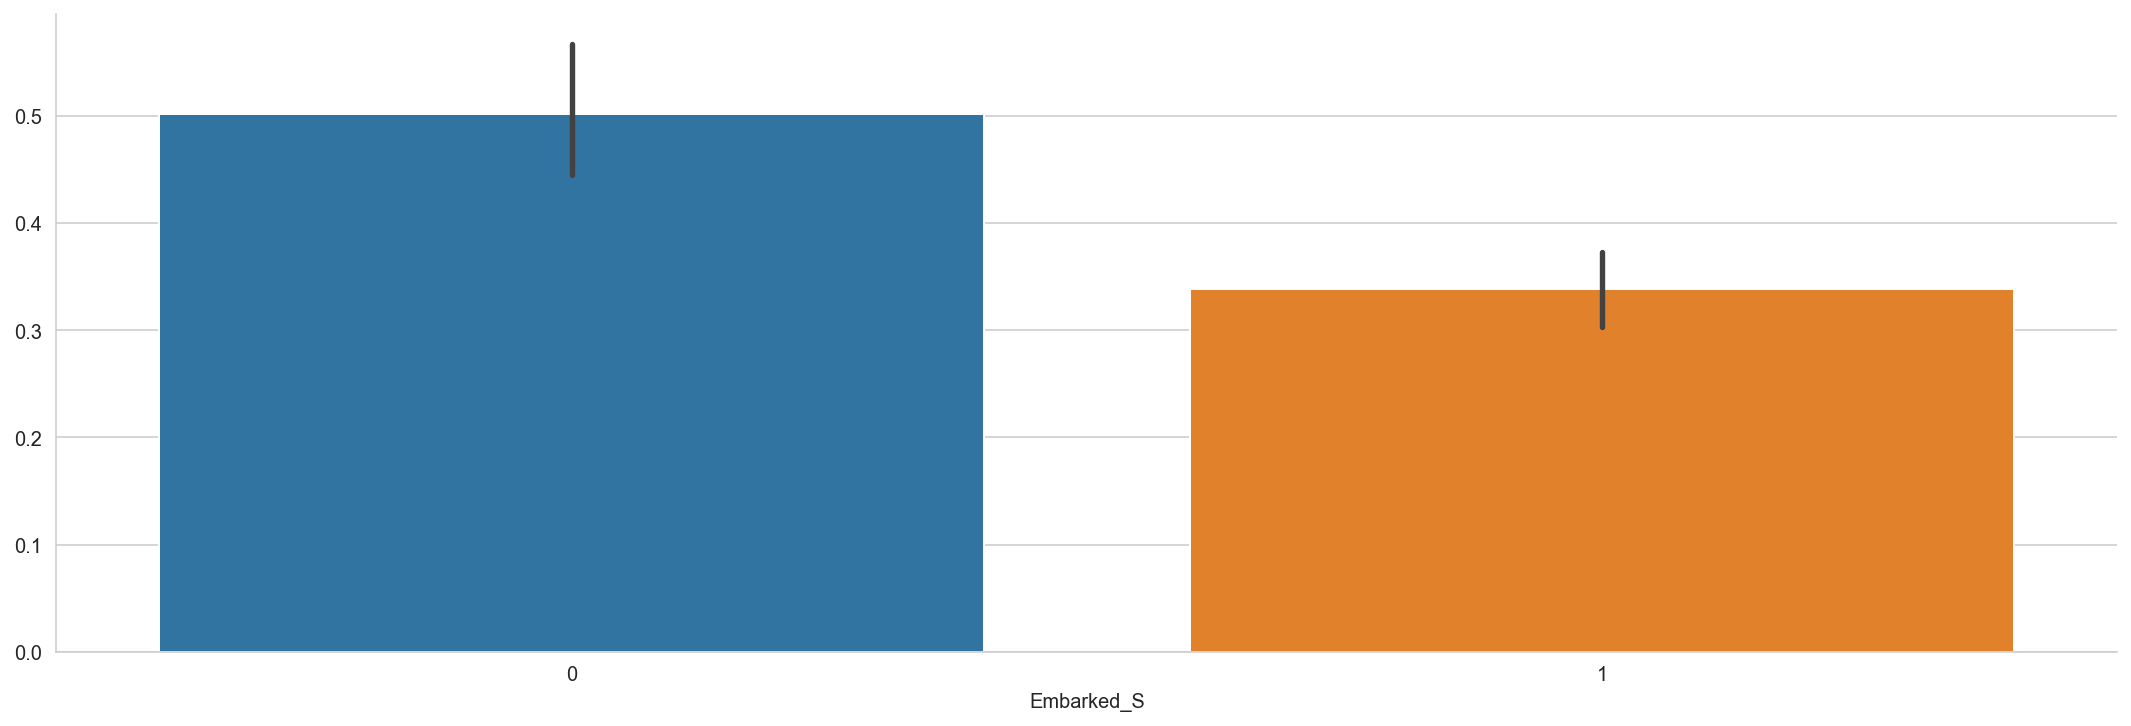

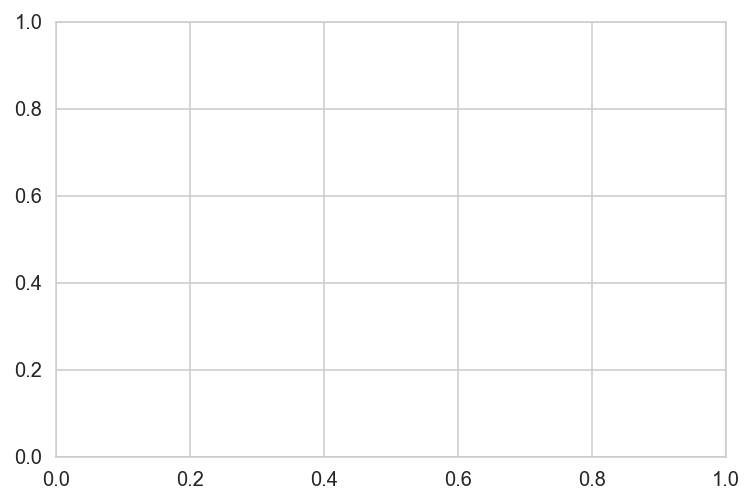

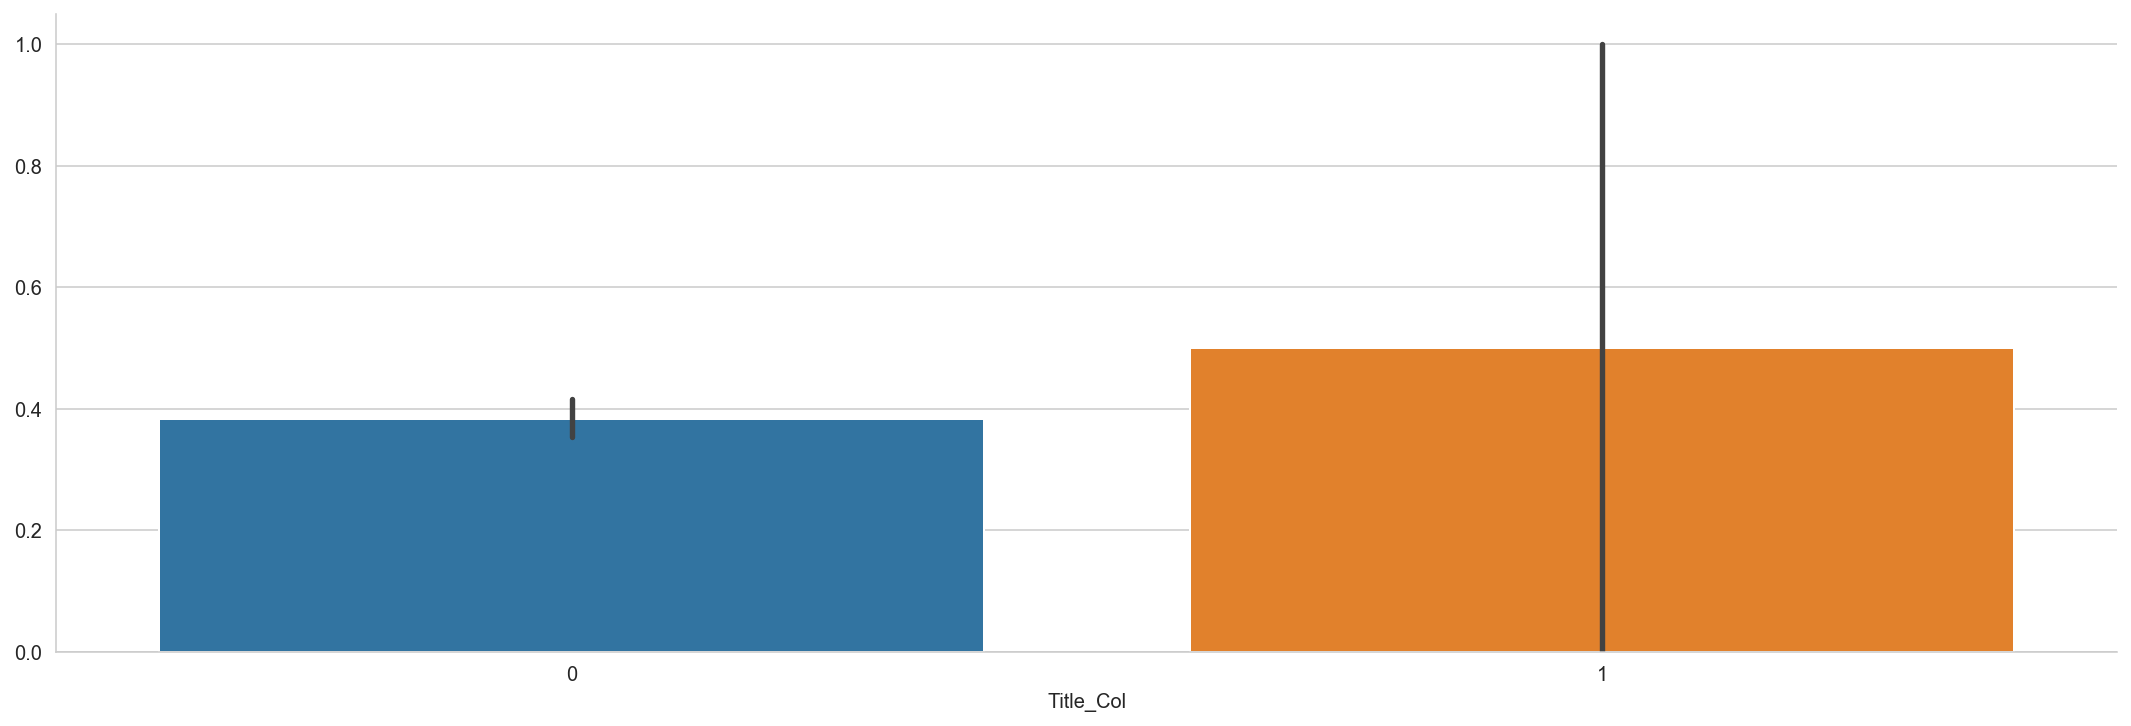

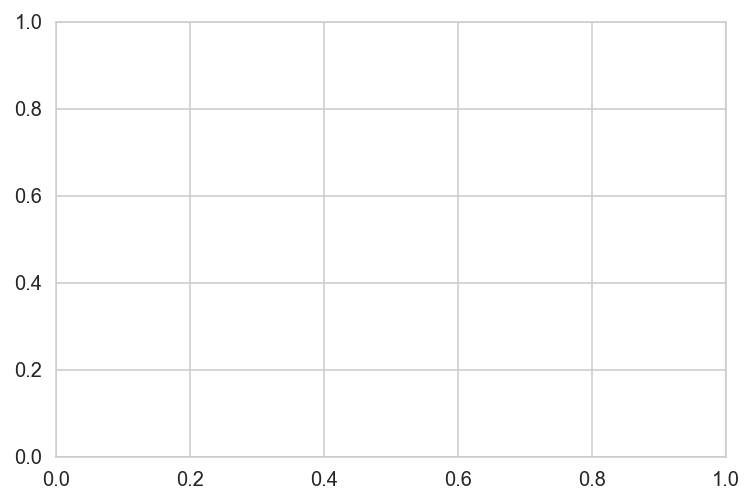

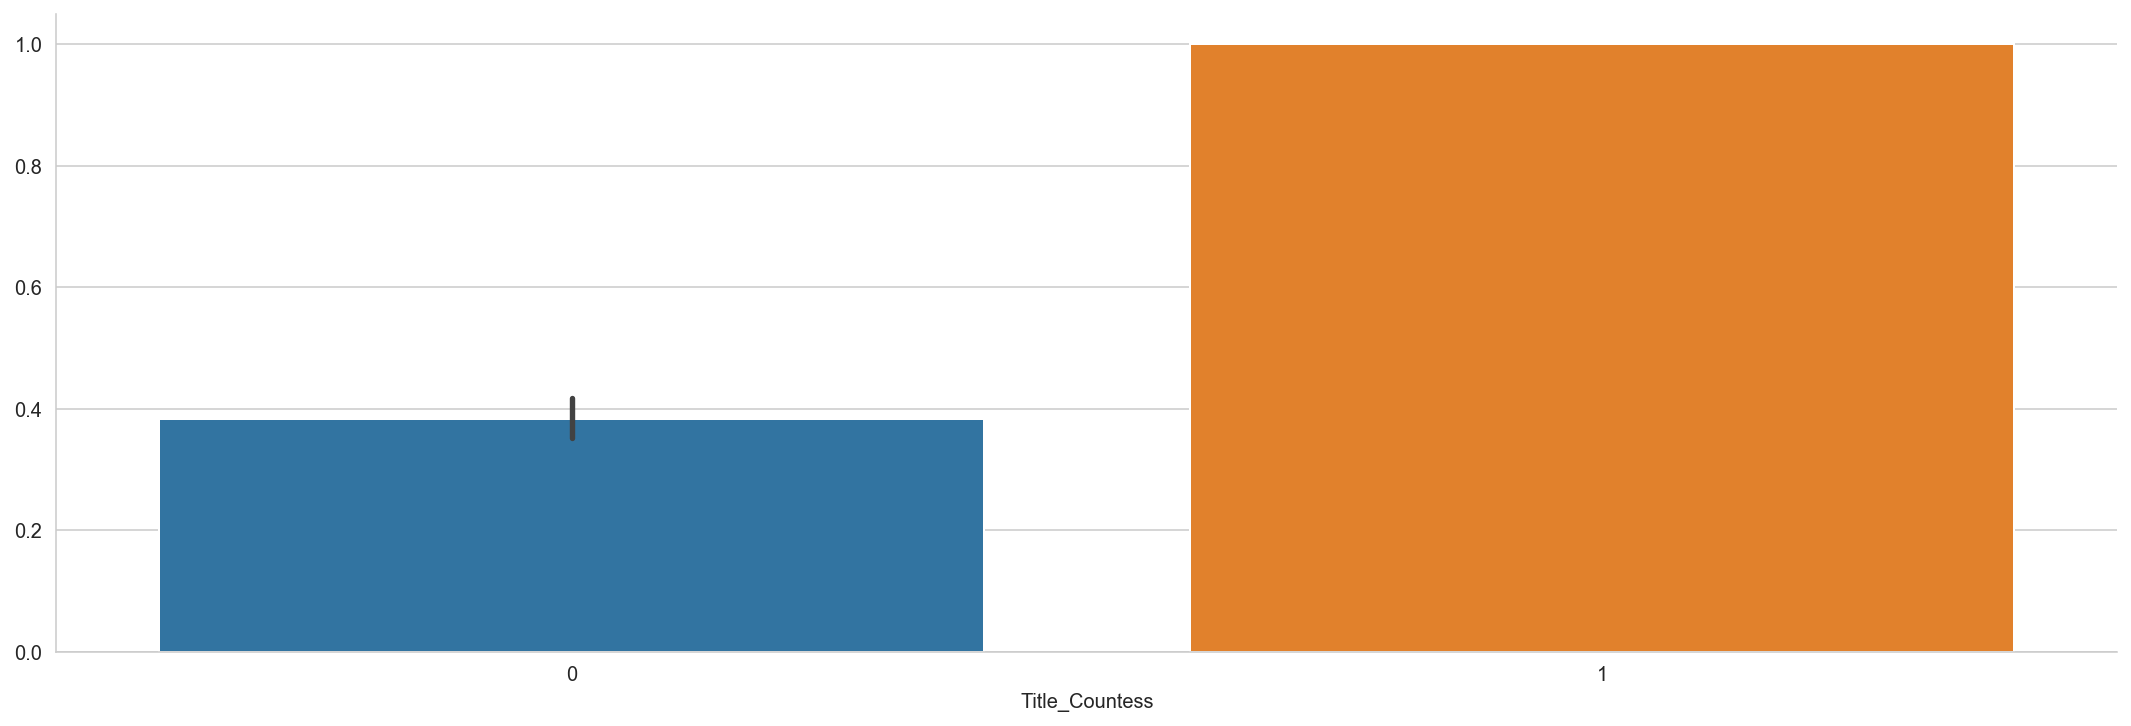

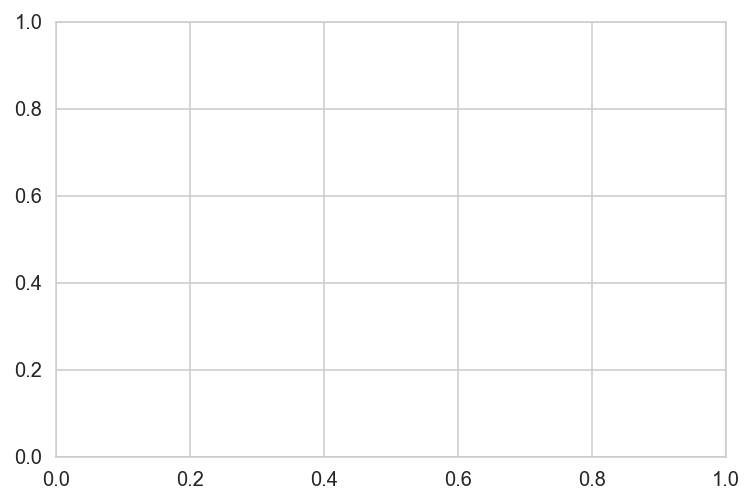

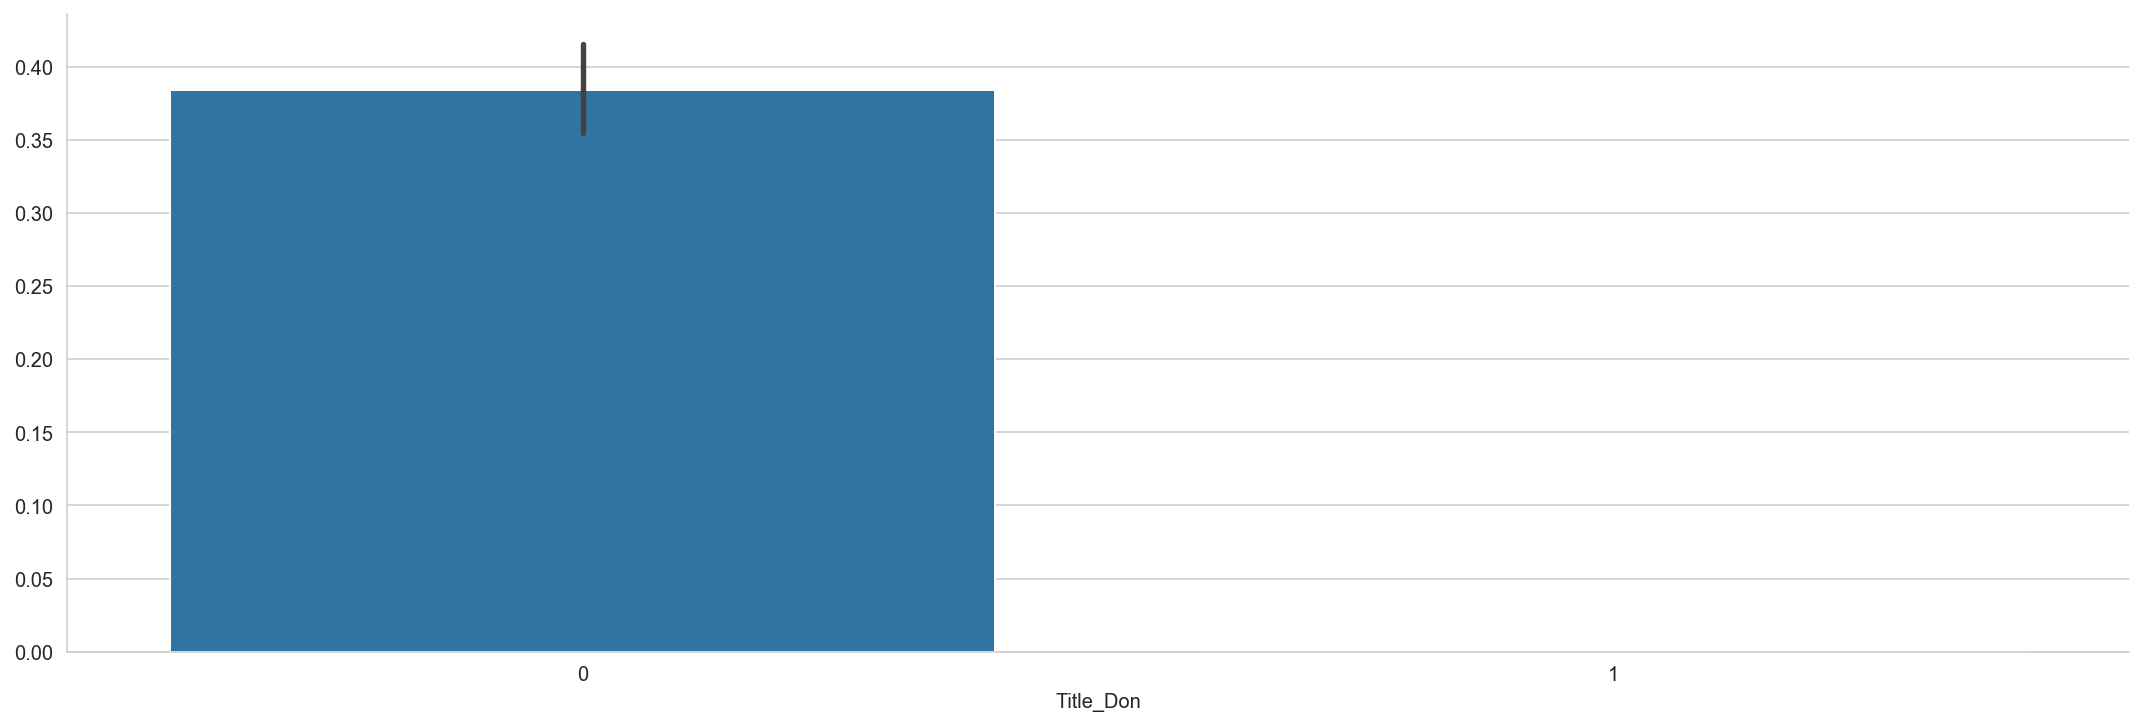

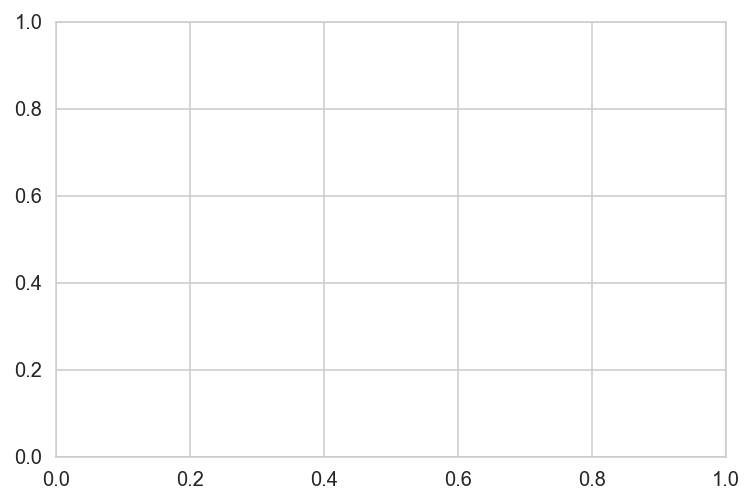

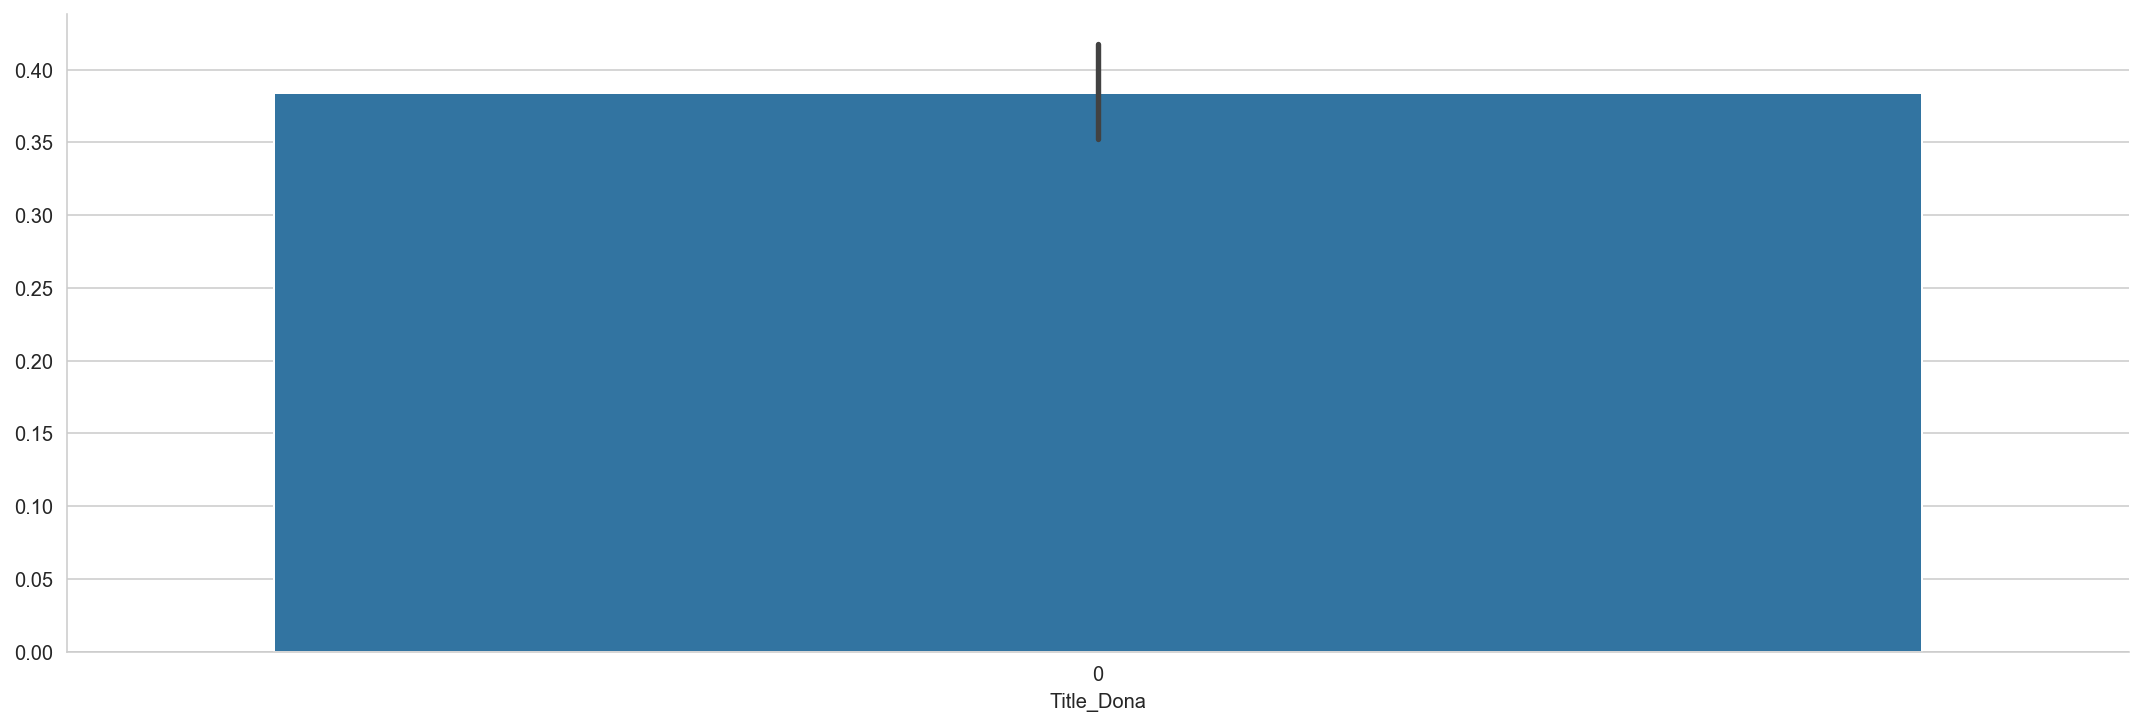

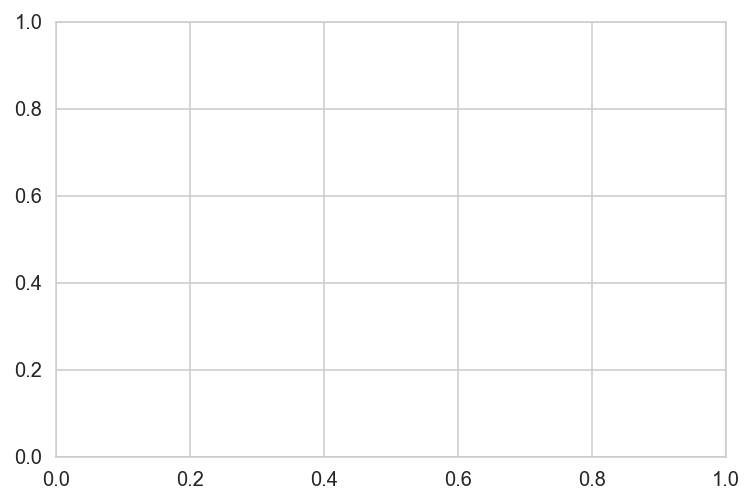

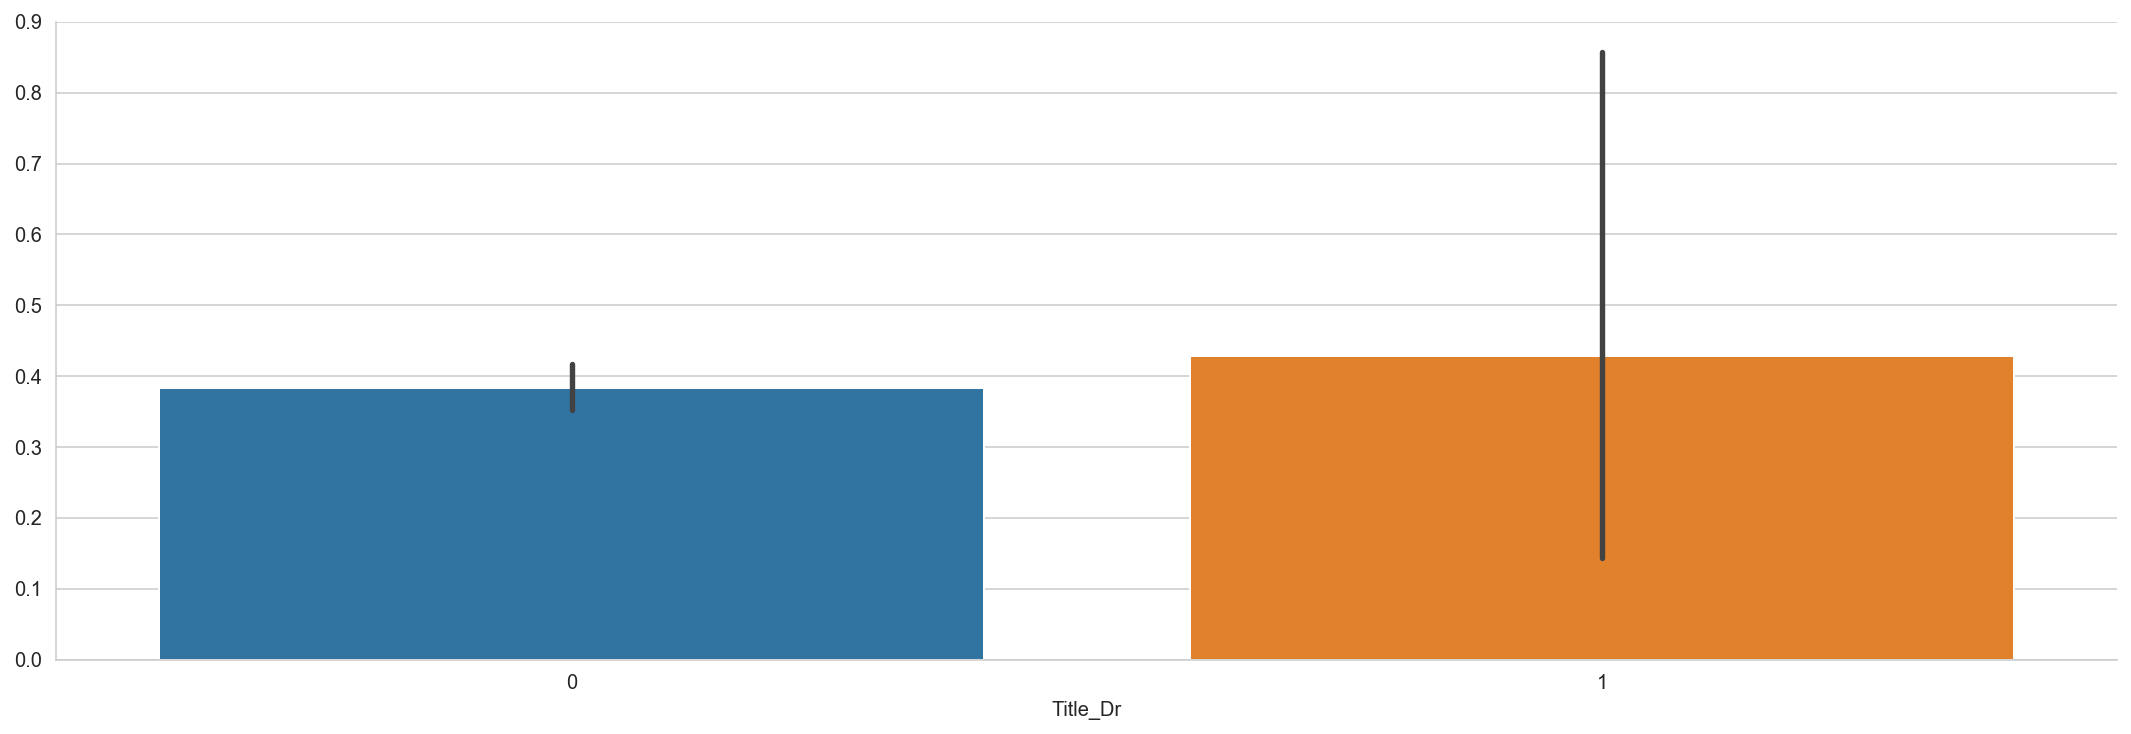

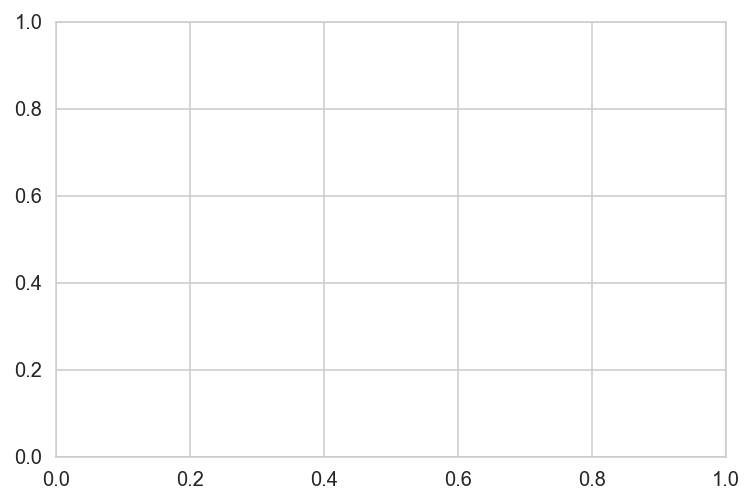

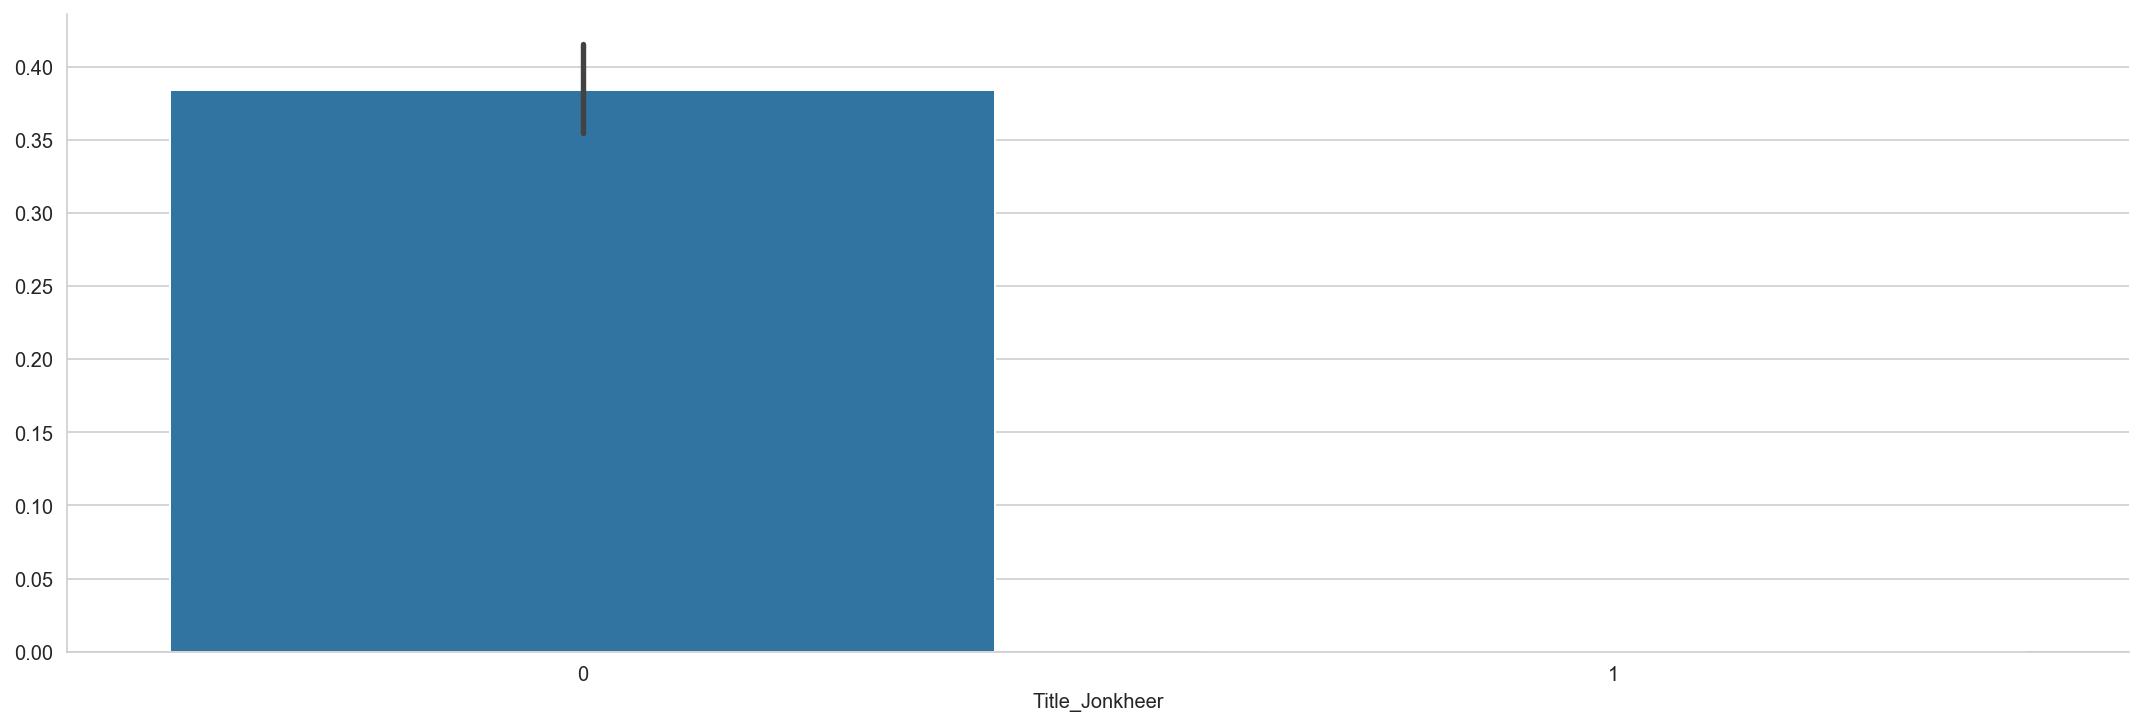

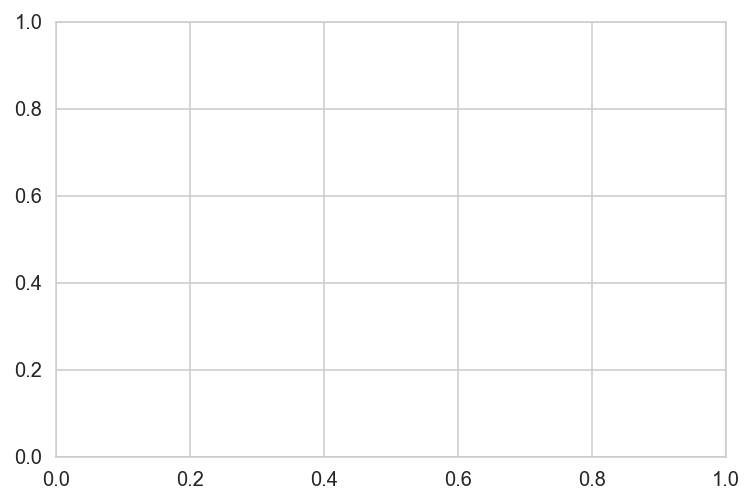

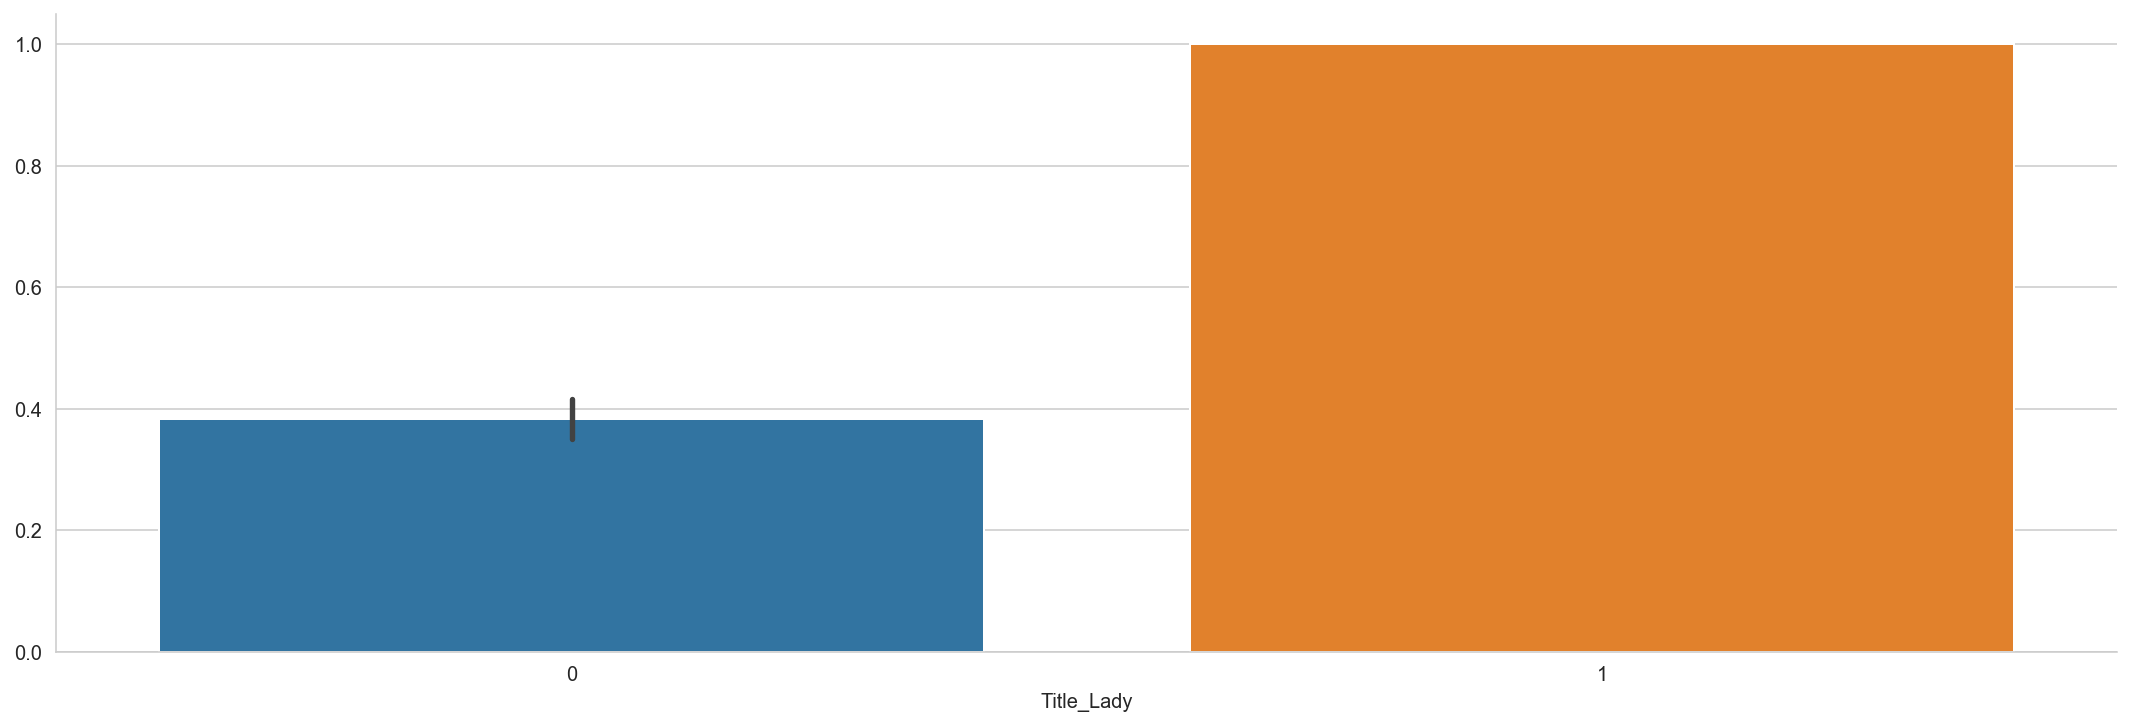

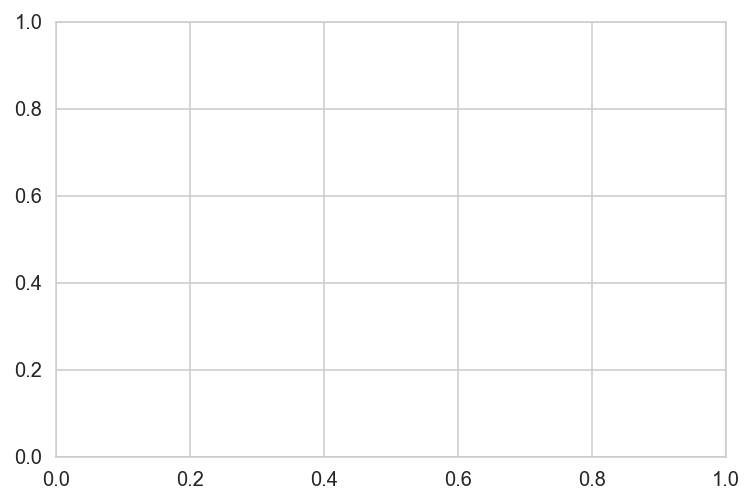

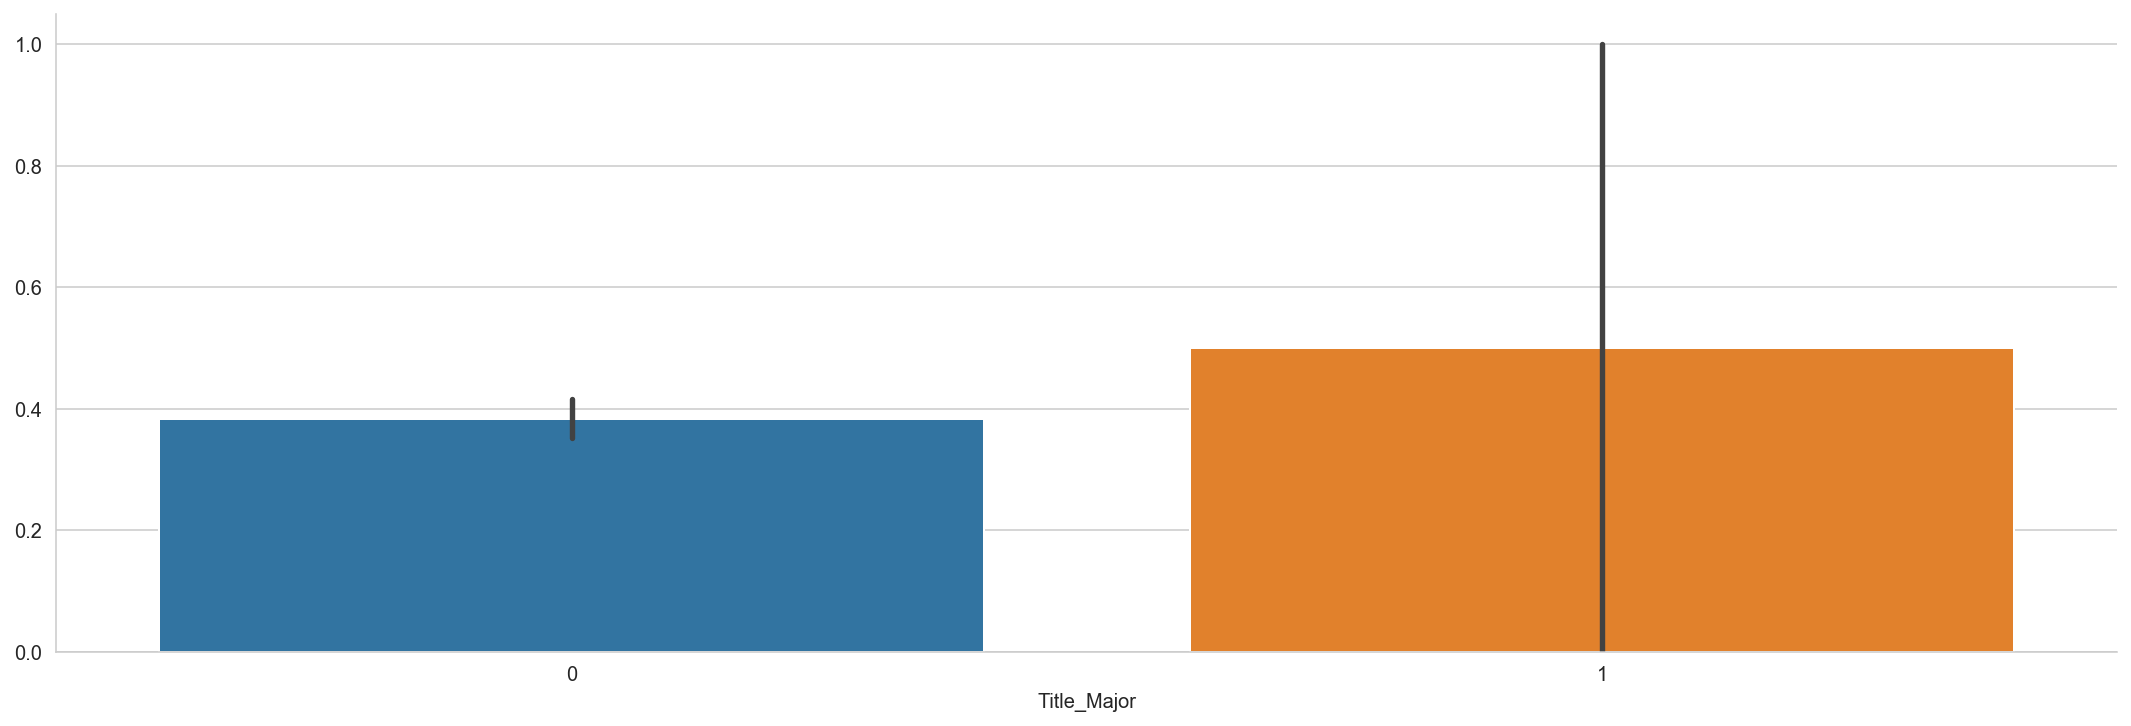

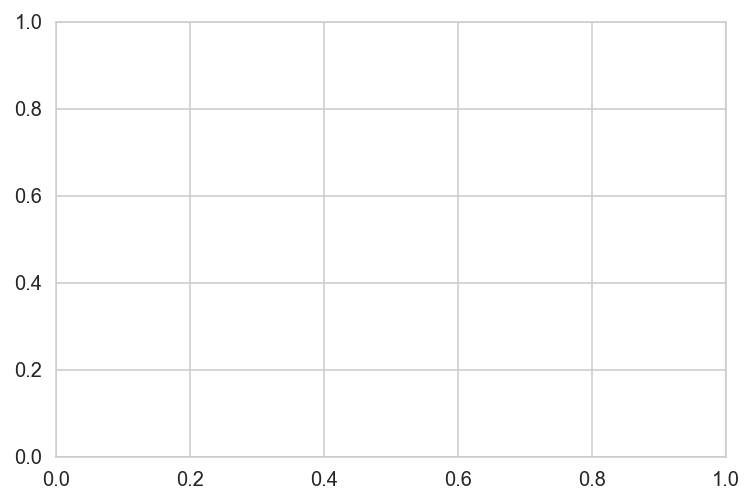

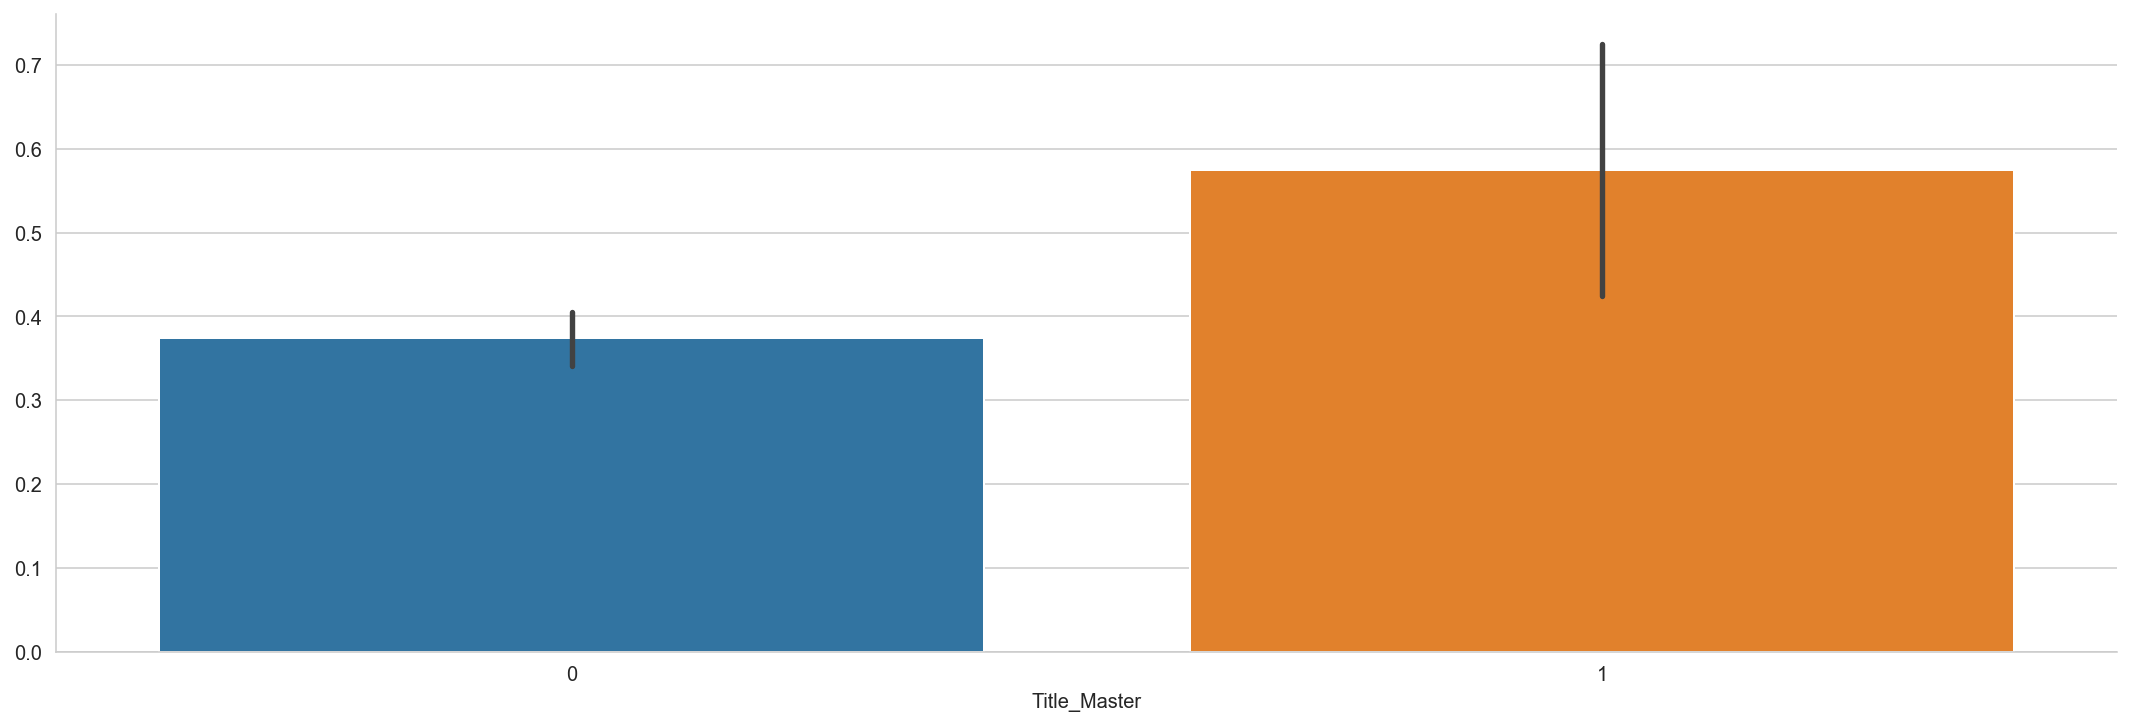

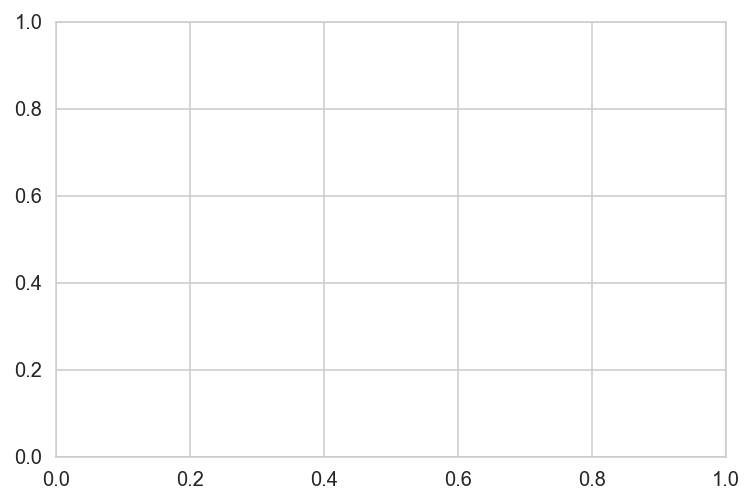

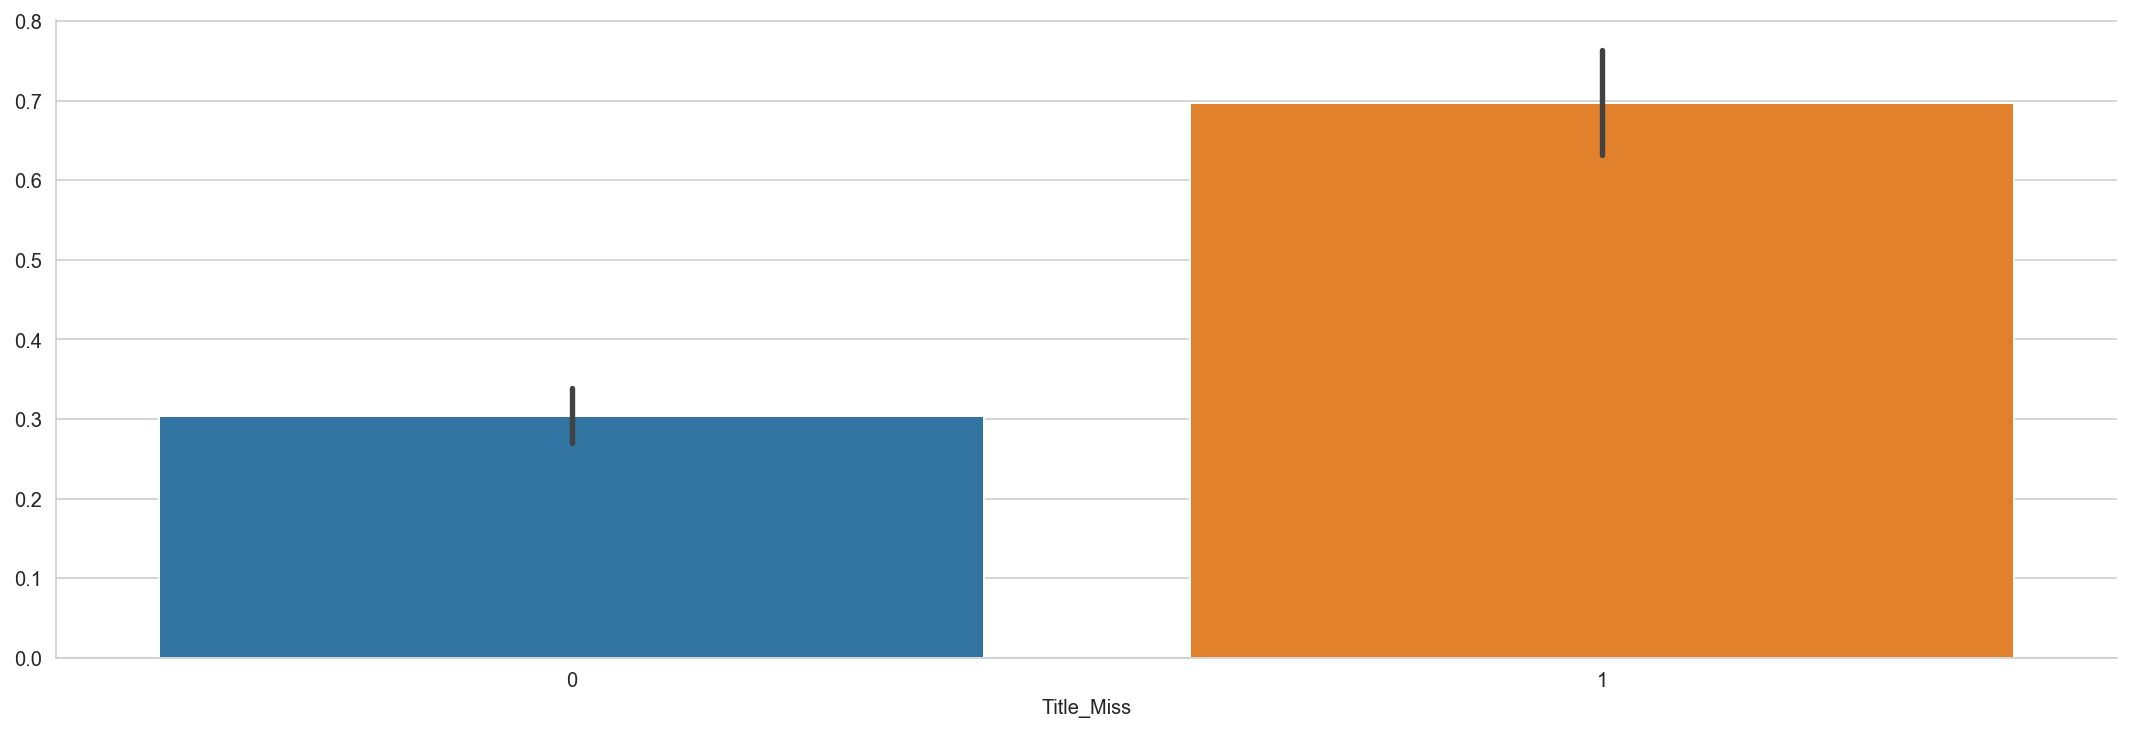

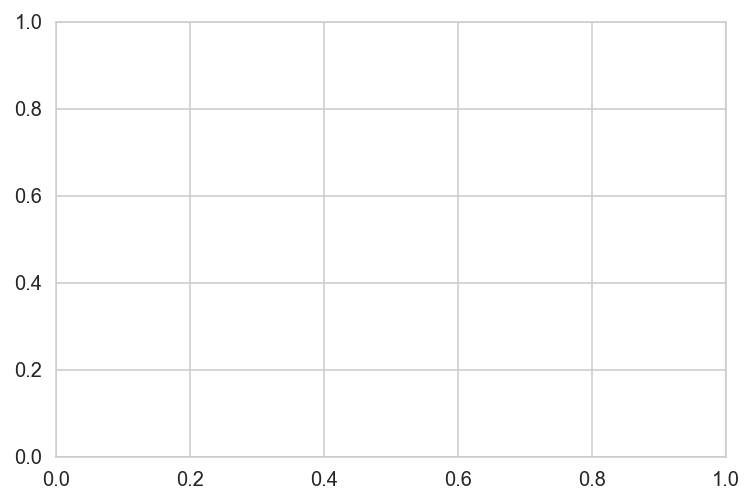

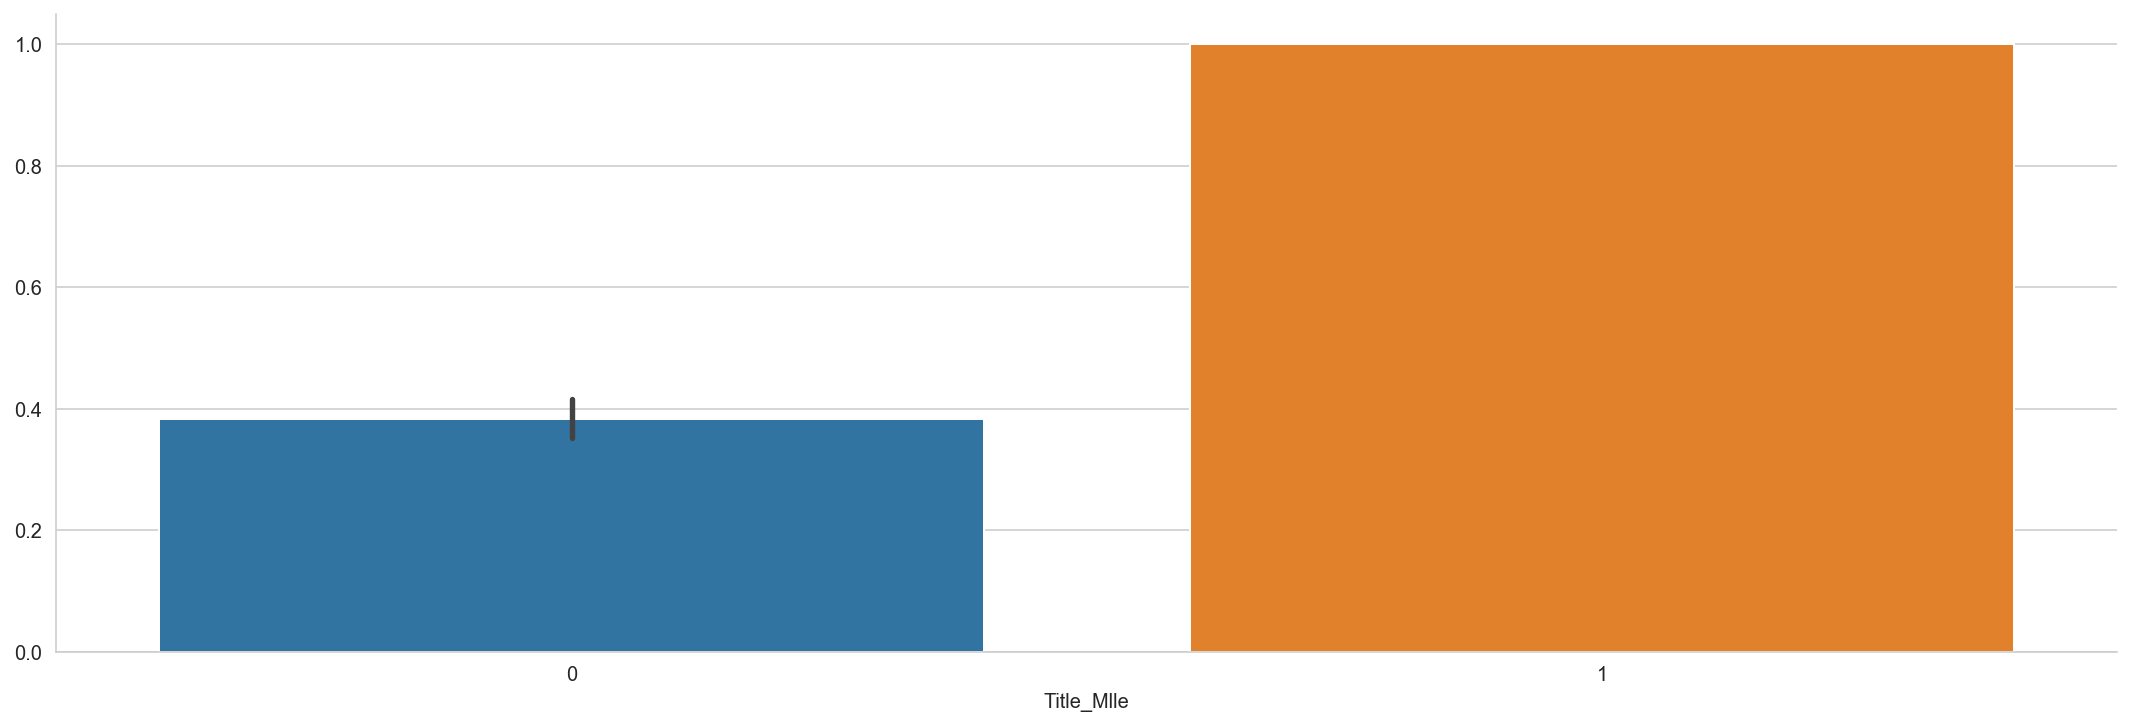

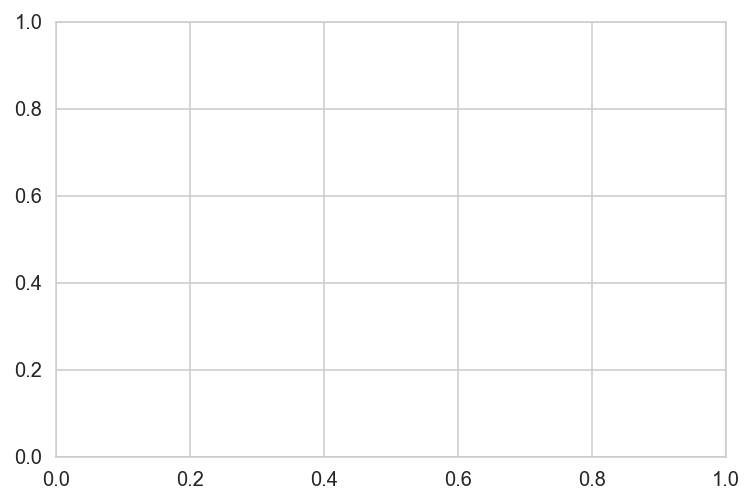

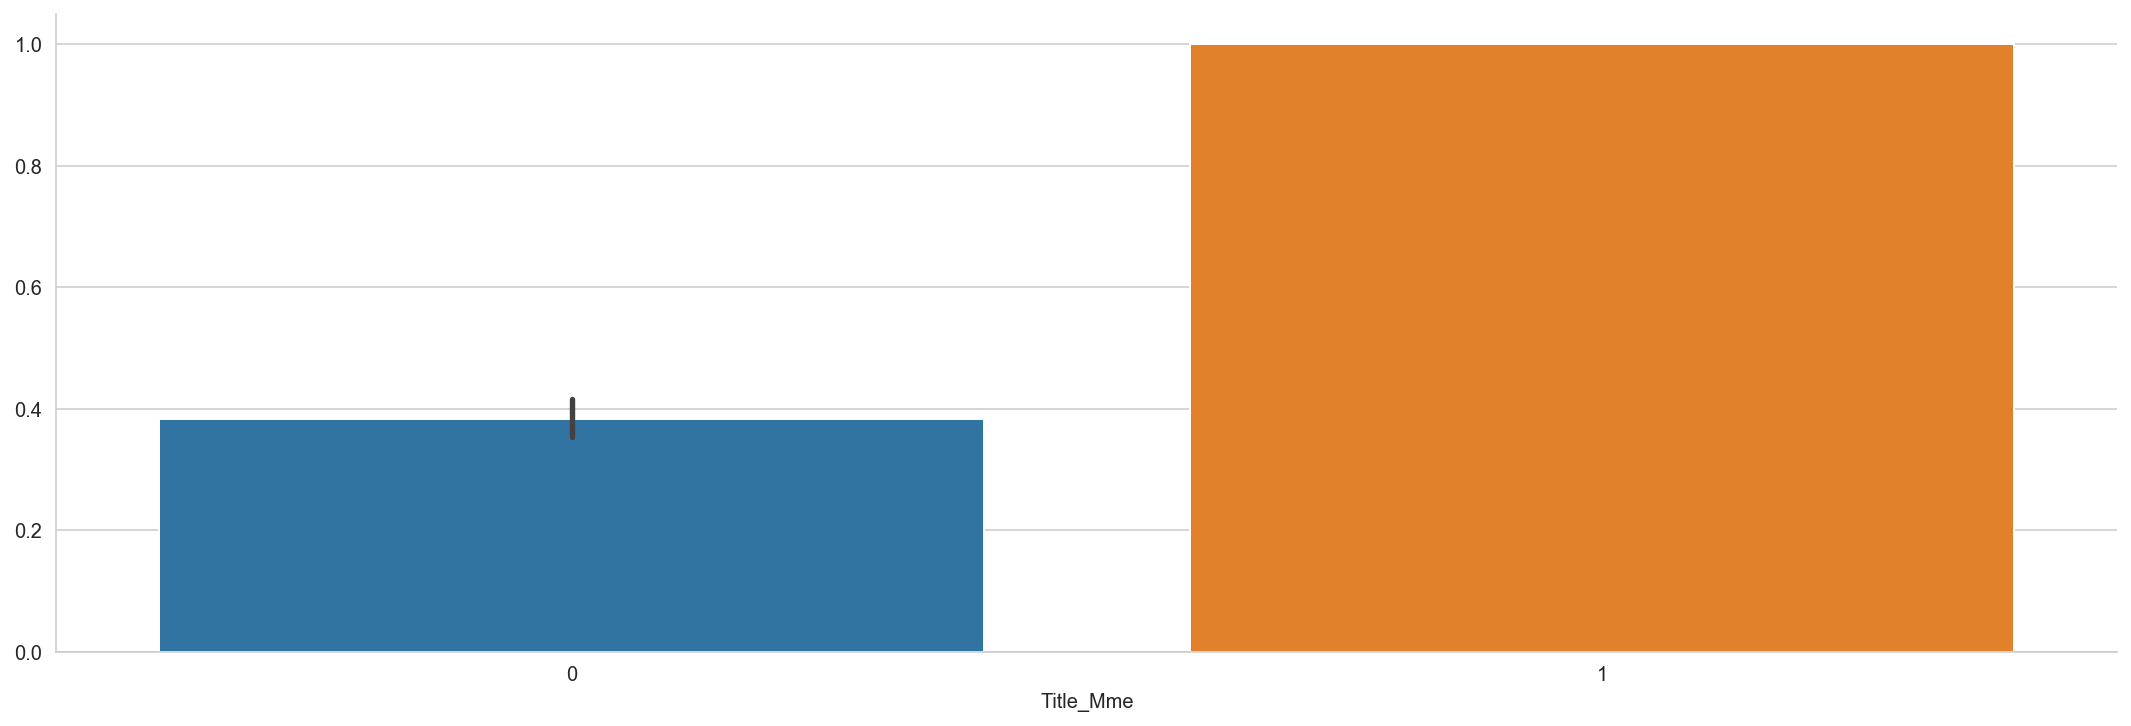

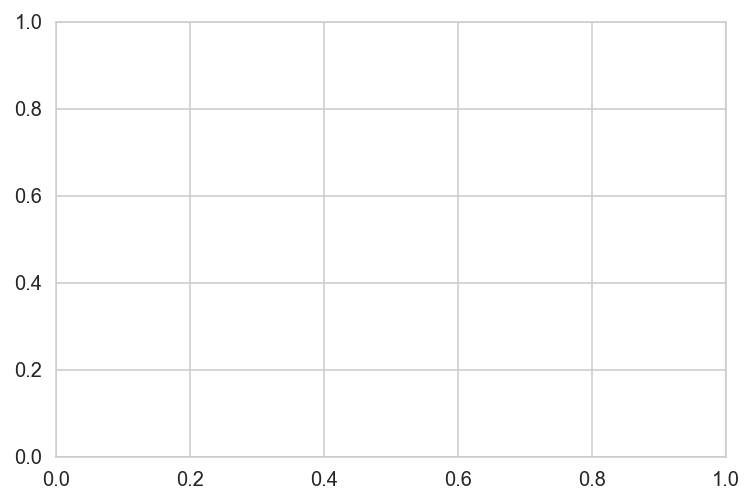

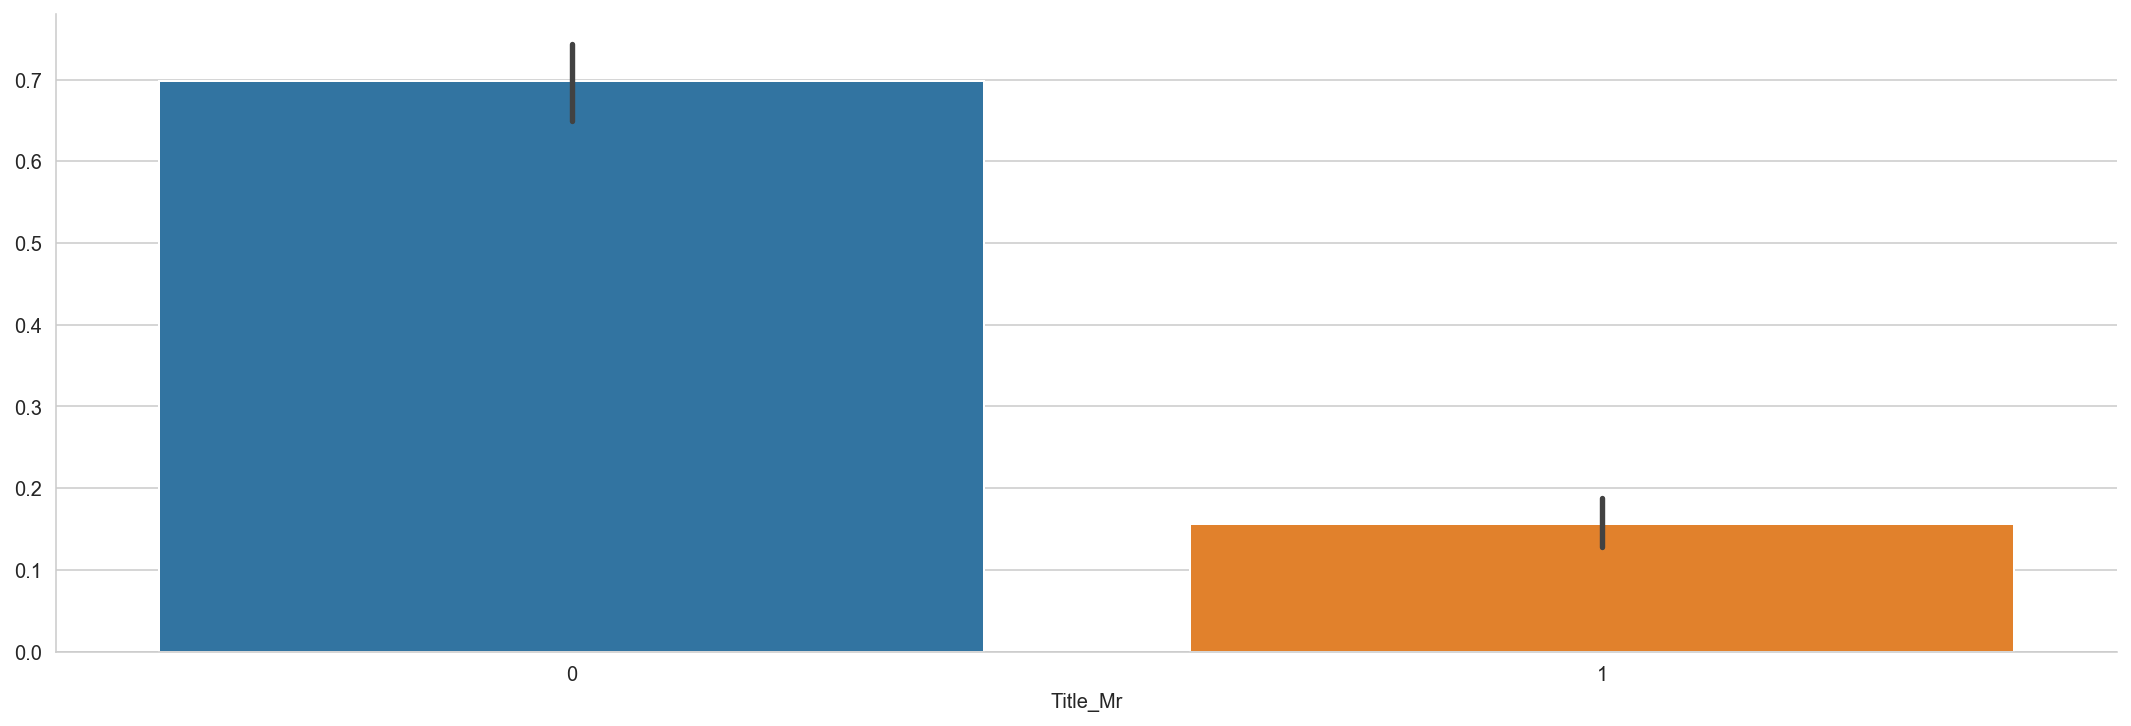

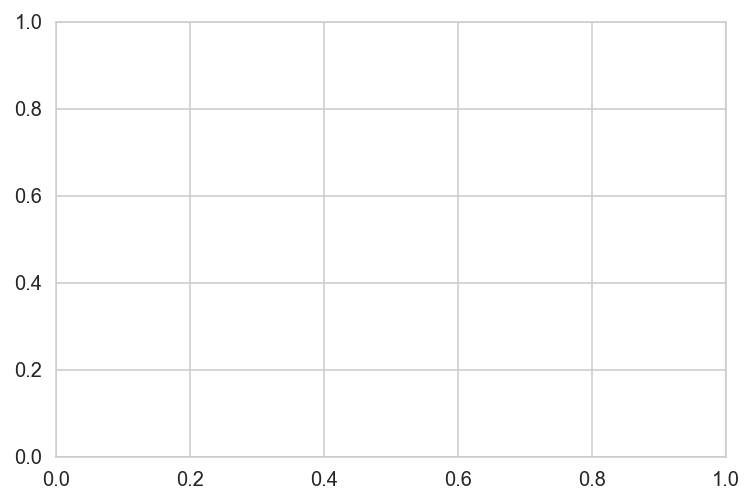

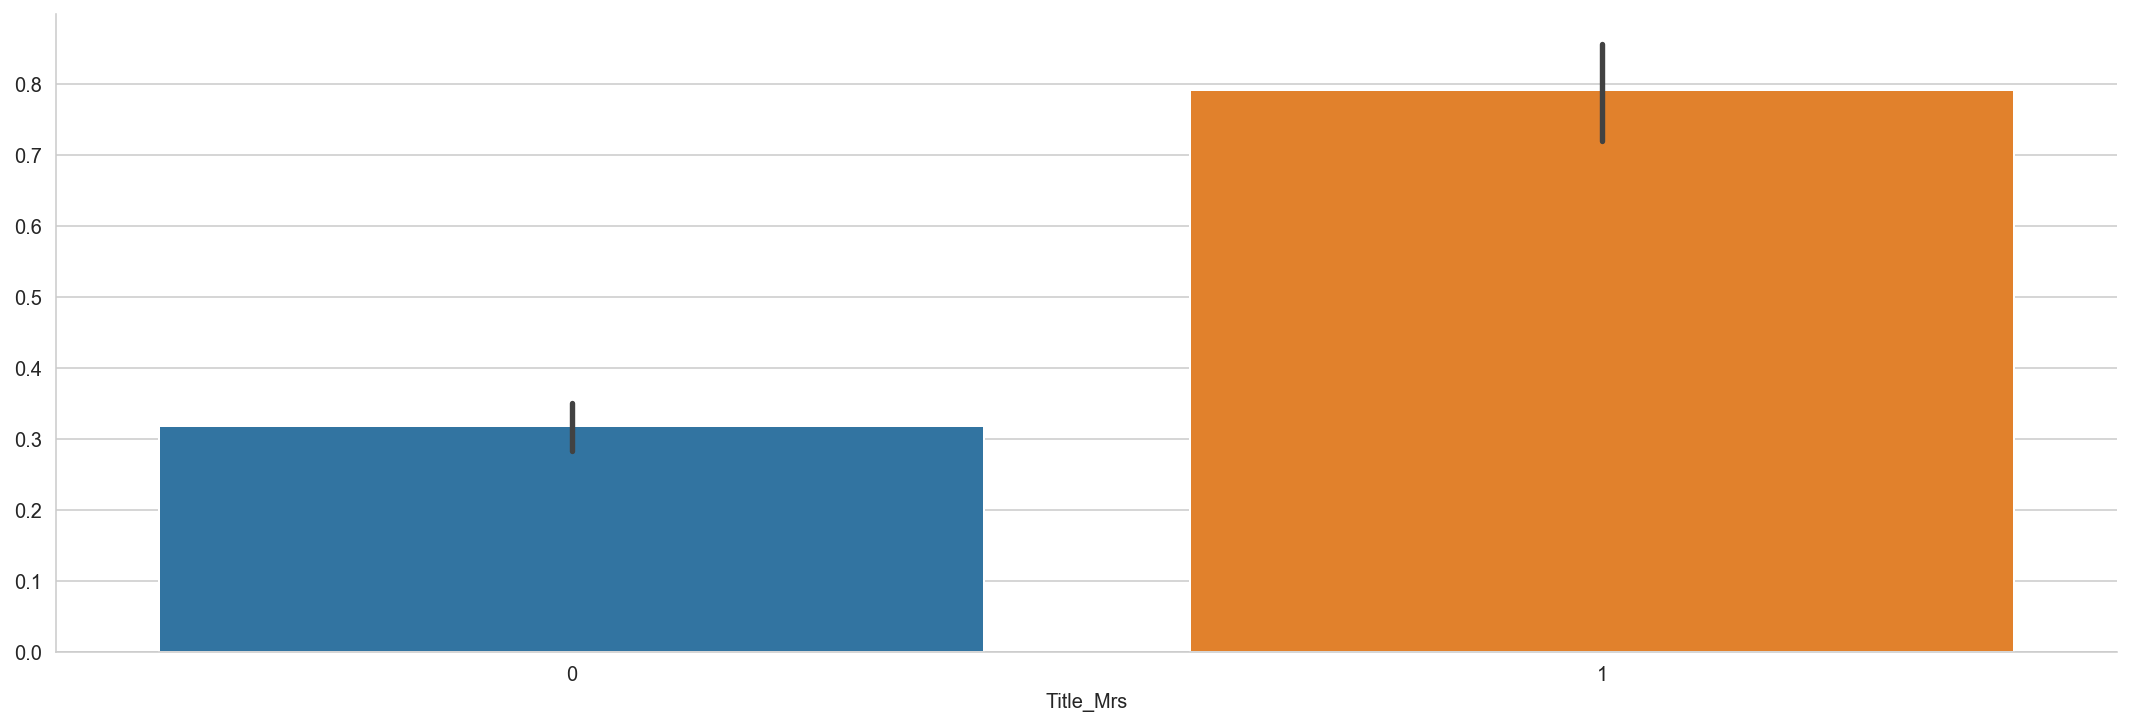

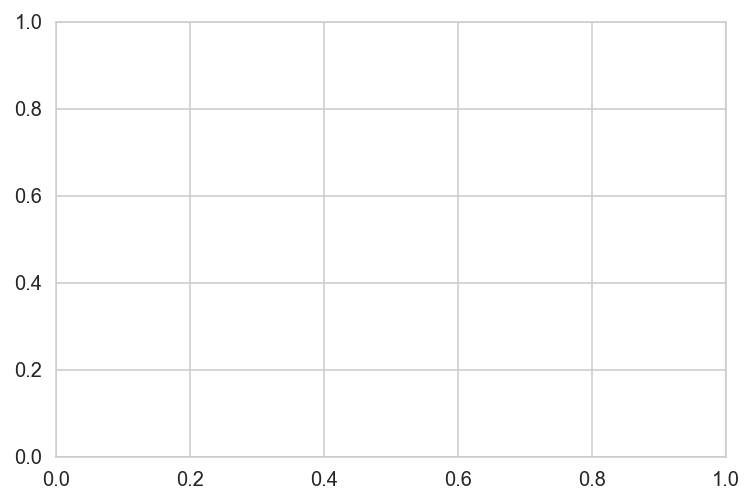

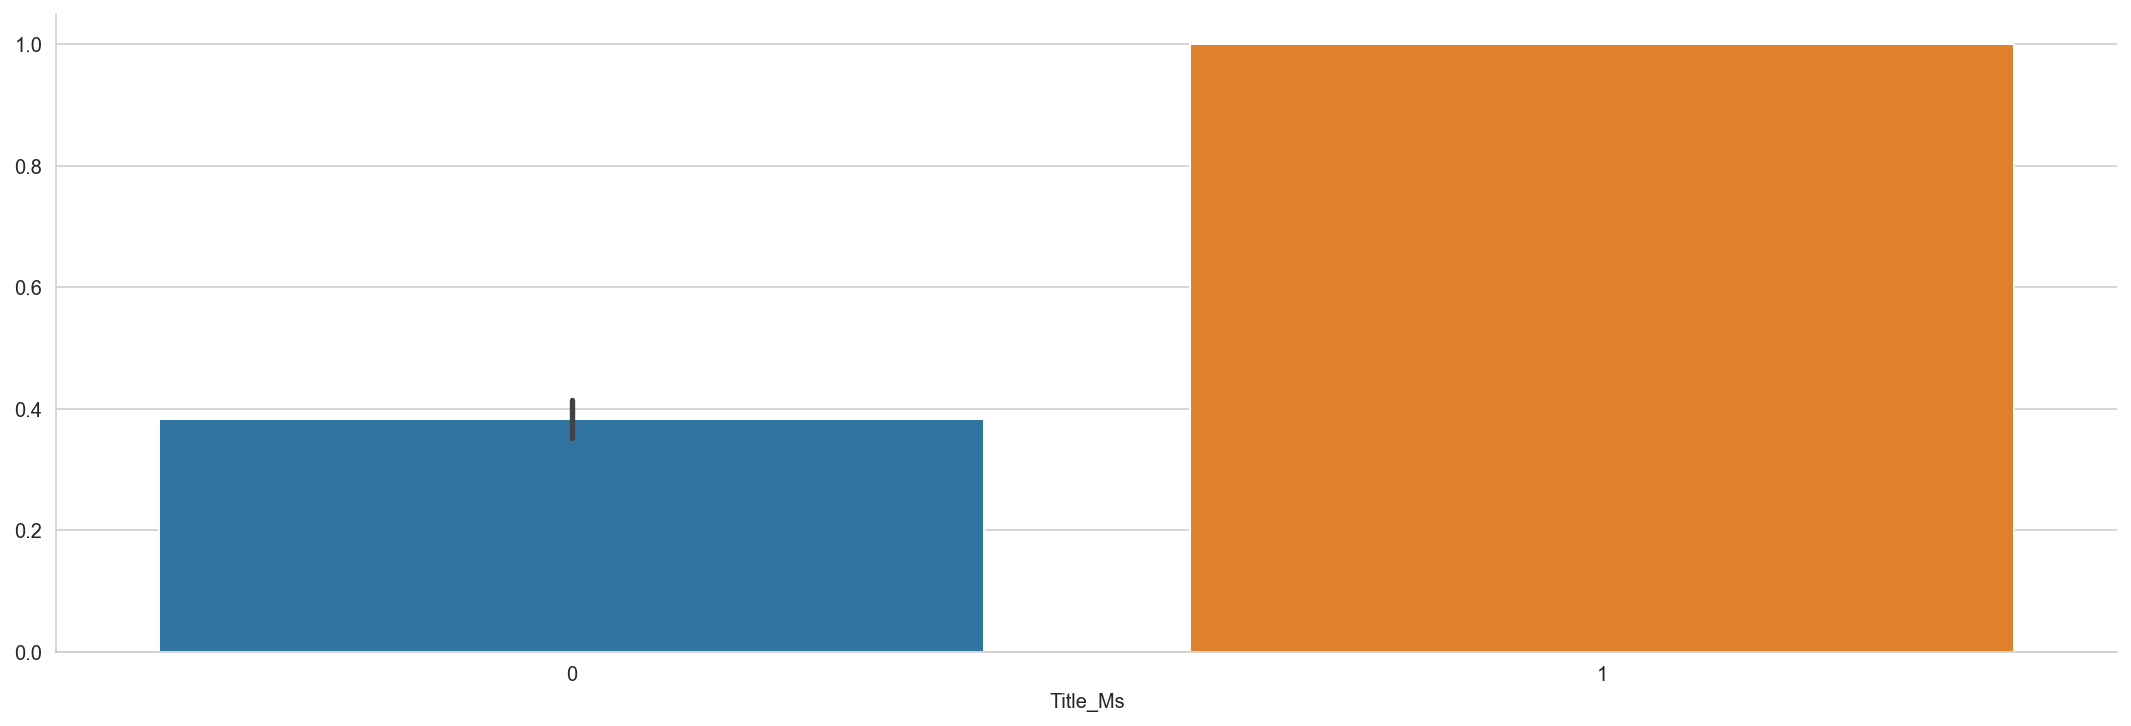

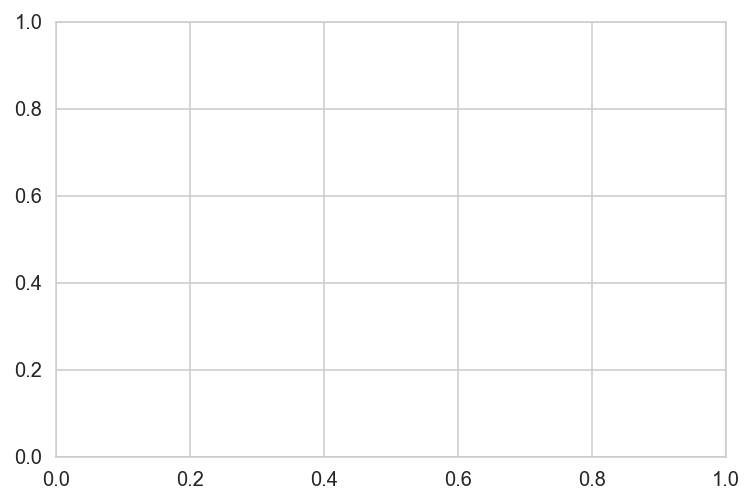

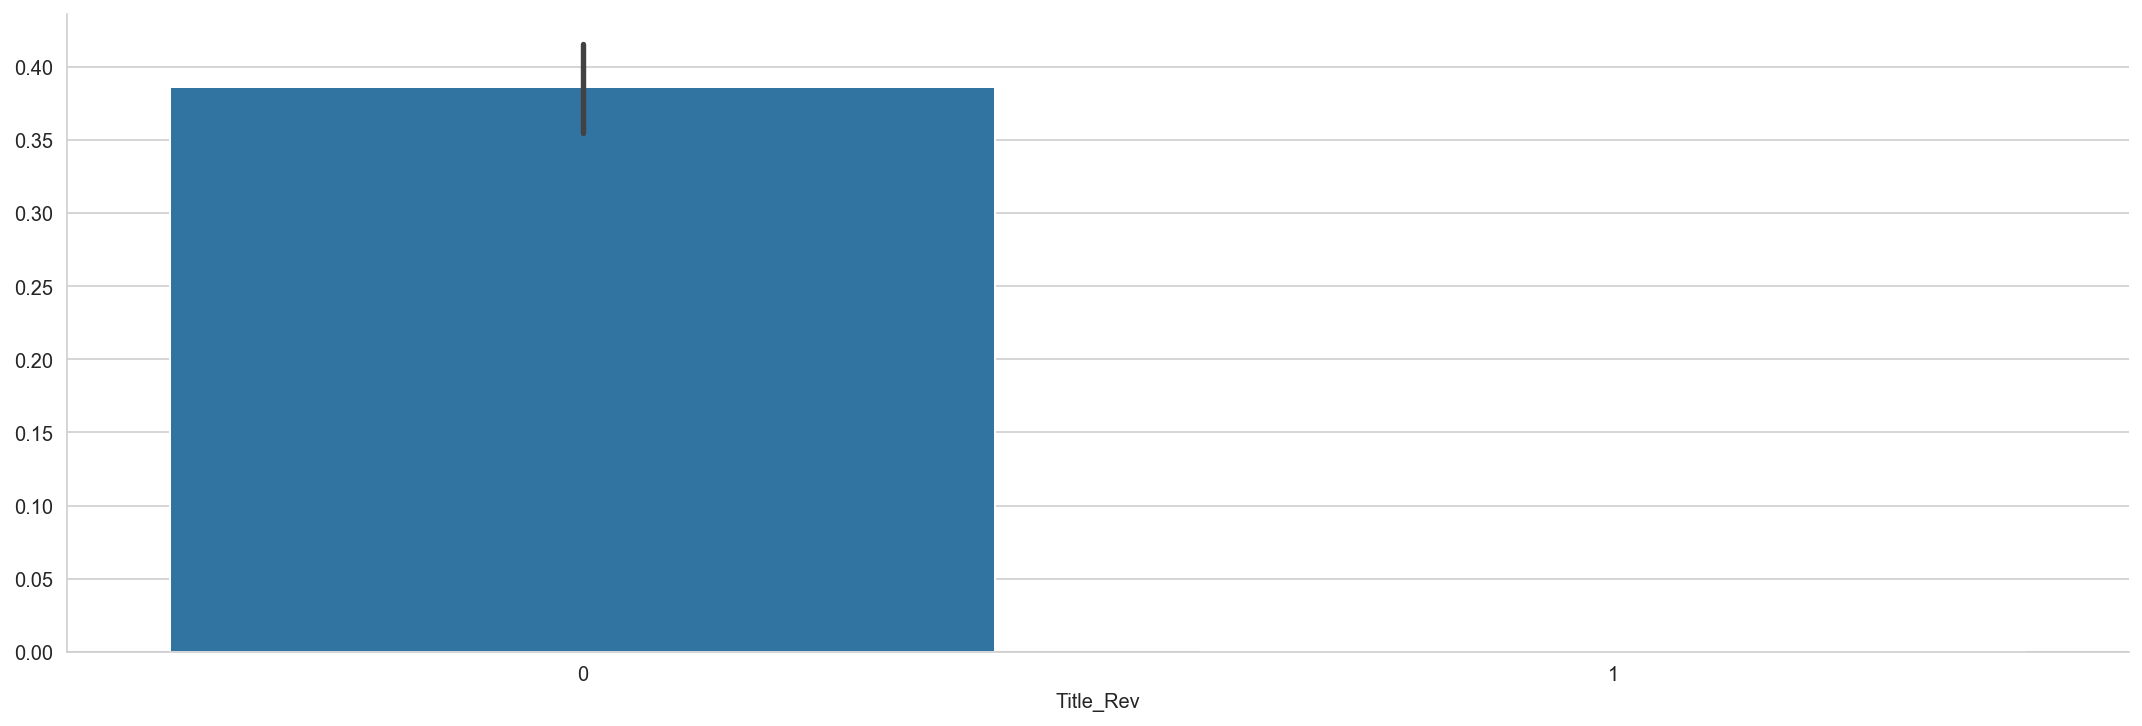

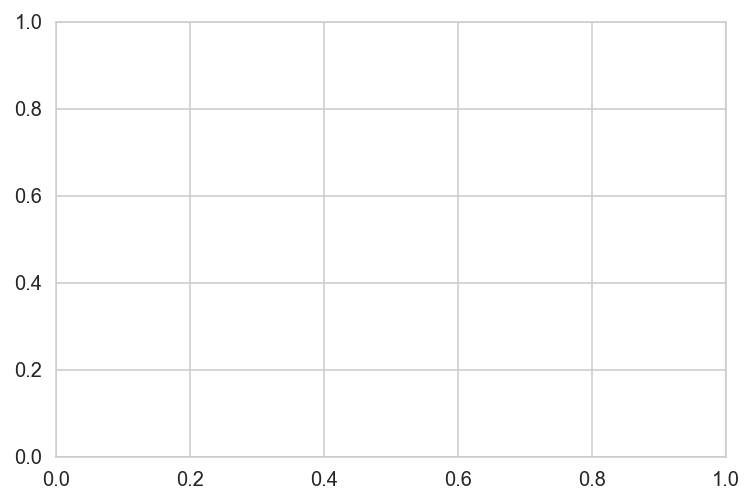

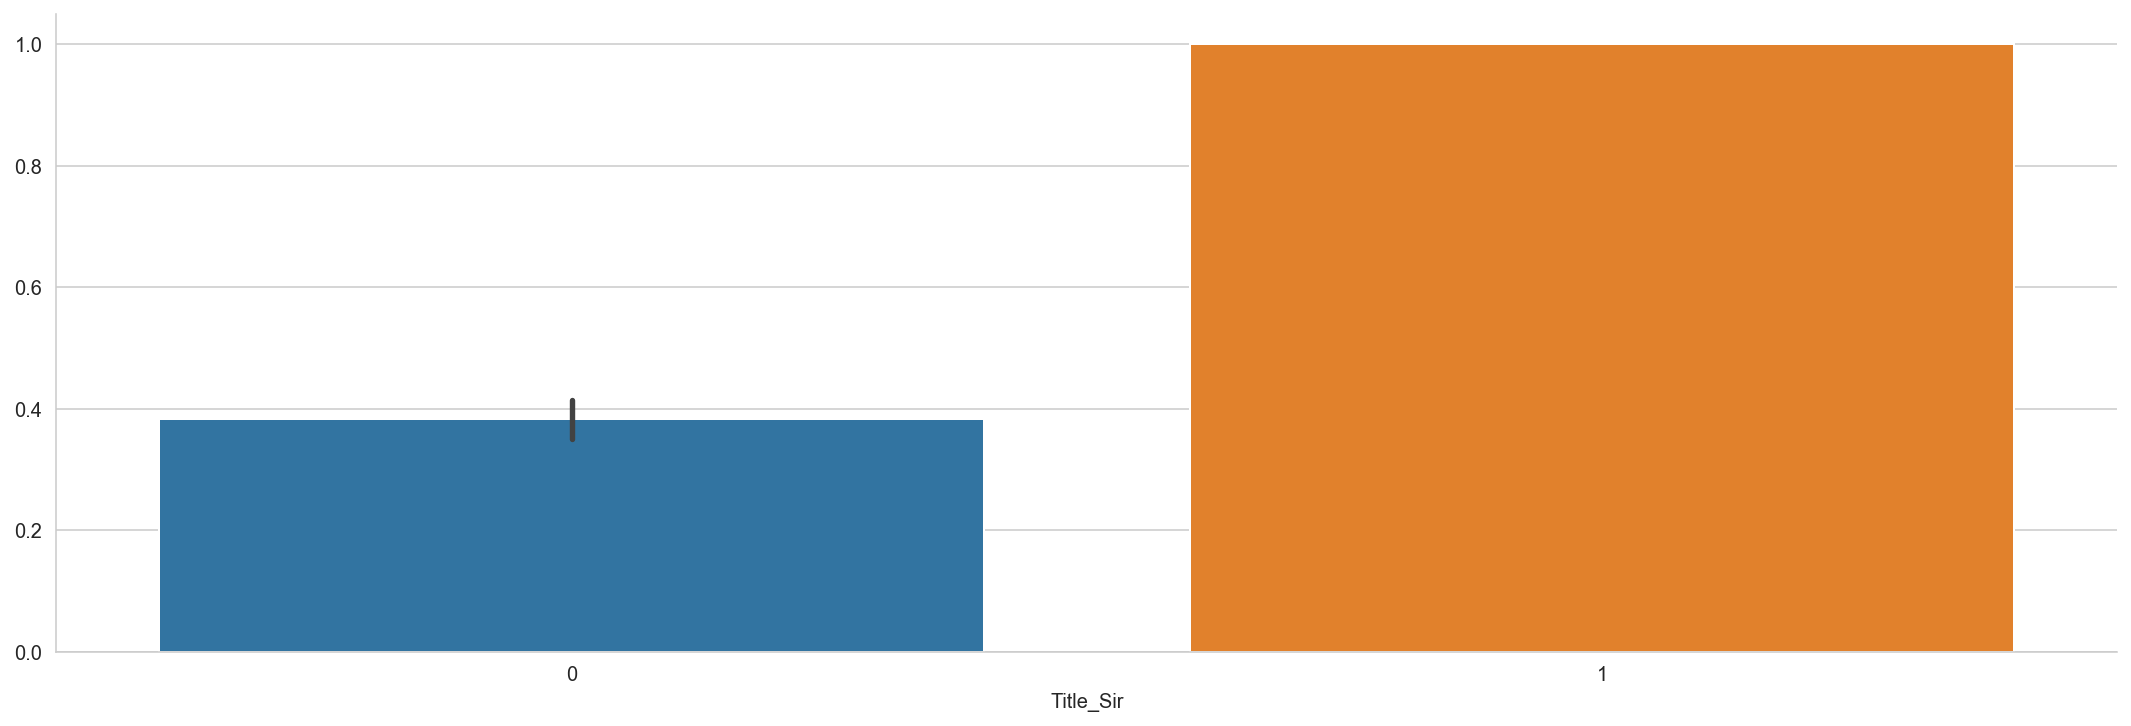

In [30]:
def bar(data , target):
    for i in data.columns:
        try:
            fig = plt.figure(figsize=(6,4))
            ax = fig.gca()
            sns.catplot(x=i,y=target , data=data,kind="bar",aspect=3)
            plt.show()
        except:
            pass
       

bar(xtraing , target)

In [31]:
# from sklearn.neighbors import KNeighborsClassifier 
# knn = KNeighborsClassifier(n_neighbors=2) 
# knn.fit(xtraing, target)


In [32]:
# from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier()

# dtr1 = DecisionTreeClassifier(max_depth=1) # change depth to 5 and see the difference
# dtr2 =DecisionTreeClassifier(max_depth=2) 
# dtr3 = DecisionTreeClassifier(max_depth=3 )
# dtr4 =DecisionTreeClassifier(   max_depth=4  ) 
# dtr1.fit(xtraing, target)
# dtr2.fit(xtraing, target)
# dtr3.fit(xtraing, target)
# dtr4.fit(xtraing, target)




In [33]:
# Result['Survived']=dtr4.predict(xtest)

In [34]:
# Result.to_csv("ResultTita.csv" , index= False)

In [35]:
# from sklearn.model_selection import GridSearchCV
# rf_params = {
#    'n_estimators': [10, 50, 100, 150, 200, 250],
#    'max_features':[1,2, 3,4, 5,6 ,7],
#     'max_depth': [1, 2, 3, 4, 5,6,7, 8],
#    'criterion':['gini', 'entropy'],
# }
# rf_g = RandomForestClassifier() # just a new instance!
# gs = GridSearchCV(rf_g, param_grid=rf_params, cv=5, verbose = 1,n_jobs=-1)#, refit=False) 


In [36]:
# rf_params_knn = {
#    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,14,16,17,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50],
#    'weights':['uniform','distance'],
#    'metric':['euclidean', 'manhattan']}

In [37]:
# gs = GridSearchCV(KNeighborsClassifier() , param_grid=rf_params, cv=5, verbose = 1,n_jobs=-1)#, refit=False) 

In [38]:
# gs.fit(xtraing, target)

In [39]:
# gs.best_estimator_

In [40]:
# gs.best_score_


In [41]:
# Result['Survived']=knn.predict(xtest)


In [42]:
# pd.read_csv("ResultTita.csv")


In [43]:
# """
#   Does the name title matter?
#   Lets see this in graph and decide to drop it or not. - 
#     We can clearly see in graph that the some title's survival is too high.
# """

# title_seperator = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,"Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

# train_dataset['Title'] = train_dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# test_dataset['Title'] = test_dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# survived = train_dataset[train_dataset['Survived']==1]["Title"].value_counts()
# dead = train_dataset[train_dataset['Survived']==0]["Title"].value_counts()
# df = pd.DataFrame([survived,dead])
# df.index = ['Survived','Dead']
# df.plot(kind='bar',stacked=True, figsize=(10,5))

# # Mapping title
# train_dataset['Title'] = train_dataset['Title'].map(title_seperator)
# test_dataset['Title'] = test_dataset['Title'].map(title_seperator)

In [44]:
# """
#   How does sex affect the survival rate?
#   Female survived much more than male.
# """
# survived = train_dataset[train_dataset['Survived']==1]["Sex"].value_counts()
# dead = train_dataset[train_dataset['Survived']==0]["Sex"].value_counts()
# df = pd.DataFrame([survived,dead])
# df.index = ['Survived','Dead']
# df.plot(kind='bar',stacked=True, figsize=(10,5))

In [45]:
# """
#   How does age affect the survival rate?
#   Fill the nan values with median of Age corresponding to title, pclass and sex.
# """

# """
#   Create age class to categorise the age groups
#   0 - Age below 17
#   1 - Age between 17 and 27
#   2 - Age between 27 and 37
#   3 - Age between 37 and 60
#   4 - Age above 60
# """

# def fill_missing_age(train_dataframe,dataframe):
#   group = train_dataframe.iloc[:].groupby(['Sex','Pclass','Title'])
#   group_median = group.median()
#   group_median = group_median.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
#   for index, row in dataframe.iterrows():
#     if np.isnan(row["Age"]):
#       try:
#         dataframe.set_value(index,"Age",group_median.loc[(group_median['Sex'] == row['Sex']) & (group_median['Pclass'] == row['Pclass']) & (group_median['Title'] == row['Title'])]['Age'].values[0])
#       except IndexError:
#         dataframe.set_value(index,"Age",train_dataframe['Age'].median())
#   return dataframe

# def age_group(dataframe):
#   dataframe.loc[ dataframe['Age'] <= 17, 'Age'] = 0,
#   dataframe.loc[ (dataframe['Age'] > 17) & (dataframe['Age'] <= 27), 'Age'] = 1,
#   dataframe.loc[ (dataframe['Age'] > 27) & (dataframe['Age'] <= 37), 'Age'] = 2,
#   dataframe.loc[ (dataframe['Age'] > 37) & (dataframe['Age'] <= 60), 'Age'] = 3,
#   dataframe.loc[ dataframe['Age'] > 60, 'Age'] = 4
#   return dataframe

# train_dataset = fill_missing_age(train_dataset,train_dataset)
# test_dataset = fill_missing_age(train_dataset,test_dataset)

# train_dataset = age_group(train_dataset)
# test_dataset = age_group(test_dataset)

# survived = train_dataset[train_dataset['Survived']==1]["Age"].value_counts()
# dead = train_dataset[train_dataset['Survived']==0]["Age"].value_counts()
# df = pd.DataFrame([survived,dead])
# df.index = ['Survived','Dead']
# df.plot(kind='bar',stacked=True, figsize=(10,5))

In [46]:
# """
#   How does pclass affect the survival rate?
#   Class 3 people died much more than class 2 or 1.
#   1 survived the most.
# """
# survived = train_dataset[train_dataset['Survived']==1]["Pclass"].value_counts()
# dead = train_dataset[train_dataset['Survived']==0]["Pclass"].value_counts()
# df = pd.DataFrame([survived,dead])
# df.index = ['Survived','Dead']
# df.plot(kind='bar',stacked=True, figsize=(10,5))

In [47]:
# """
#   Fixing Cabin missing values.
#   Only keep first letter of cabin.
#   "UK" for unknown nan values.
#   And visualizing survival of cabins.
# """
# def fix_cabin(dataframe):
#   truth = pd.isnull(dataframe['Cabin'])
#   for index, row in dataframe.iterrows():
#     if truth[index]:
#       dataframe.set_value(index,"Cabin","UK")
#     else:
#       dataframe.set_value(index,"Cabin",row['Cabin'][0])
#   return dataframe

# train_dataset = fix_cabin(train_dataset)
# test_dataset = fix_cabin(test_dataset)

# survived = train_dataset[train_dataset['Survived']==1]["Cabin"].value_counts()
# dead = train_dataset[train_dataset['Survived']==0]["Cabin"].value_counts()
# df = pd.DataFrame([survived,dead])
# df.index = ['Survived','Dead']
# df.plot(kind='bar',stacked=True, figsize=(10,5))

In [48]:
# """
#   Fixing Emabarked missing values.
#   filling the nan value with most used embarked value. (mode)
# """
# def fix_embarked(most_used_value,dataframe):
#   truth = pd.isnull(dataframe['Embarked'])
#   for index, row in dataframe.iterrows():
#     if truth[index]:
#       dataframe.set_value(index,"Embarked",most_used_value)
#   return dataframe

# train_dataset = fix_embarked(train_dataset['Embarked'].mode()[0],train_dataset)
# test_dataset = fix_embarked(train_dataset['Embarked'].mode()[0],test_dataset)

# survived = train_dataset[train_dataset['Survived']==1]["Embarked"].value_counts()
# dead = train_dataset[train_dataset['Survived']==0]["Embarked"].value_counts()
# df = pd.DataFrame([survived,dead])
# df.index = ['Survived','Dead']
# df.plot(kind='bar',stacked=True, figsize=(10,5))

In [49]:
# """
#   Fix fare missing values.
#   And see which fare range people died the most.
# """

# def fix_fare(mean,dataframe):
#   truth = pd.isnull(dataframe['Fare'])
#   for index, row in dataframe.iterrows():
#     if truth[index]:
#       dataframe.set_value(index,"Fare",mean)
#   return dataframe

# train_dataset = fix_fare(train_dataset['Fare'].mean(),train_dataset)
# test_dataset = fix_fare(train_dataset['Fare'].mean(),test_dataset)


# plt.hist([train_dataset[train_dataset['Survived'] == 1]['Fare'], train_dataset[train_dataset['Survived'] == 0]['Fare']], stacked=True, color = ['g','y'],bins = 50, label = ['Survived','Dead'])
# plt.xlabel('Fare')
# plt.ylabel('Number of passengers')
# plt.legend()

In [50]:
# """
#   Making a new dataframe train_dataset_Y (target variable).
#   Dropping the columns which have non affecting results.
# """

# train_dataset_X = train_dataset.drop(columns = ["PassengerId", "Name", "Ticket", "Survived"])
# train_dataset_Y = train_dataset["Survived"]

# test_dataset_X = test_dataset.drop(columns = ["PassengerId", "Name", "Ticket"])

In [51]:
# """
#   Check the dtypes of the dataframes.
# """
# train_dataset_X.dtypes

In [52]:
# test_dataset_X.dtypes

In [53]:
"""
  Now the dtypes are perfect. 
  Next step is to encode the string objects.
"""

'\n  Now the dtypes are perfect. \n  Next step is to encode the string objects.\n'

In [54]:
# """
#   Check if there is any nan values
# """

# test_dataset_X.isnull().values.any()

In [55]:
# """
#   We use label encoder the encode the string objects.
# """


# train_dataset_X["Sex"] = LabelEncoder().fit_transform(train_dataset_X["Sex"])
# train_dataset_X["Cabin"] = LabelEncoder().fit_transform(train_dataset_X["Cabin"])
# train_dataset_X["Embarked"] = LabelEncoder().fit_transform(train_dataset_X["Embarked"])

# test_dataset_X["Sex"] = LabelEncoder().fit_transform(test_dataset_X["Sex"])
# test_dataset_X["Cabin"] = LabelEncoder().fit_transform(test_dataset_X["Cabin"])
# test_dataset_X["Embarked"] = LabelEncoder().fit_transform(test_dataset_X["Embarked"])

In [56]:
# """
#   Check our datasets again.
# """
# train_dataset_X.head(5)

In [57]:
# test_dataset_X.head(5)

In [58]:
"""
  Encoding completed perfectly.
  Now one error is there- 
    The columns in train and test are not in same order.
    We need to sort it.
"""

'\n  Encoding completed perfectly.\n  Now one error is there- \n    The columns in train and test are not in same order.\n    We need to sort it.\n'

In [59]:
# """
#   Sorting the columns in both the sets.
# """

# train_dataset_X = train_dataset_X.reindex(sorted(train_dataset_X.columns), axis=1)

# test_dataset_X = test_dataset_X.reindex(sorted(test_dataset_X.columns), axis=1)

In [60]:
# train_dataset_X

In [61]:
# test_dataset_X

In [62]:
# """
#   Now we need to split the datasets.
# """
# X_train, X_test, Y_train, Y_test = train_test_split(train_dataset_X, train_dataset_Y, test_size = 0.1, random_state = 0)

In [63]:
# """
#   Scaling the values so that it is normalized.
# """

# X_train = StandardScaler().fit_transform(X_train)

# X_test = StandardScaler().fit_transform(X_test)

# test_dataset_X = StandardScaler().fit_transform(test_dataset_X)

In [64]:
# """
#   classifier_array to store classifier
#   acuracy_score_array to store accuracy array
# """
# classifier_array = []
# acuracy_score_array = []

In [65]:
# """
#   From here onwards these are classification models.
#   Using grid search to find best hyper parameters.
#   -------------------------
#   SGDClassifier - Kaggle score on submission - 0.7799
#   -------------------------
# """

# def warn(*args, **kwargs): #disable warnings
#     pass
# import warnings
# warnings.warn = warn

# params = {
#     "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
#     "alpha" : [0.0001, 0.001, 0.01, 0.1],
#     "penalty" : ["l2", "l1", "none"],
#     "random_state" : [200], # fixing random state to some seed
#     "n_jobs" : [-1],
#     "max_iter" : [5, 10, 20, 50, 100, 1000]
# }


# classifier_sgdc = SGDClassifier()
# clf = GridSearchCV(classifier_sgdc, param_grid=params)
# clf.fit(xtraing, target)

# classifier_sgdc = clf.best_estimator_
# classifier_sgdc = classifier_sgdc.fit(xtraing,target) 
# predicted = classifier_sgdc.predict(xtest) 
# # print ('Accuracy Score :',accuracy_score(Y_test, predicted))
# Result['Survived']= classifier_sgdc.predict(xtest) 
# # classifier_array.append("SGDClassifier")
# # acuracy_score_array.append(accuracy_score(Y_test, predicted))

In [66]:
# Result.to_csv("ResultTita.csv" , index= False)

In [67]:
"""
  From here onwards these are classification models.
  Using grid search to find best hyper parameters.
  -------------------------
  Random Forest   - Kaggle score on submission - 0.799
  -------------------------
"""

def warn(*args, **kwargs): #disable warnings
    pass
import warnings
warnings.warn = warn

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 1000],
    
}


classifier_rf = RandomForestClassifier()
clf = GridSearchCV(estimator = classifier_rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
clf.fit(xtraing, target)

classifier_rf = clf.best_estimator_
classifier_rf = classifier_rf.fit(xtraing, target) 
Result['Survived']= classifier_rf.predict(xtest) 
Result.to_csv("ResultTita.csv" , index= False)

# classifier_array.append("Random Forest")
# acuracy_score_array.append(accuracy_score(Y_test, predicted))

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   25.8s finished


In [68]:
Result.to_csv("ResultTita.csv" , index= False)

In [69]:
# """
#   From here onwards these are classification models.
#   Using grid search to find best hyper parameters.
#   -------------------------
#   Decision Tree   - Kaggle score on submission - 0.75598
#   -------------------------
# """

# def warn(*args, **kwargs): #disable warnings
#     pass
# import warnings
# warnings.warn = warn

# param_grid = {
#     'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20, None],
#     'min_samples_leaf': [4, 5,6],
#     'criterion': ['gini', 'entropy'],
#     "random_state" : [101] # fixing random state to some seed
# }


# classifier_dt = DecisionTreeClassifier()
# clf = GridSearchCV(estimator = classifier_dt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# clf.fit(xtraing, target)

# classifier_dt = clf.best_estimator_
# classifier_dt = classifier_dt.fit(xtraing,target) 
# Result['Survived'] = classifier_dt.predict(xtest) 
# # print ('Accuracy Score :',accuracy_score(Y_test, predicted))

# # classifier_array.append("Decision Tree")
# # acuracy_score_array.append(accuracy_score(Y_test, predicted))

In [70]:
# Result.to_csv("ResultTita.csv" , index= False)

In [71]:
# """
#   From here onwards these are classification models.
#   Using grid search to find best hyper parameters.
#   -------------------------
#   KNN   - Kaggle score on submission - 0.75598
#   -------------------------
# """

# def warn(*args, **kwargs): #disable warnings
#     pass
# import warnings
# warnings.warn = warn
# classifier_knn = KNeighborsClassifier()
# param_grid = {
#     'n_neighbors': [18,20,17,1,2,3,4, 5,6,7,8,9,10,12,13,14,15,16, 11, 19],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan'],
# }


# # classifier_knn = KNeighborsClassifier()
# clf = GridSearchCV(estimator = classifier_knn, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# clf.fit(xtraing, target)

# classifier_knn = clf.best_estimator_
# classifier_knn = classifier_knn.fit(xtraing, target) 
# Result['Survived']= classifier_knn.predict(xtest) 
# # print ('Accuracy Score :',accuracy_score(Y_test, predicted))

# # classifier_array.append("KNN")
# # acuracy_score_array.append(accuracy_score(Y_test, predicted))

In [72]:
# Result.to_csv("ResultTita.csv" , index= False)

In [73]:
# kaggle_score = [0.7799,0.78468,0.75598,0.75598]

In [74]:
# """
#   Visualizing the model accuracies and their kaggle score.
# """
# plt.plot( classifier_array, acuracy_score_array, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( classifier_array, kaggle_score, marker='x', color='olive', linewidth=2)
# plt.legend()

In [75]:
# """
#   Saving the predicted to csv file to submit to kaggle.
#   We use our best model of Random Forest
# """
# answers = classifier_rf.predict(test_dataset_X)
# example_df = pd.read_csv("gender_submission.csv")
# example_df["Survived"] = answers
# example_df.to_csv("answers.csv",index=False)

In [80]:

from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(target, classifier_rf.predict(xtest) , labels = [0,1]))
print(target, classifier_rf.predict(xtest))

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64 [0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1

In [ ]:
"""
  Conclusion - 
    Sex - 
      Females suvived more than males.
    Age -
      Young Children group survived more than old aged groups.
    Fare - 
      Less the fare paid, more was the probablity of dying :(
    Title - 
      Some important title people survived more than others.
    Pclass - 
      Survival was class 1 > class 2 > class 3
"""